In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

def calculate_metrics(true_values, pred_values):
    mse = round(mean_squared_error(true_values, pred_values),3)
    mae = round(mean_absolute_error(true_values, pred_values),3)
    r_score = round(r2_score(true_values, pred_values),3)

    return {"mse": mse,
            "mae": mae,
            "r_score": r_score,}

In [2]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321...

KeyboardInterrupt: 

In [3]:
train = h2o.import_file(r"C:\work\DrugDiscovery\main_git\XAI_Chem\data\H2O_AutoML_cv2\Only_mol_with_angles_without_outliers(except_dipole)\train_logP_data.csv")
test = h2o.import_file(r"C:\work\DrugDiscovery\main_git\XAI_Chem\data\H2O_AutoML_cv2\Only_mol_with_angles_without_outliers(except_dipole)\test_logP_data.csv")

x = train.columns
x.remove('C1')
y = "logP"
x.remove(y)

# train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

aml = H2OAutoML(seed=1, max_runtime_secs_per_model=300)
aml.train(x=x, y=y, training_frame=train, leaderboard_frame=test, fold_column="fold_id")

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
15:56:14.49: Fold column fold_id will be used for cross-validation. nfolds parameter will be ignored.
15:56:14.62: AutoML: XGBoost is not available; skipping it.
15:56:14.116: _train param, Dropping bad and constant columns: [naRing, naHRing, nFaHRing, nFaRing]


15:56:14.546: _train param, Dropping bad and constant columns: [naRing, naHRing, nFaHRing, nFaRing]
15:56:14.546: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 89.0.
15:56:14.550: _train param, Dropping bad and constant columns: [naRing, naHRing, nFaHRing, nFaRing]

█
15:56:15.313: _train param, Dropping bad and constant columns: [naRing, naHRing, nFaHRing, nFaRing]


15:56:15.707: _train param, Dropping bad and constant columns: [naRing

In [4]:
best_dnn_model = aml.get_best_model()
preds = best_dnn_model.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.015, 'mae': 0.097, 'r_score': 0.934}

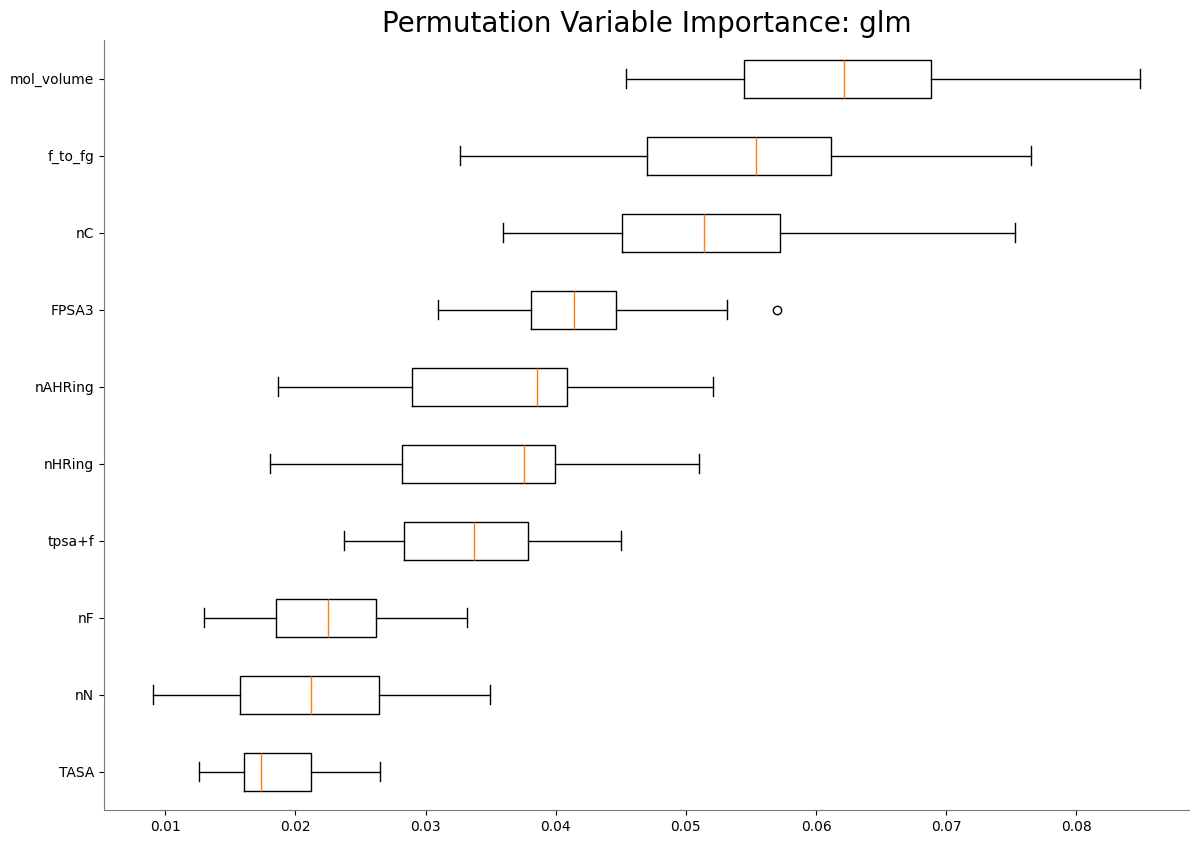

Variable Importances
Variable                                   Run 1                   Run 2                   Run 3                   Run 4                   Run 5                   Run 6                   Run 7                   Run 8                   Run 9                   Run 10                  Run 11                  Run 12                  Run 13                  Run 14                  Run 15                  Run 16                  Run 17                  Run 18                  Run 19                  Run 20
-----------------------------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------  ----------------------
mol_volume                                 0.08486964498771818     0.06704639700269502     0.0609008942548159      0.07664513433118794     0.06338794307319925     0.0765336714241531      0.064217216877366       0.054570175211370336    0.06953994026867691     0.06002836049762425     0.04541779372002255     0.05651026918757032     0.06765844190980888     0.05174986201324752     0.08131073059678098     0.054197448238700124    0.05033163466922361     0.05828541197695483     0.053123179623718014    0.06861321039332494
nC                                         0.07525399096734228     0.05716115356270071     0.05150289401163691     0.06207407085502645     0.05122046040639874     0.06566695200454084     0.054782679314188926    0.045847027339149526    0.05612244863356361     0.048941614163606734    0.035920511386484       0.045173322816290246    0.05751466743461239     0.04156984206729475     0.07185145680527441     0.044726868576303924    0.038035931472189005    0.049296414301274155    0.042534467854502295    0.05390163335009032
f_to_fg                                    0.0615054104952962      0.05910701437582469     0.06298272048200196     0.047046103667969796    0.05512803937362634     0.043710866597298614    0.04691508260248692     0.047291999312272015    0.05624299742836705     0.07648643175135064     0.06106080499057029     0.05433175684370781     0.032642433883490946    0.05753275370112551     0.06753285741096407     0.06901966504656623     0.04175140238449515     0.0489934441521345      0.05566766577903606     0.041706588619243395
nAHRing                                    0.040494241491648764    0.04253071375014694     0.026322750813072532    0.04202438057303726     0.029949605813198665    0.033662774223752606    0.01927255959469562     0.029791119423513257    0.0399514358021012      0.05209613008608607     0.037749256465409636    0.04038620071139859     0.024186681826538686    0.04040208314366117     0.021730941114472824    0.04210549477416592     0.03146396632581555     0.01864608626033426     0.0430504037102076      0.03935219727189421
FPSA3                                      0.04026753821320675     0.037197283299510525    0.048093019509343554    0.04104249320492104     0.031211648924707625    0.057031902427540165    0.038351235476188156    0.04204064272388999     0.039865861497500876    0.03462401145697369     0.05108665246053165     0.044270451012107165    0.03094633670364616     0.03403304798916651     0.042359362132272704    0.04013340578335073     0.044104350923729135    0.05317390591412405     0.04558645780045581     0.041830213799004506
nHRing                                     0.03960084013375878     0.041496296947683725    0.025604231412130585    0.041074449251526035    0.029147466117377147    0.032832401144769846    0.018680724133577242    0.029018532300010308    0.0390241812530141      0.051037713932909096    0.03680596669585298     0.039467454115917344    0.02356421308289977    

In [21]:
best_dnn_model.permutation_importance_plot(train, n_repeats=20)

PERMUTATION IMPORTANCE

c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\38066\AppData\Local\Temp\ipykernel_20596\2730467362.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(sum_rows.keys()[sorted_idx][::-1][:30][::-1], sum_rows[sorted_idx][::-1][:30][::-1])


Text(0.5, 0, 'Random Forest Feature Importance')

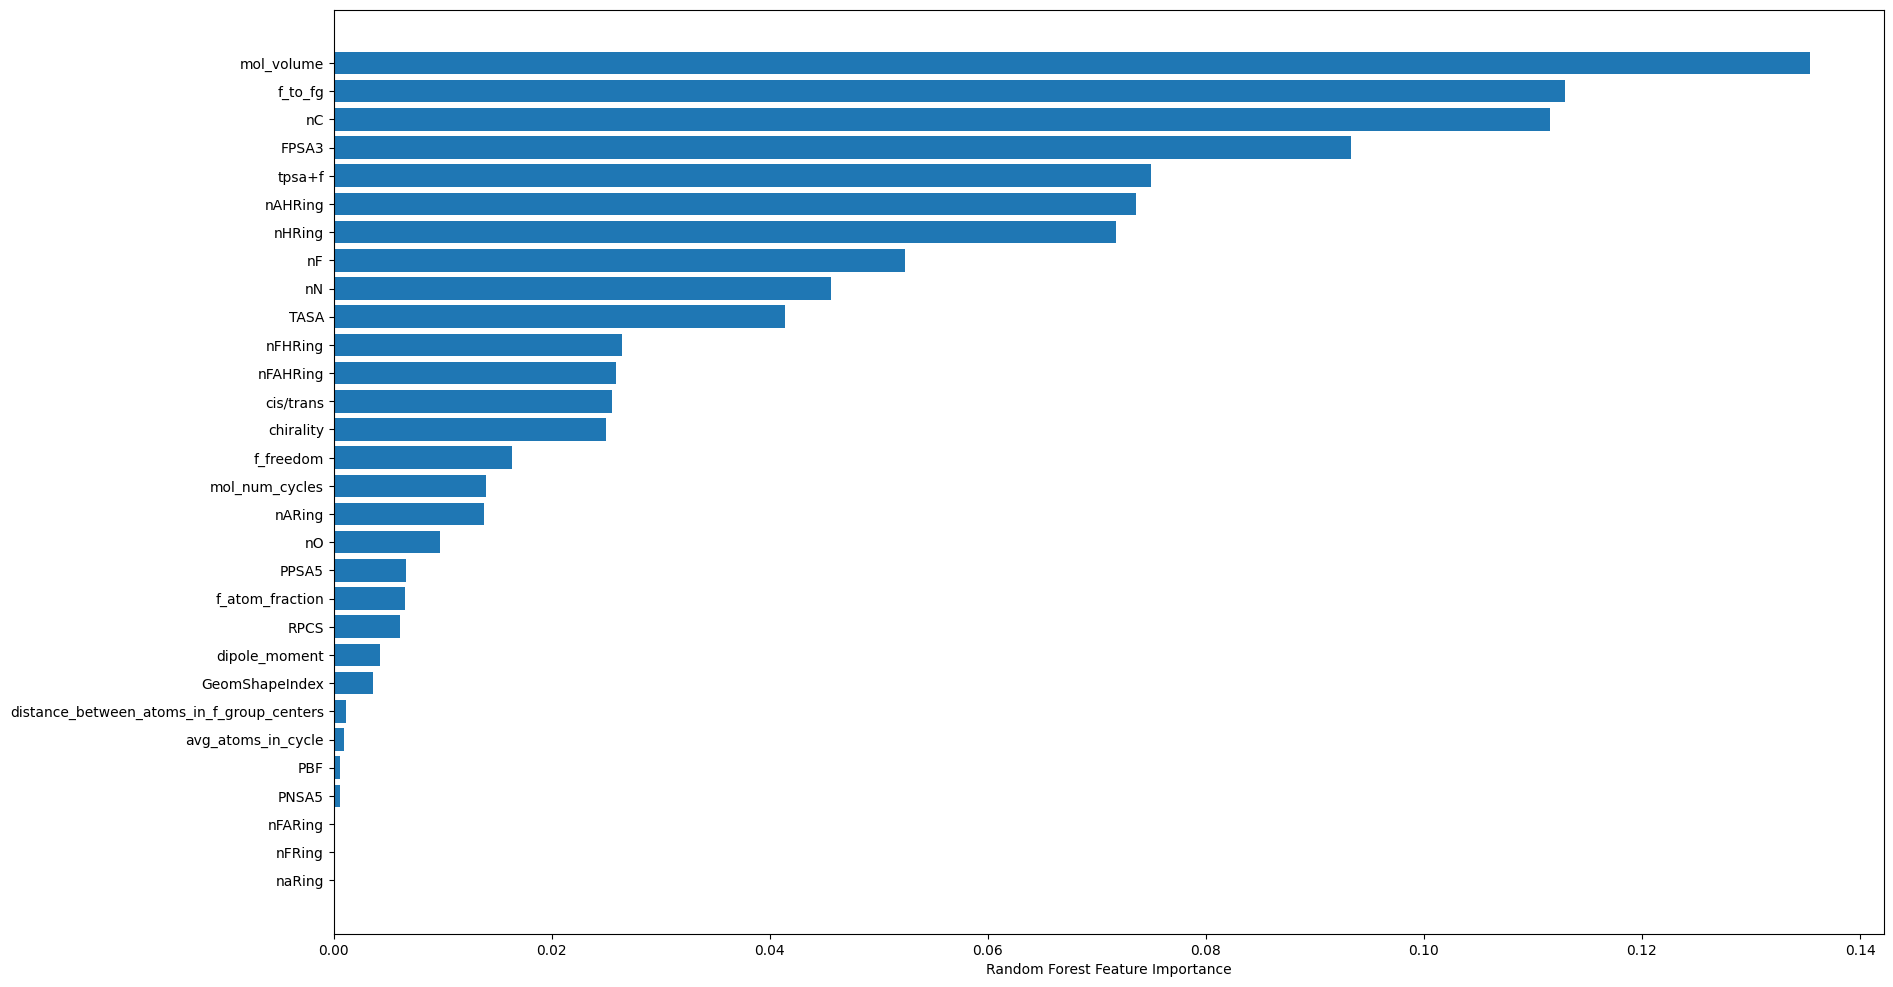

In [53]:
import matplotlib.pyplot as plt

best_model = aml.get_best_model()
permutation_varimp = best_model.permutation_importance(train, use_pandas=True, n_repeats=500)

sum_rows = permutation_varimp.sum(axis=1)
sum_rows = sum_rows / sum(sum_rows)

sorted_idx = sum_rows.argsort()
plt.figure(figsize=(20,12))
plt.barh(sum_rows.keys()[sorted_idx][::-1][:30][::-1], sum_rows[sorted_idx][::-1][:30][::-1])
plt.xlabel("Random Forest Feature Importance")

SHAP

invalid value encountered in divide


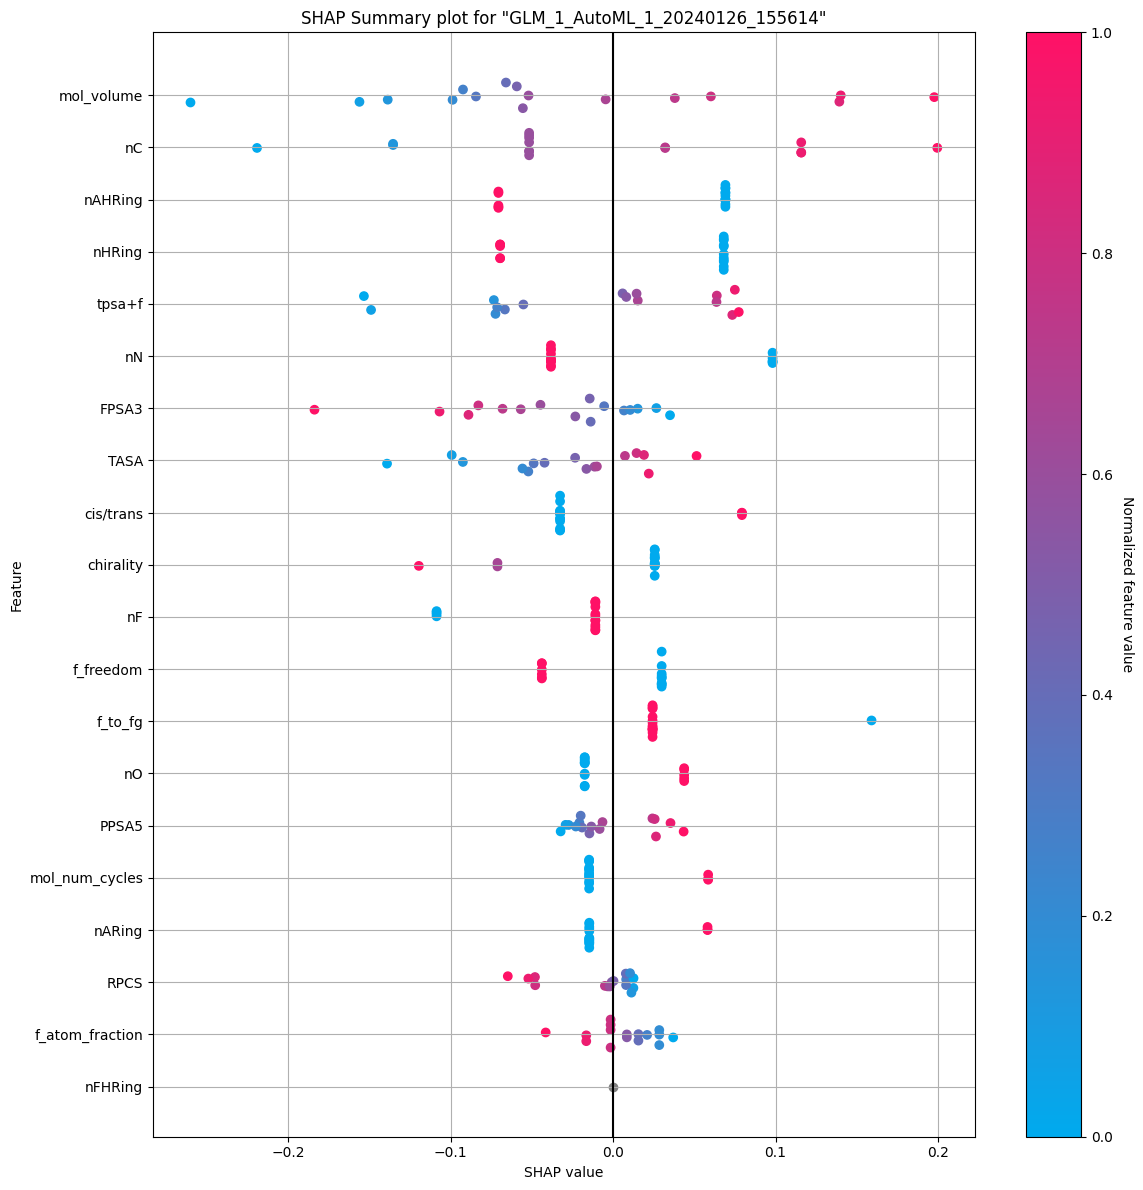

In [97]:
shap_plot = best_model.shap_summary_plot(test, background_frame=train, samples=2000)


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Text(0.5, 0, 'Percent')

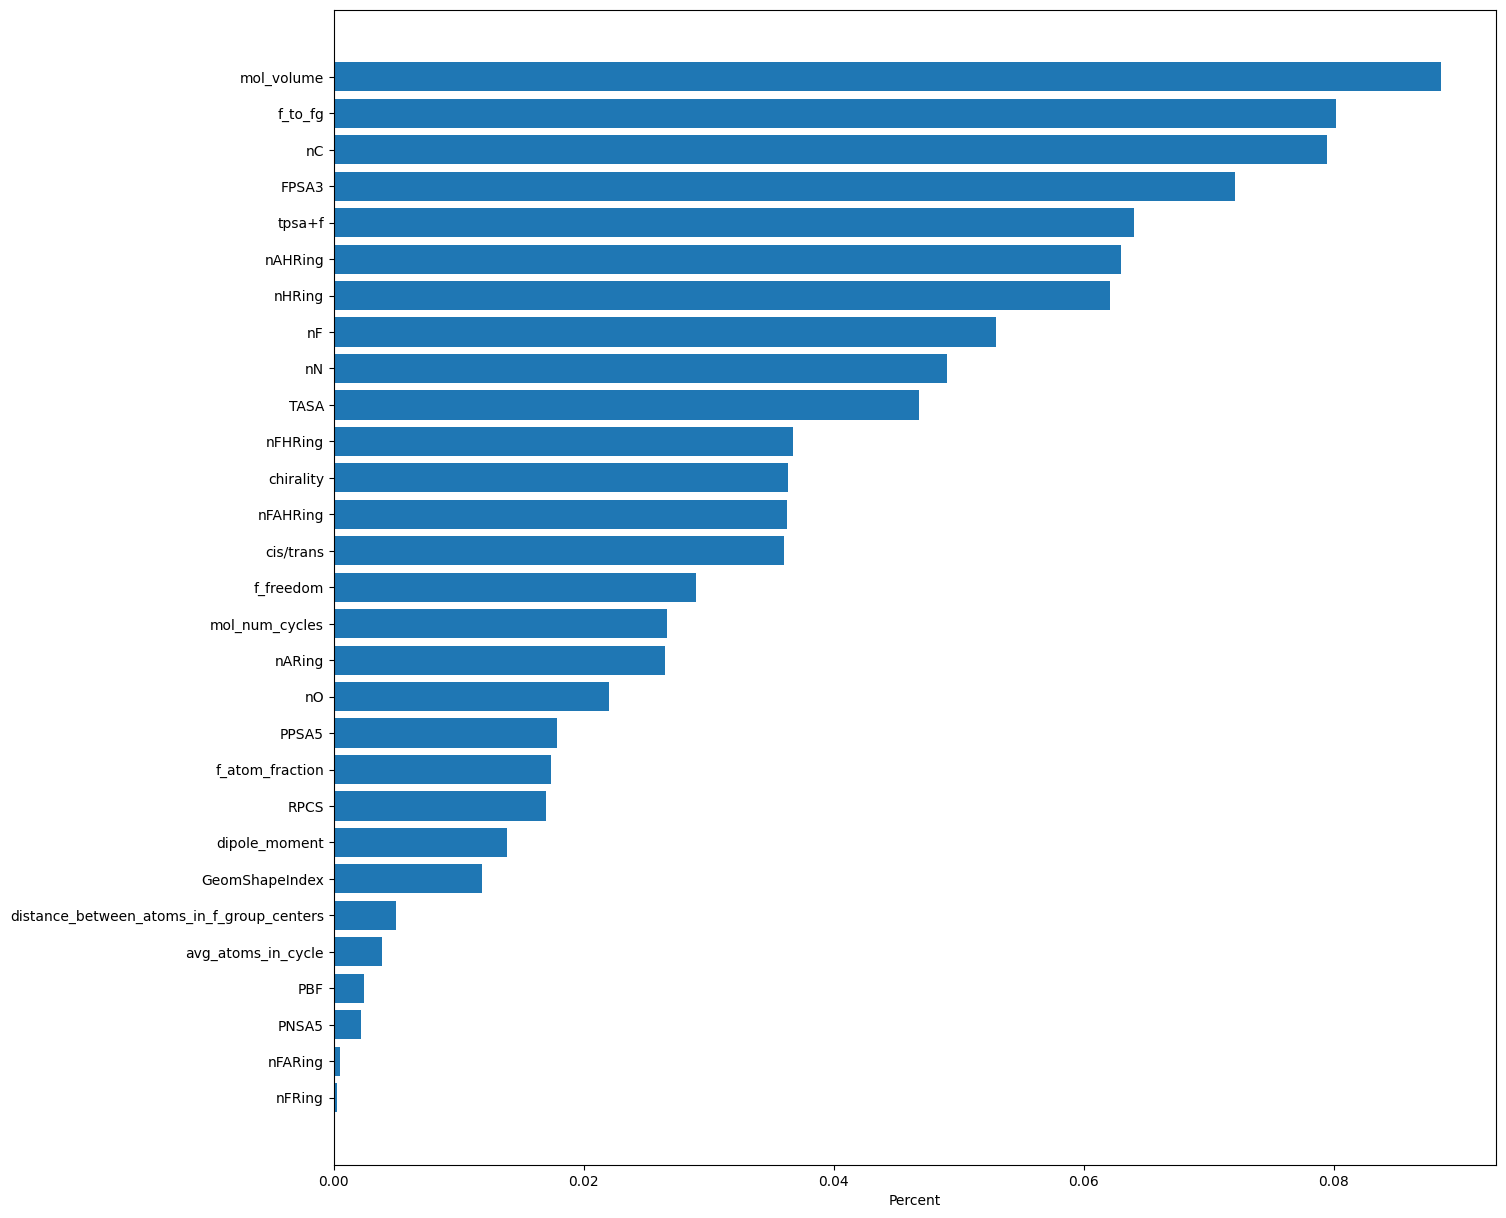

In [63]:
import matplotlib.pyplot as plt

best_model = aml.get_best_model()

preds = best_model.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

importance = best_model.varimp(test)

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(importance['variable'][:][::-1], importance['percentage'][:][::-1])
ax.set_xlabel('Percent')


In [16]:
best_dnn_model.varimp(use_pandas=True)

variable  relative_importance  scaled_importance  percentage
0                       nC             0.102337           1.000000    0.067397
1          linear_distance             0.092455           0.903436    0.060889
2                   nHRing             0.089266           0.872270    0.058788
3               mol_volume             0.089069           0.870346    0.058658
4                  nAHRing             0.088634           0.866092    0.058372
5                     TASA             0.079073           0.772666    0.052075
6                  f_to_fg             0.073075           0.714058    0.048125
7                    FPSA3             0.069098           0.675195    0.045506
8           amount_of_CH2F             0.062648           0.612169    0.041258
9             amount_of_-N             0.044373           0.433597    0.029223
10                nFAHRing             0.039468           0.385665    0.025993
11                 nFHRing             0.039426           0.385257    0.025965
12       amount_of_-C(=O)O             0.037053           0.362067    0.024402
13            amount_of_=O             0.036710           0.358712    0.024176
14            amount_of_-O             0.036494           0.356600    0.024034
15                      nN             0.035693           0.348775    0.023506
16           dipole_moment             0.034862           0.340654    0.022959
17           amount_of_CF3             0.034673           0.338814    0.022835
18                    RPCS             0.033334           0.325722    0.021953
19           amount_of_CHF             0.032554           0.318104    0.021439
20               chirality             0.031513           0.307929    0.020753
21                  nARing             0.030972           0.302647    0.020397
22          mol_num_cycles             0.030954           0.302474    0.020386
23     dihedral_angle_CHF2             0.021581           0.210882    0.014213
24  dihedral_angle_-C(=O)O             0.021081           0.205998    0.013884
25                      nO             0.020992           0.205129    0.013825
26       amount_of_gem-CF2             0.020933           0.204548    0.013786
27                  tpsa+f             0.019795           0.193424    0.013036
28               cis/trans             0.017090           0.166992    0.011255
29       dihedral_angle_-N             0.016915           0.165287    0.011140
30          GeomShapeIndex             0.016573           0.161945    0.010915
31      dihedral_angle_CF3             0.015256           0.149076    0.010047
32      dihedral_angle_CHF             0.014833           0.144945    0.009769
33                   PNSA5             0.013278           0.129749    0.008745
34     dihedral_angle_CH2F             0.012463           0.121786    0.008208
35       dihedral_angle_-O             0.012370           0.120878    0.008147
36          amount_of_CHF2             0.010980           0.107294    0.007231
37               f_freedom             0.010280           0.100456    0.006770
38                 nFARing             0.007778           0.076002    0.005122
39                  nFRing             0.007769           0.075918    0.005117
40      avg_atoms_in_cycle             0.006543           0.063936    0.004309
41                     PBF             0.003553           0.034721    0.002340
42         f_atom_fraction             0.002941           0.028734    0.001937
43                   PPSA5             0.001643           0.016052    0.001082
44  dihedral_angle_gem-CF2             0.000056           0.000546    0.000037

In [18]:
best_dnn_model = aml.get_best_model()
preds = best_dnn_model.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.021, 'mae': 0.112, 'r_score': 0.907}

In [62]:
preds = aml.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.02, 'mae': 0.114, 'r_score': 0.911}

In [4]:
preds = aml.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.017, 'mae': 0.097, 'r_score': 0.924}

In [12]:
best_model = h2o.get_model('GLM_1_AutoML_3_20240116_165713')
preds = best_model.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.025, 'mae': 0.124, 'r_score': 0.888}

In [8]:
best_model = h2o.get_model('StackedEnsemble_BestOfFamily_3_AutoML_1_20240117_133150')
preds = best_model.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.018, 'mae': 0.107, 'r_score': 0.92}

In [70]:
import os

MODEL_SAVE_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\25.01.24_features\logP'

best_model = aml.get_best_model()

model_path = h2o.save_model(model=best_model, path=os.path.join(MODEL_SAVE_PATH, 'Only_mol_with_angles_without_outliers(except_dipole)_without_angles(as features)'), force=True)
model_path

'C:\\work\\DrugDiscovery\\main_git\\XAI_Chem\\ml_part\\h2o_model\\models\\25.01.24_features\\logP\\Only_mol_with_angles_without_outliers(except_dipole)_without_angles(as features)\\GLM_1_AutoML_1_20240126_155614'

In [15]:
import os

MODEL_SAVE_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\logP'

best_model = h2o.get_model('GLM_1_AutoML_3_20240116_165713')

model_path = h2o.save_model(model=best_model, path=os.path.join(MODEL_SAVE_PATH, 'GLM_model'), force=True)
model_path

'C:\\work\\DrugDiscovery\\main_git\\XAI_Chem\\ml_part\\h2o_model\\models\\logP\\GLM_model\\GLM_1_AutoML_3_20240116_165713'

In [9]:
import os

MODEL_SAVE_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\logP'

best_model = h2o.get_model('StackedEnsemble_BestOfFamily_3_AutoML_1_20240117_133150')

model_path = h2o.save_model(model=best_model, path=os.path.join(MODEL_SAVE_PATH, 'Enseble_model'), force=True)
model_path

'C:\\work\\DrugDiscovery\\main_git\\XAI_Chem\\ml_part\\h2o_model\\models\\logP\\Enseble_model\\StackedEnsemble_BestOfFamily_3_AutoML_1_20240117_133150'

In [12]:
best_model = h2o.get_model('GLM_1_AutoML_2_20240115_214041')

preds = best_model.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'mse': 0.057, 'mae': 0.207, 'r_score': 0.787}

EXPLAINABILITY

In [19]:
df_test = test.as_data_frame()[:1]
test_brief = h2o.H2OFrame(df_test)

model_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\logP\best_model\DeepLearning_grid_1_AutoML_3_20240116_165713_model_27'
model = h2o.load_model(model_path)

model.varimp(test_brief)

c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


variable  relative_importance  scaled_importance  percentage
0      dihedral_angle_CHF2             1.000000           1.000000    0.045080
1                    PPSA5             0.866671           0.866671    0.039070
2                       nO             0.768971           0.768971    0.034665
3                    FPSA3             0.726833           0.726833    0.032766
4       dihedral_angle_CHF             0.723558           0.723558    0.032618
5                     TASA             0.685913           0.685913    0.030921
6               mol_volume             0.674166           0.674166    0.030391
7                    PNSA5             0.662084           0.662084    0.029847
8                       nC             0.644803           0.644803    0.029068
9           amount_of_CH2F             0.617781           0.617781    0.027850
10     dihedral_angle_CH2F             0.571457           0.571457    0.025761
11           dipole_moment             0.555863           0.555863    0.025058
12  dihedral_angle_-C(=O)O             0.548167           0.548167    0.024711
13      avg_atoms_in_cycle             0.546845           0.546845    0.024652
14               cis/trans             0.541345           0.541345    0.024404
15               chirality             0.539646           0.539646    0.024327
16          GeomShapeIndex             0.532797           0.532797    0.024018
17                 f_to_fg             0.520750           0.520750    0.023475
18       amount_of_gem-CF2             0.518607           0.518607    0.023379
19          amount_of_CHF2             0.510691           0.510691    0.023022
20         f_atom_fraction             0.507712           0.507712    0.022888
21           amount_of_CHF             0.499779           0.499779    0.022530
22         linear_distance             0.491450           0.491450    0.022155
23                     PBF             0.487400           0.487400    0.021972
24           amount_of_CF3             0.486494           0.486494    0.021931
25            amount_of_=O             0.472543           0.472543    0.021302
26            amount_of_-O             0.459601           0.459601    0.020719
27                      nN             0.459307           0.459307    0.020706
28                  nHRing             0.457896           0.457896    0.020642
29                 nAHRing             0.431356           0.431356    0.019446
30                  tpsa+f             0.414316           0.414316    0.018677
31                    RPCS             0.413773           0.413773    0.018653
32       amount_of_-C(=O)O             0.410286           0.410286    0.018496
33       dihedral_angle_-O             0.377179           0.377179    0.017003
34       dihedral_angle_-N             0.341957           0.341957    0.015415
35  dihedral_angle_gem-CF2             0.340207           0.340207    0.015337
36               f_freedom             0.298811           0.298811    0.013470
37                nFAHRing             0.288548           0.288548    0.013008
38                 nFARing             0.286382           0.286382    0.012910
39                 nFHRing             0.284604           0.284604    0.012830
40            amount_of_-N             0.280369           0.280369    0.012639
41                  nFRing             0.250013           0.250013    0.011271
42          mol_num_cycles             0.243064           0.243064    0.010957
43                  nARing             0.234413           0.234413    0.010567
44      dihedral_angle_CF3             0.208387           0.208387    0.009394

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

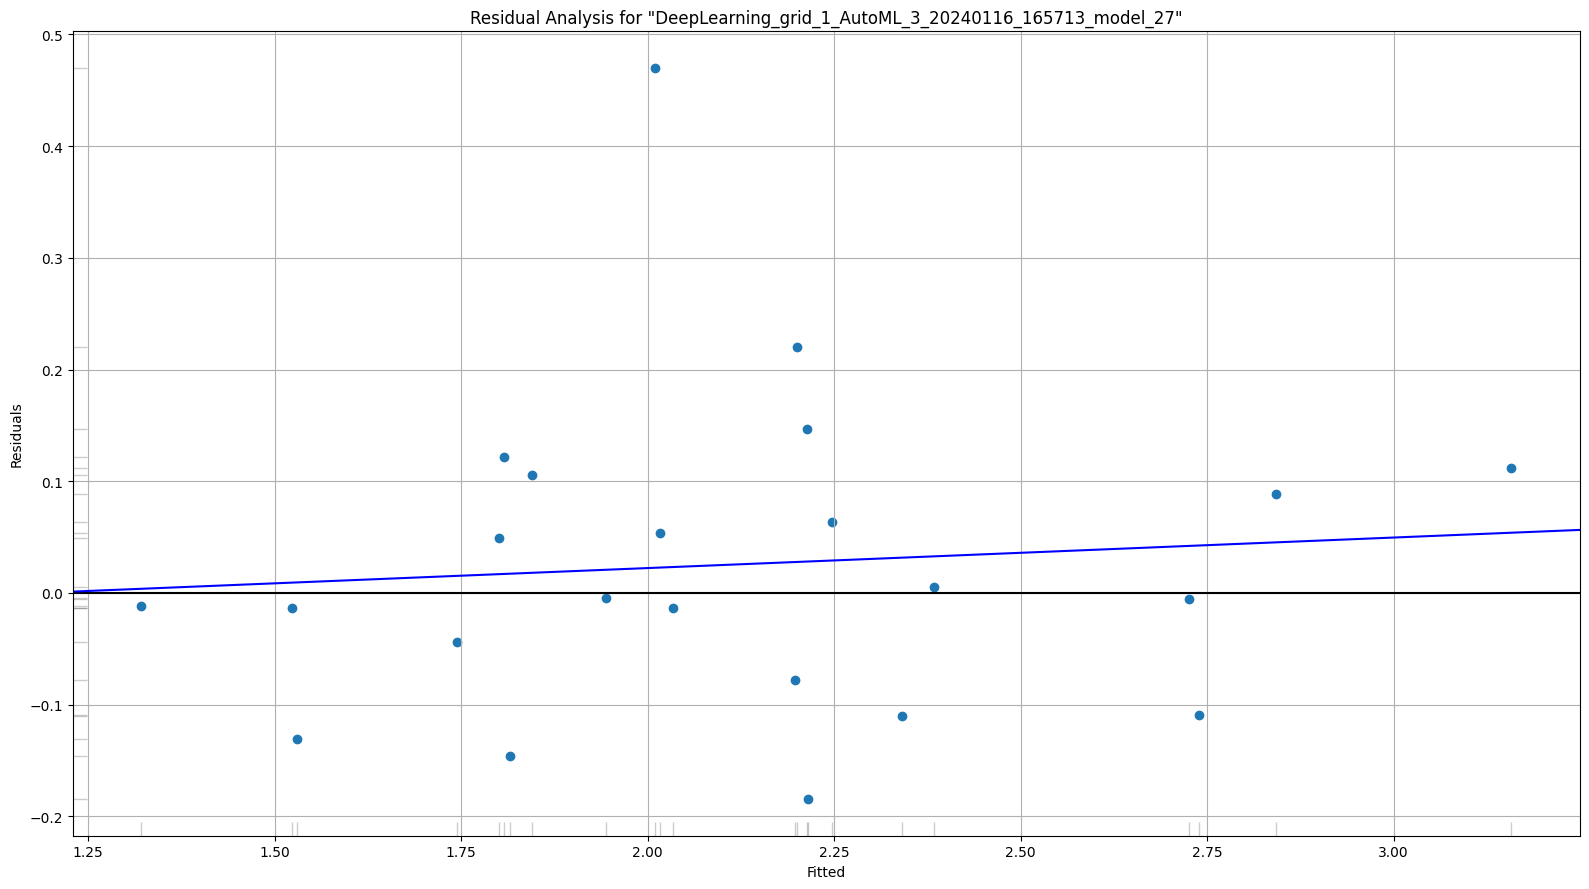

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

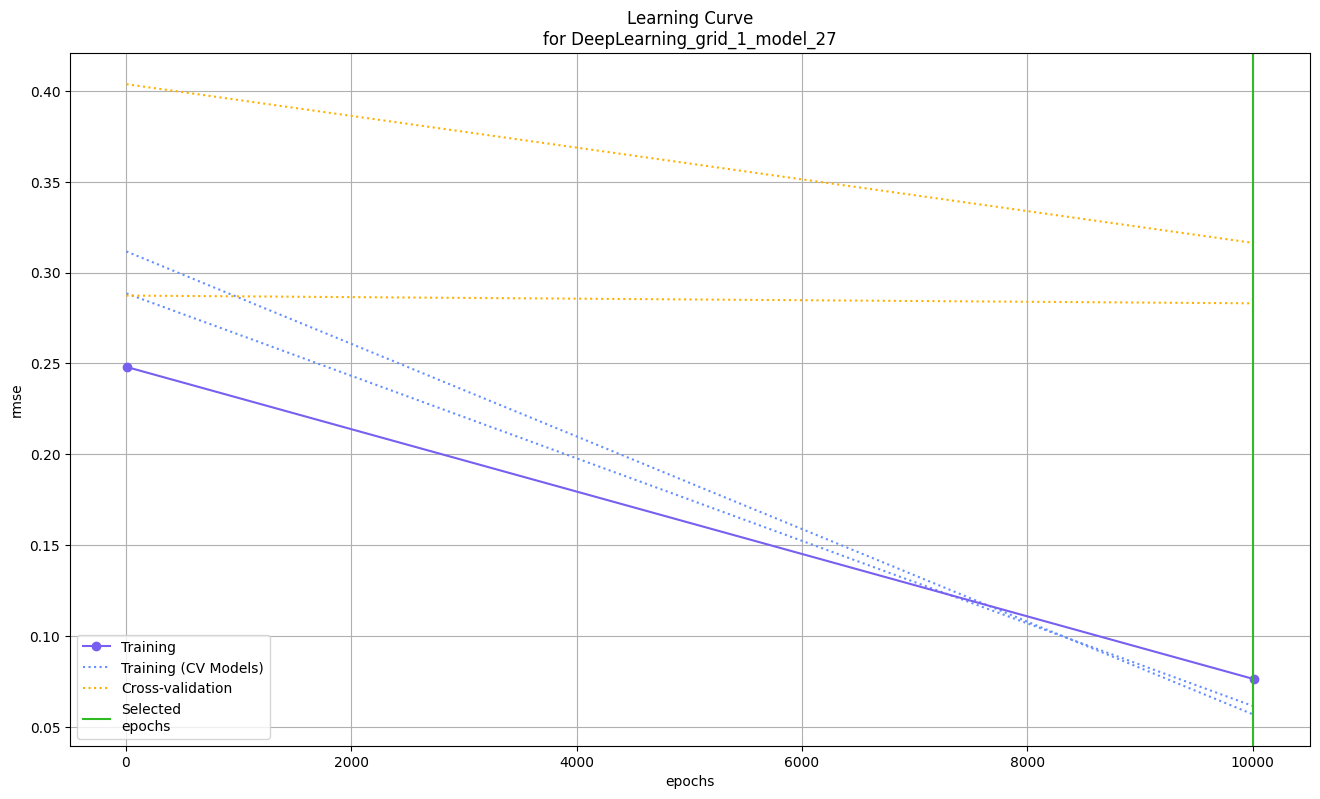

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

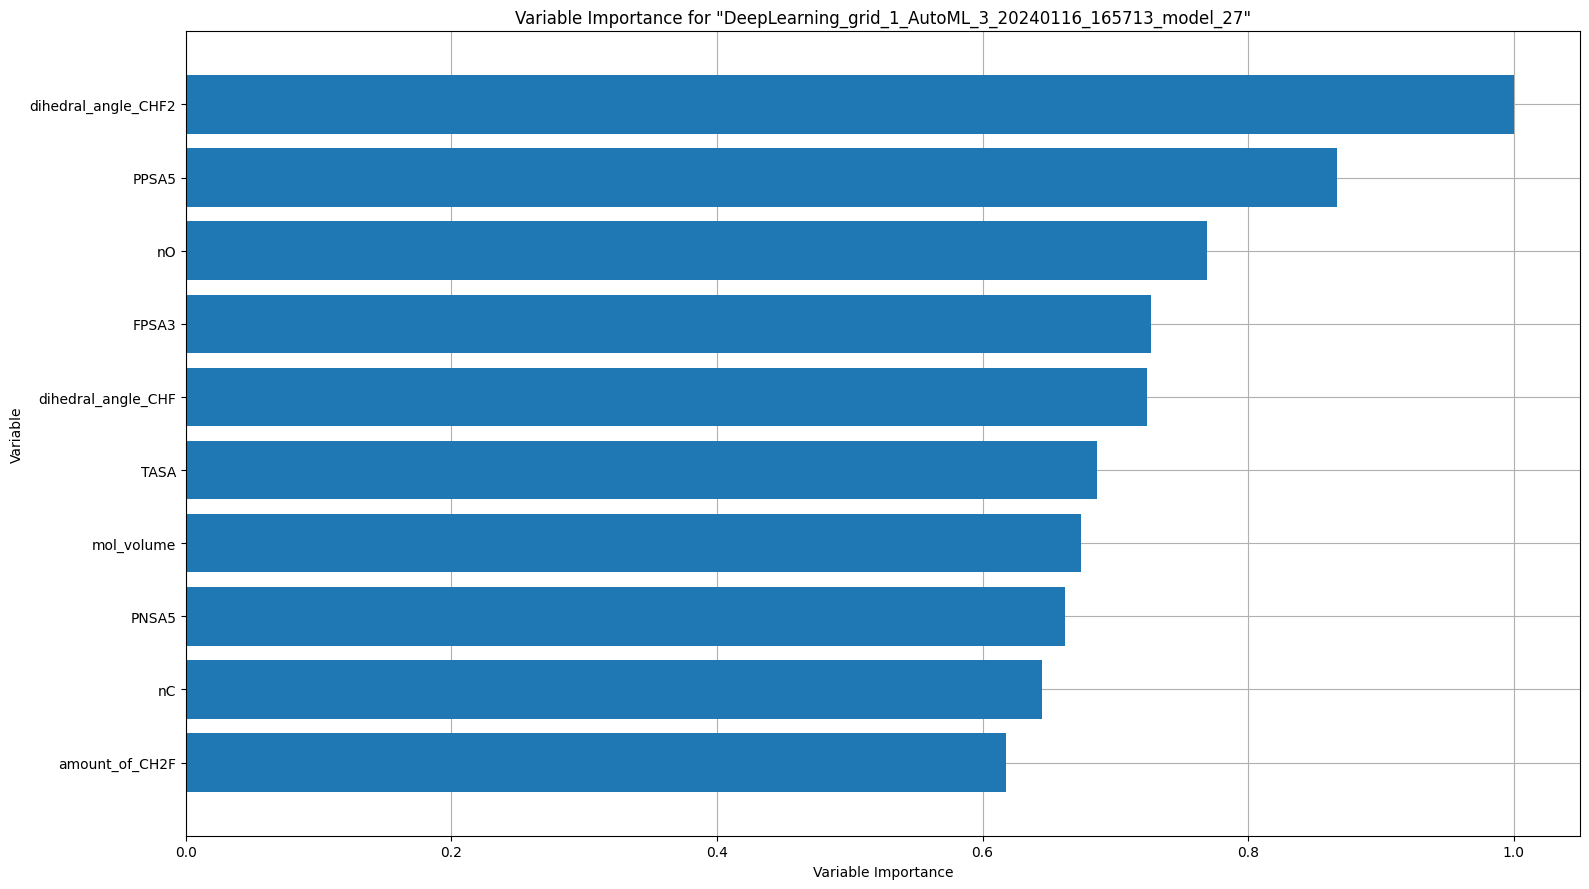

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

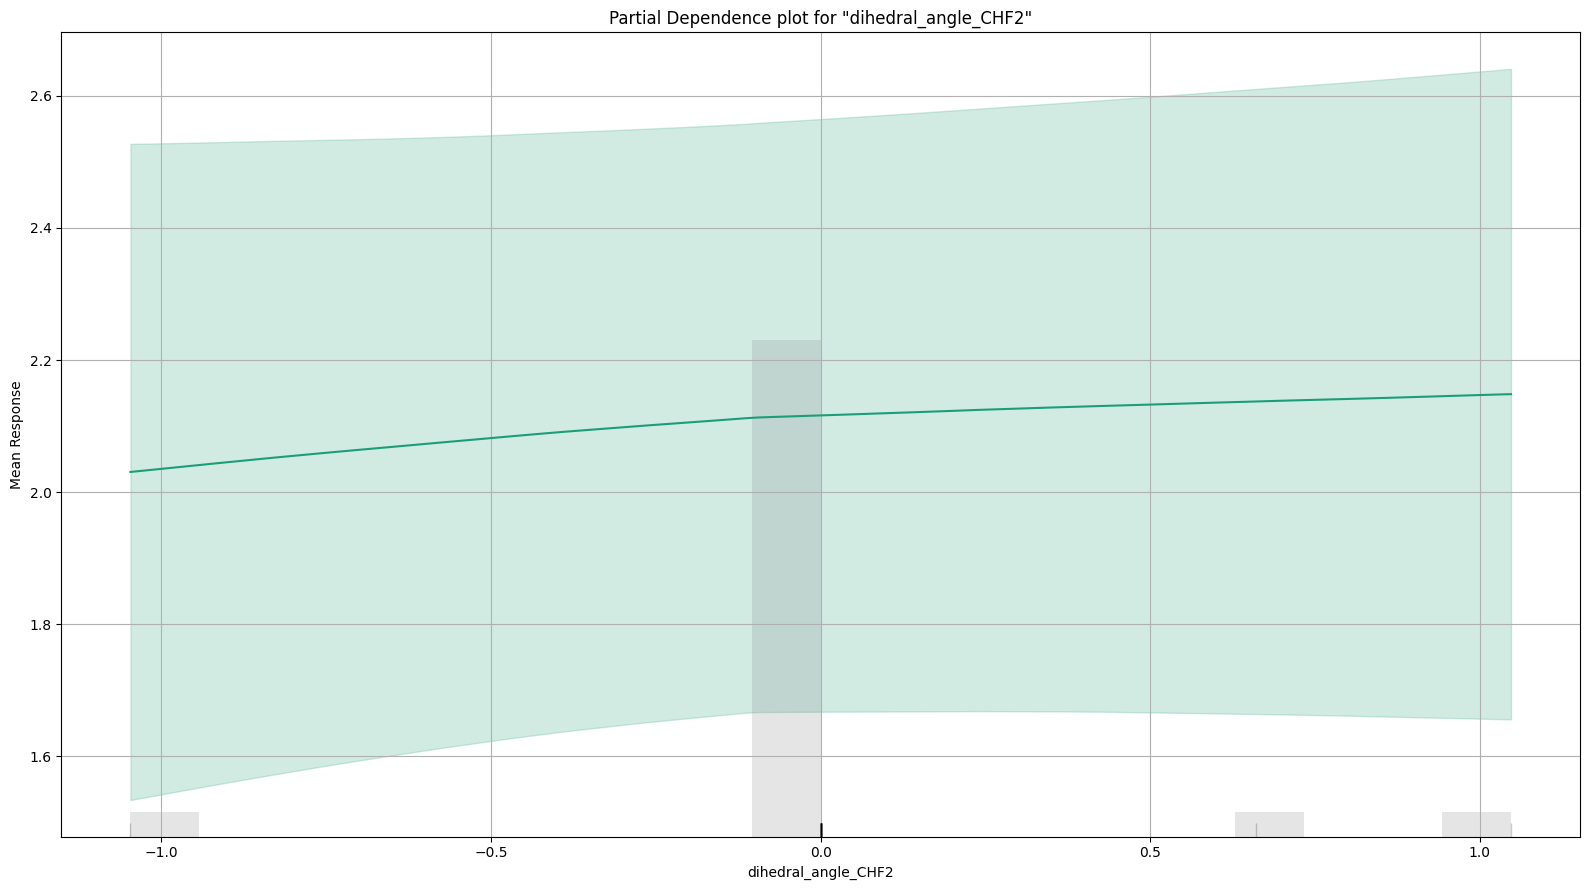

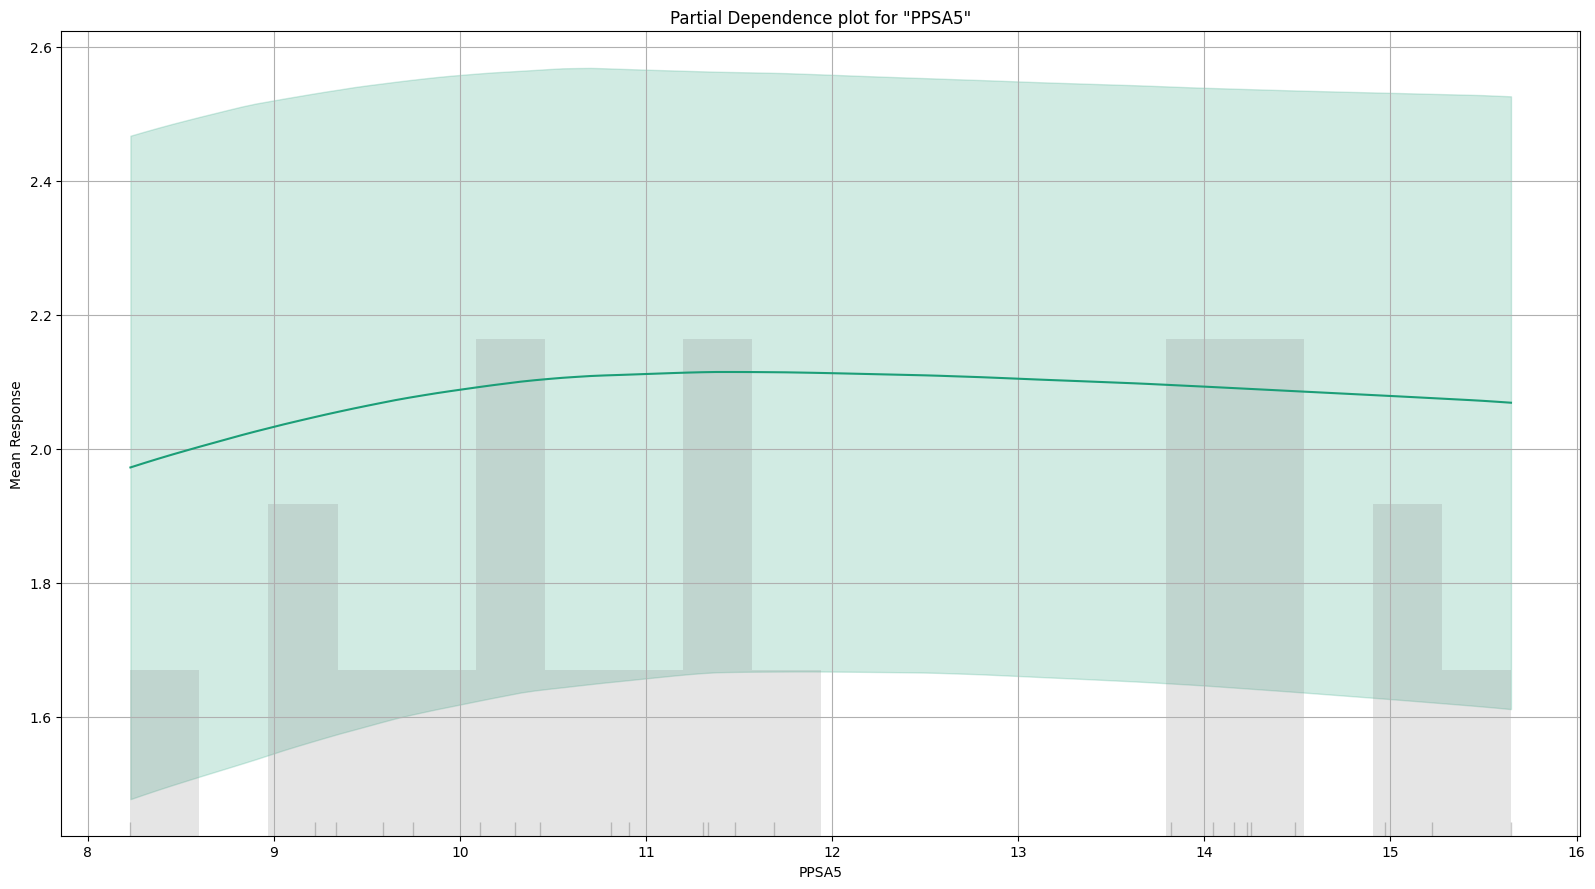

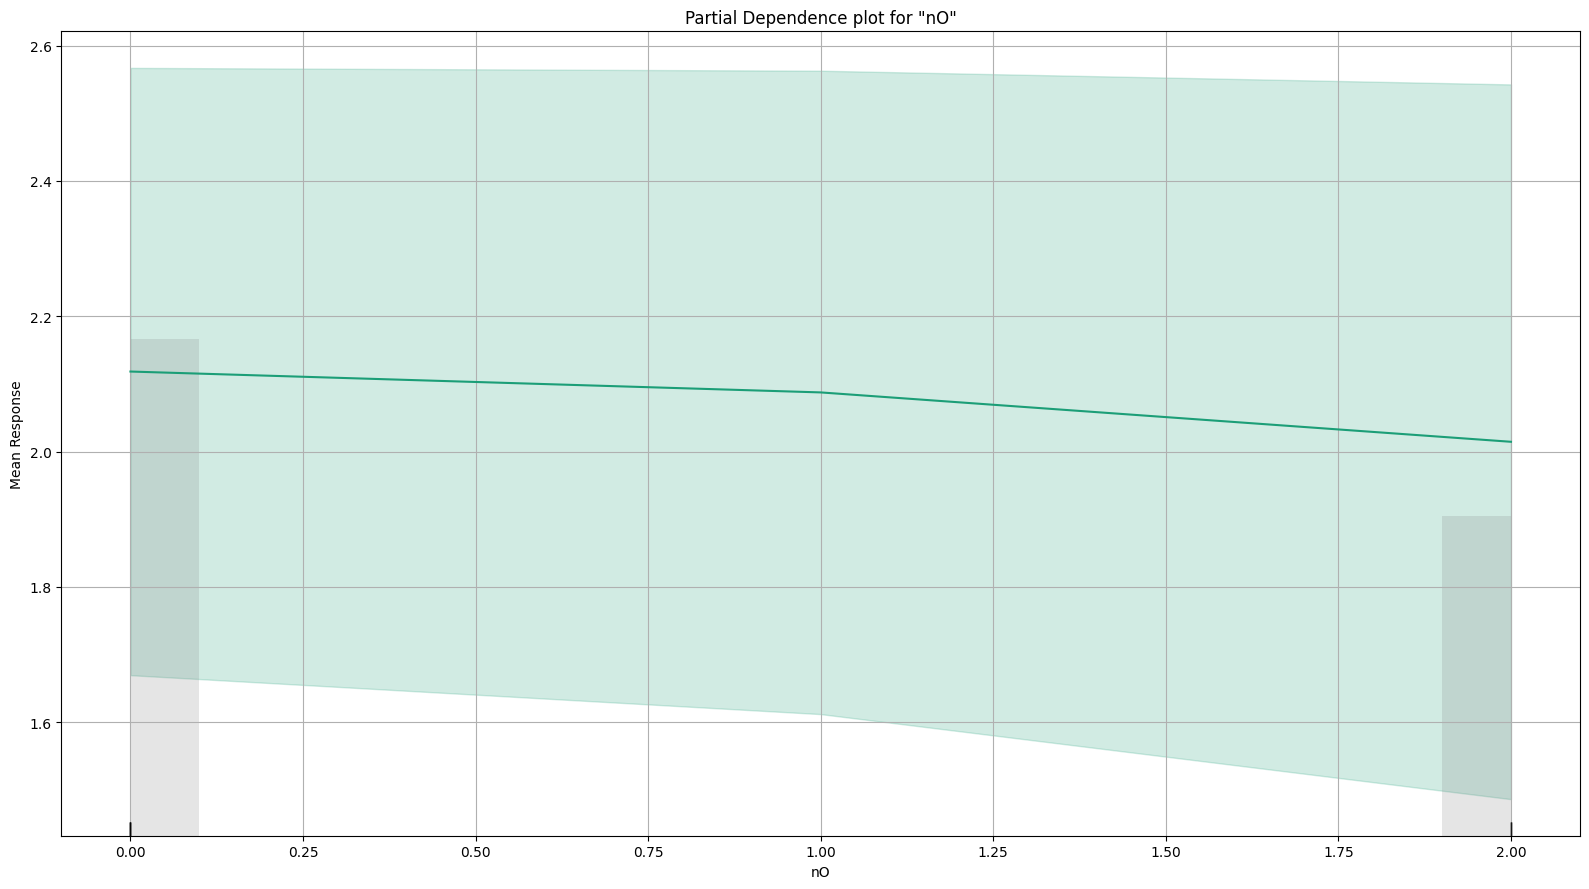

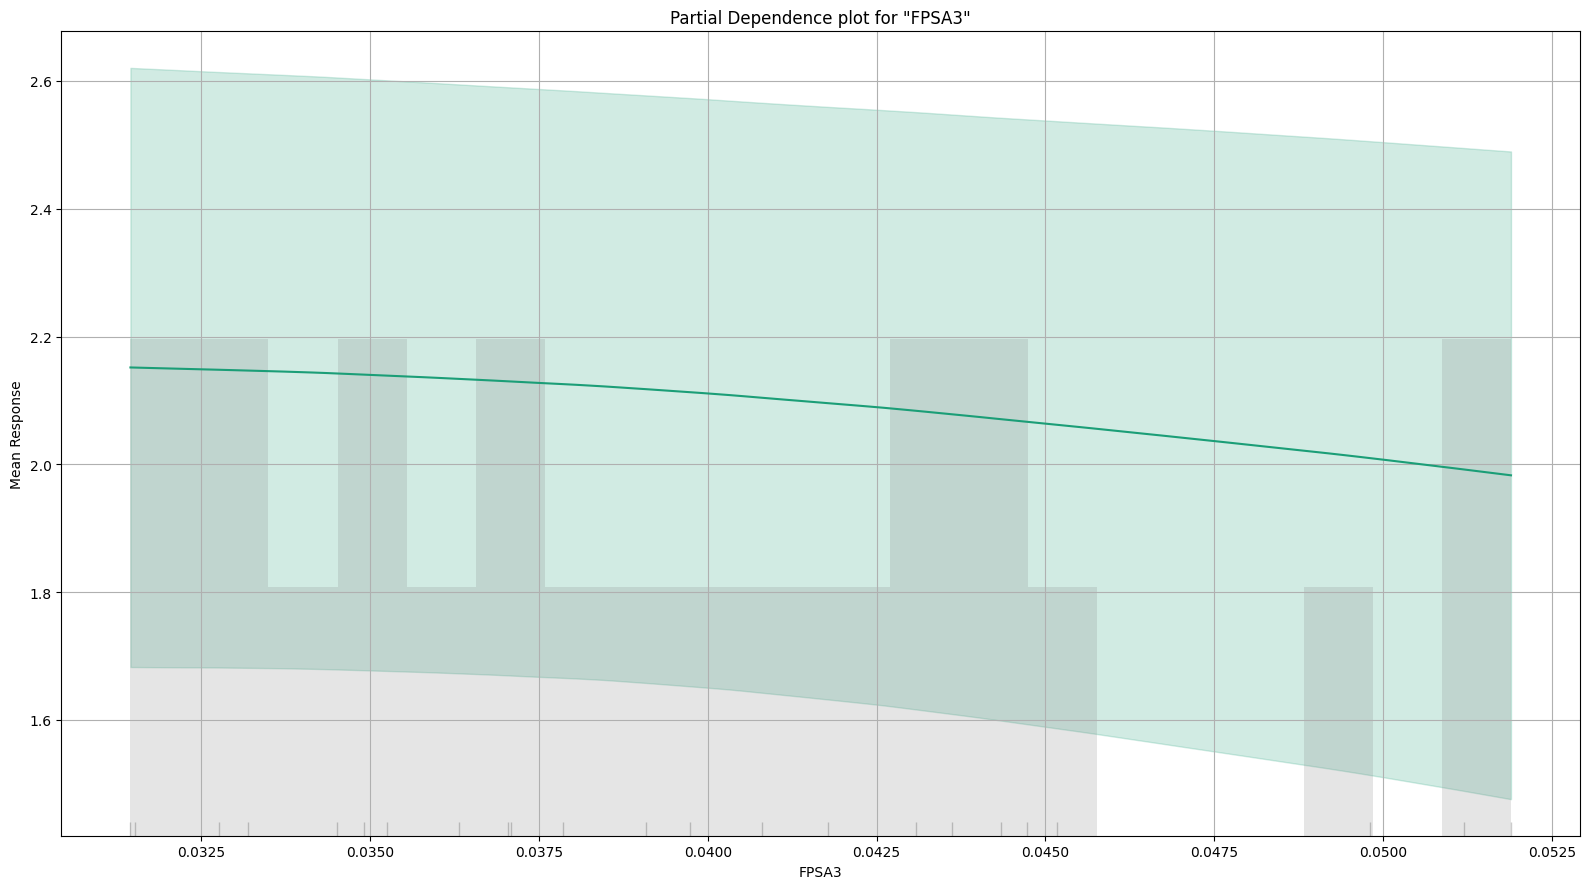

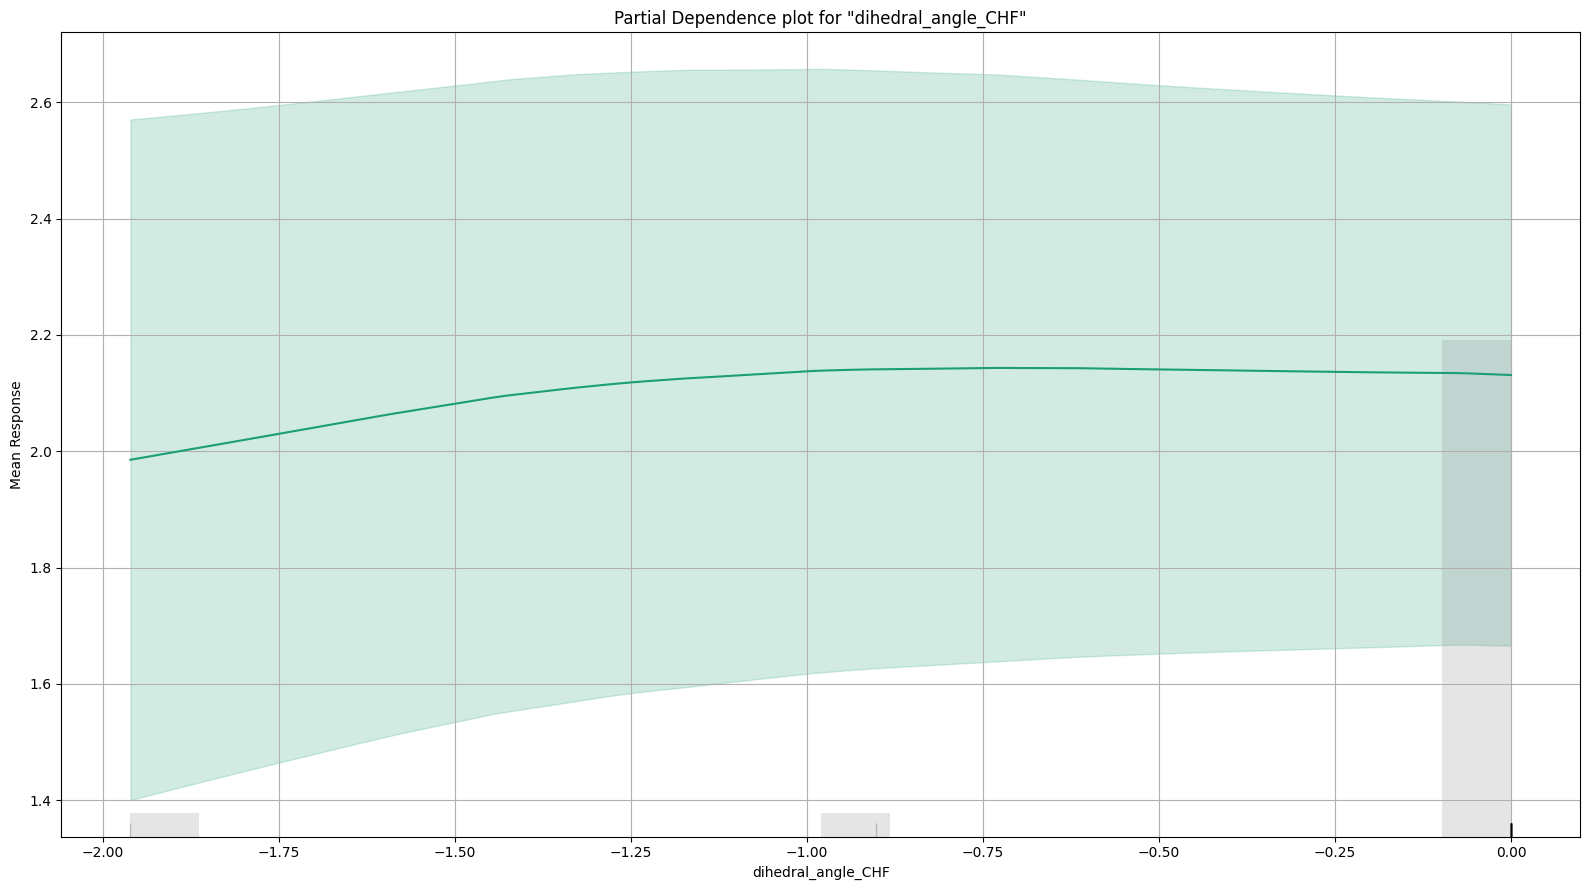

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

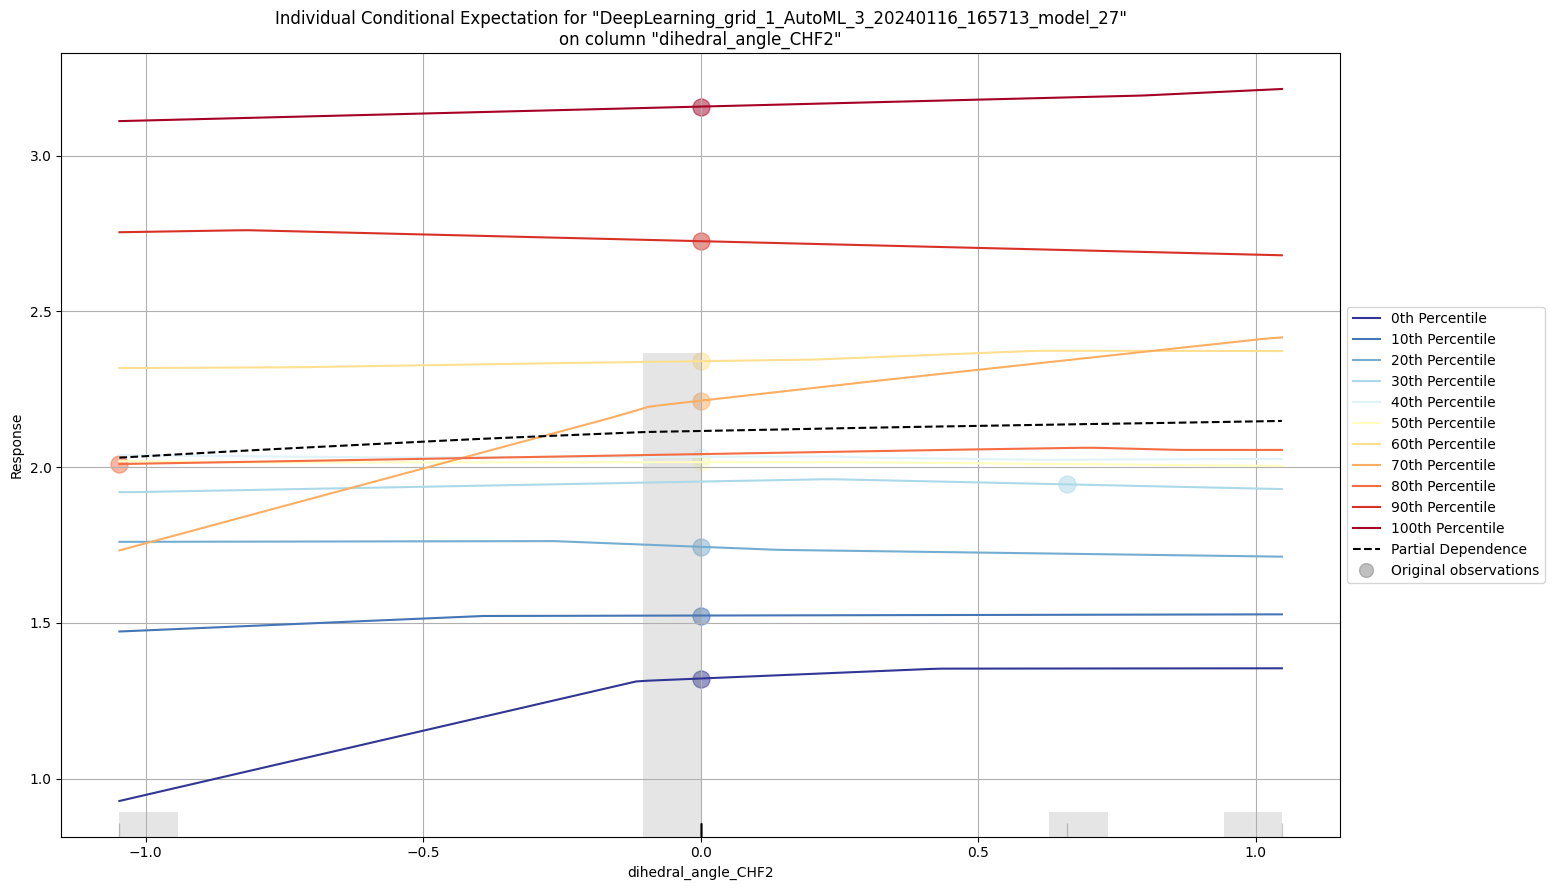

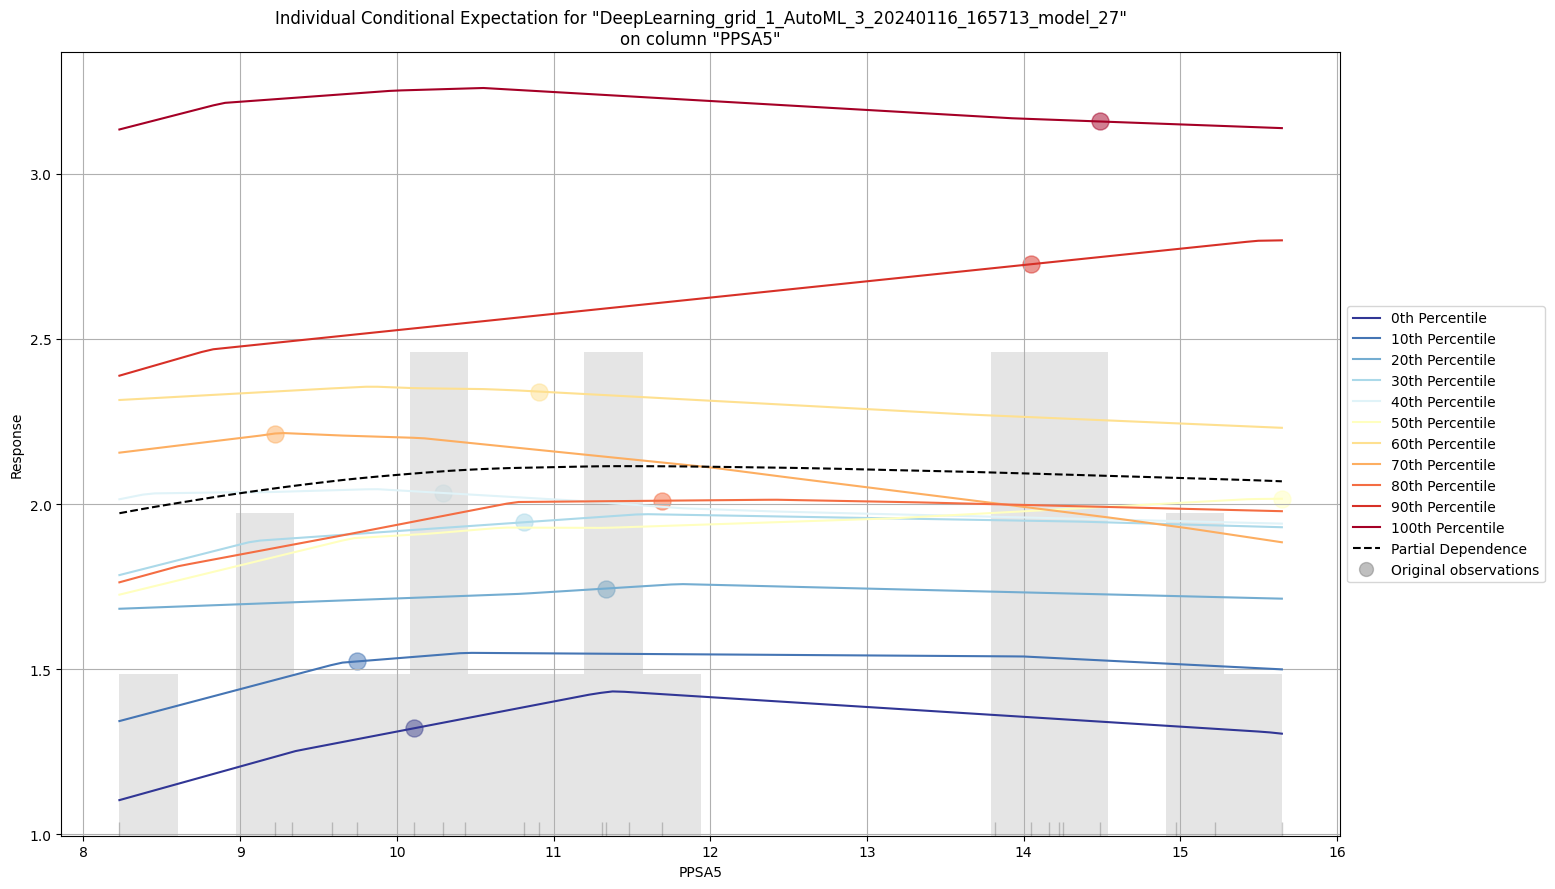

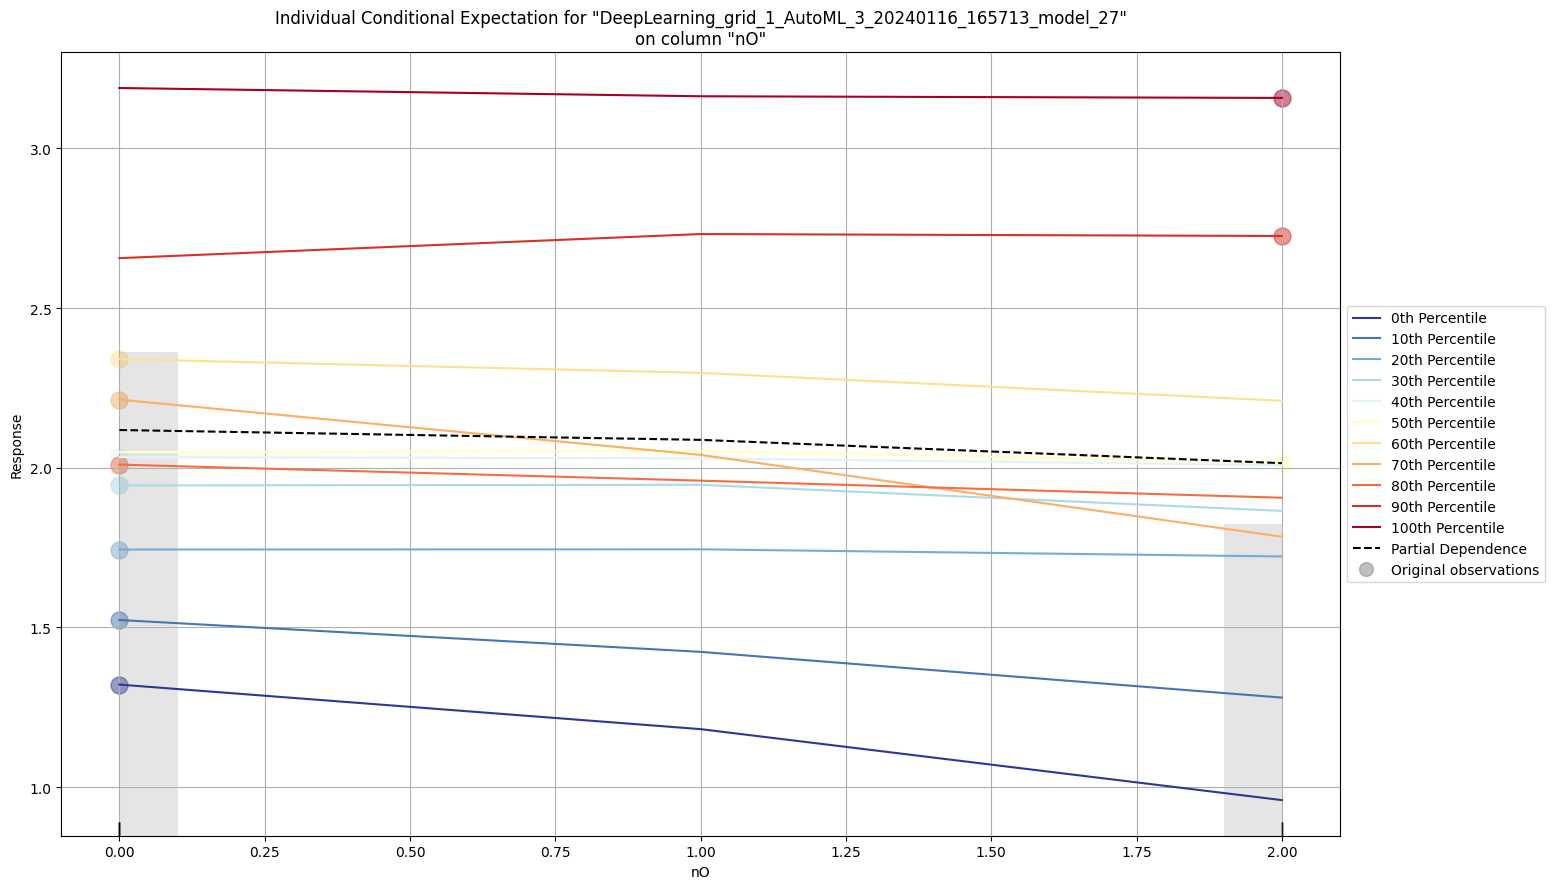

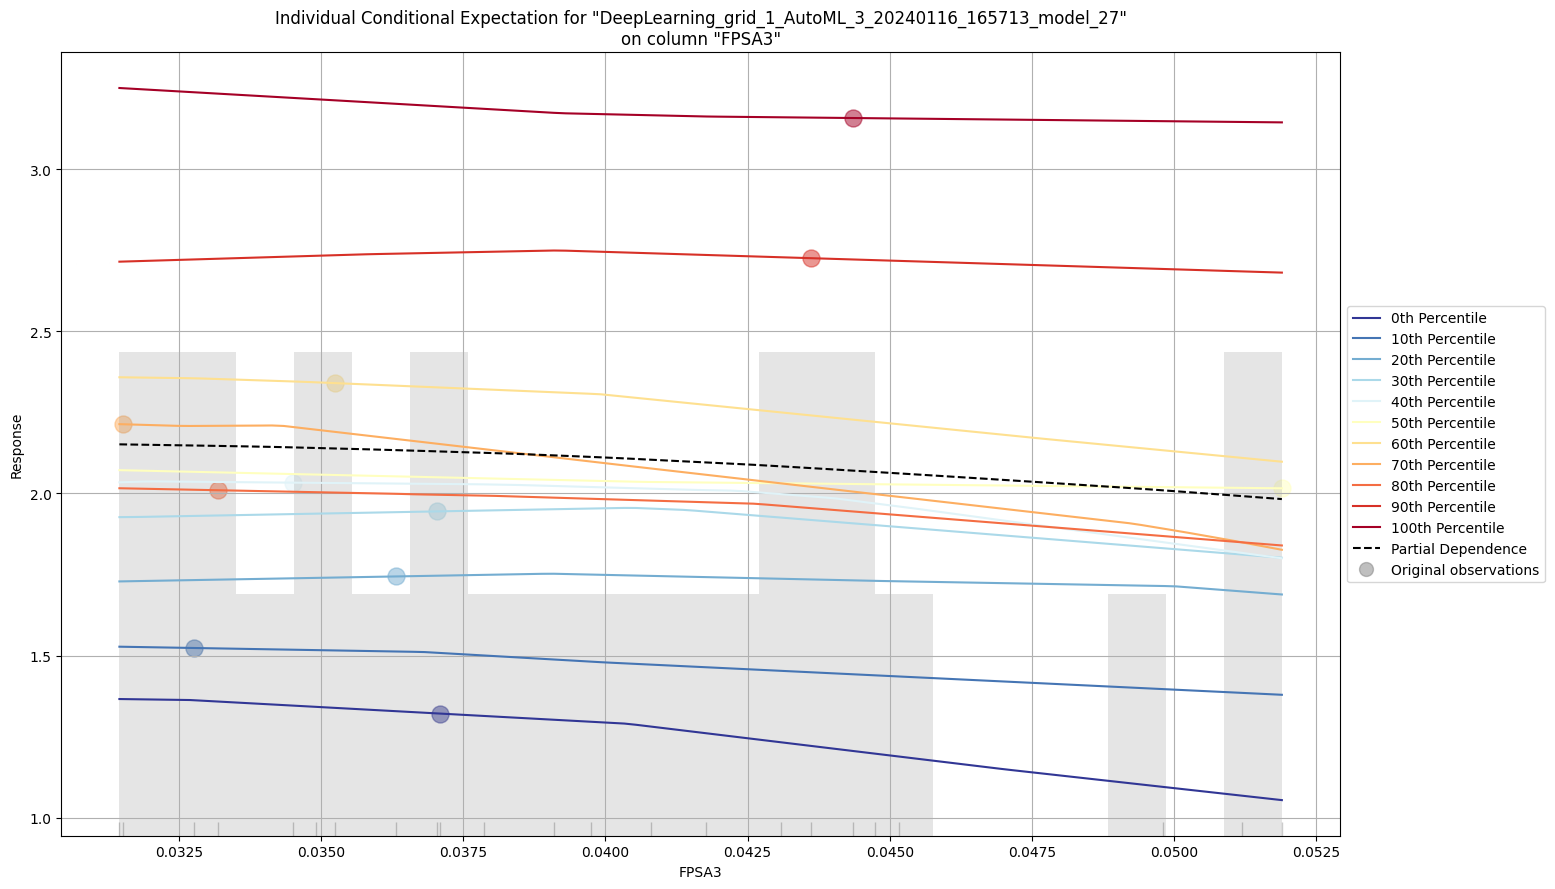

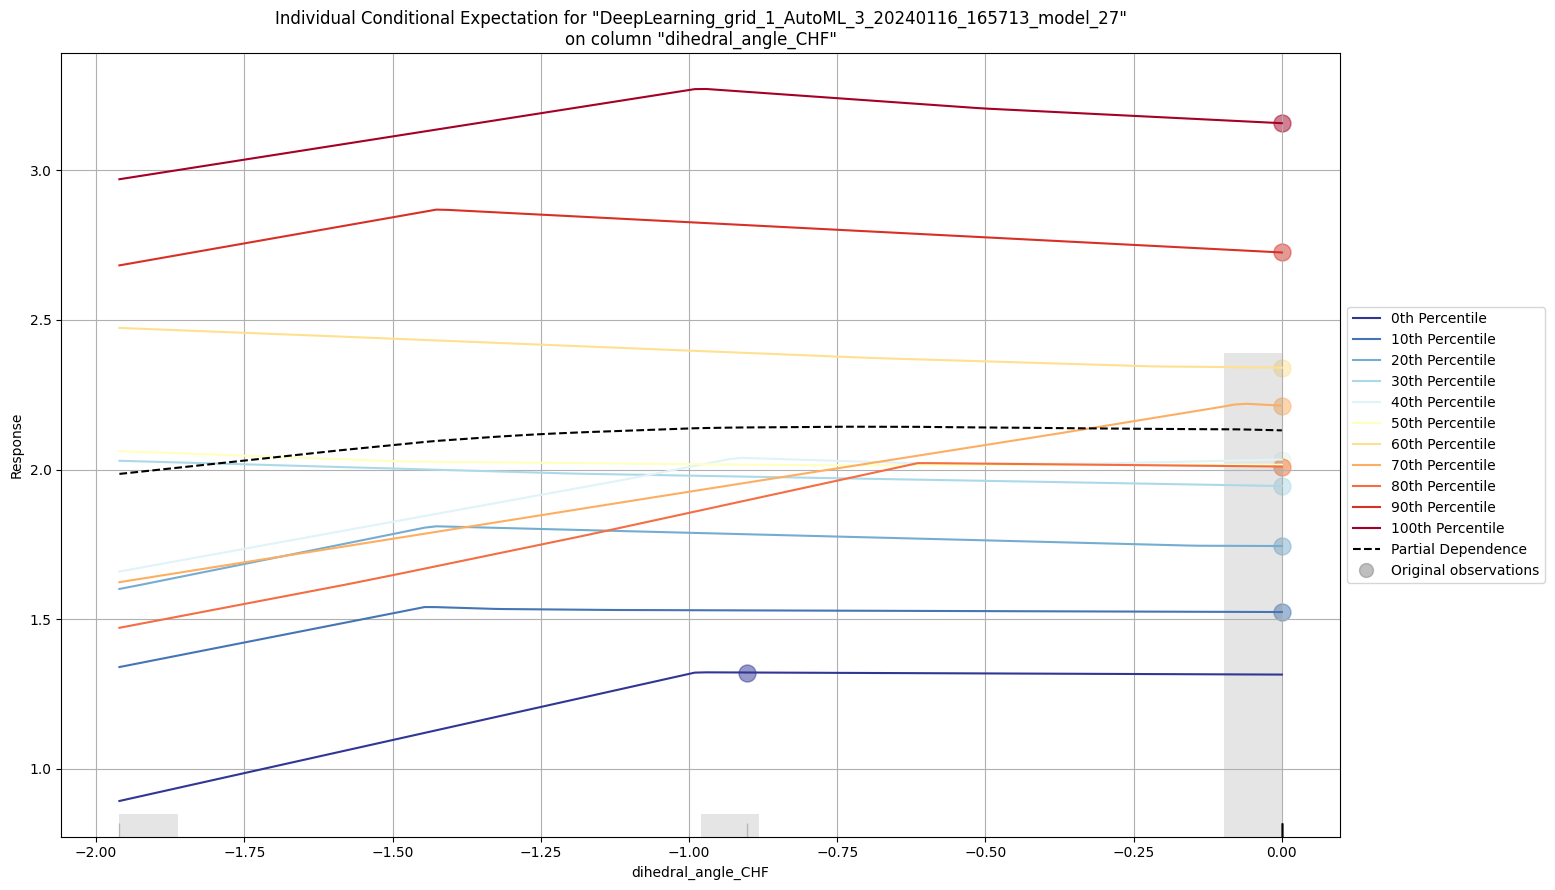

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

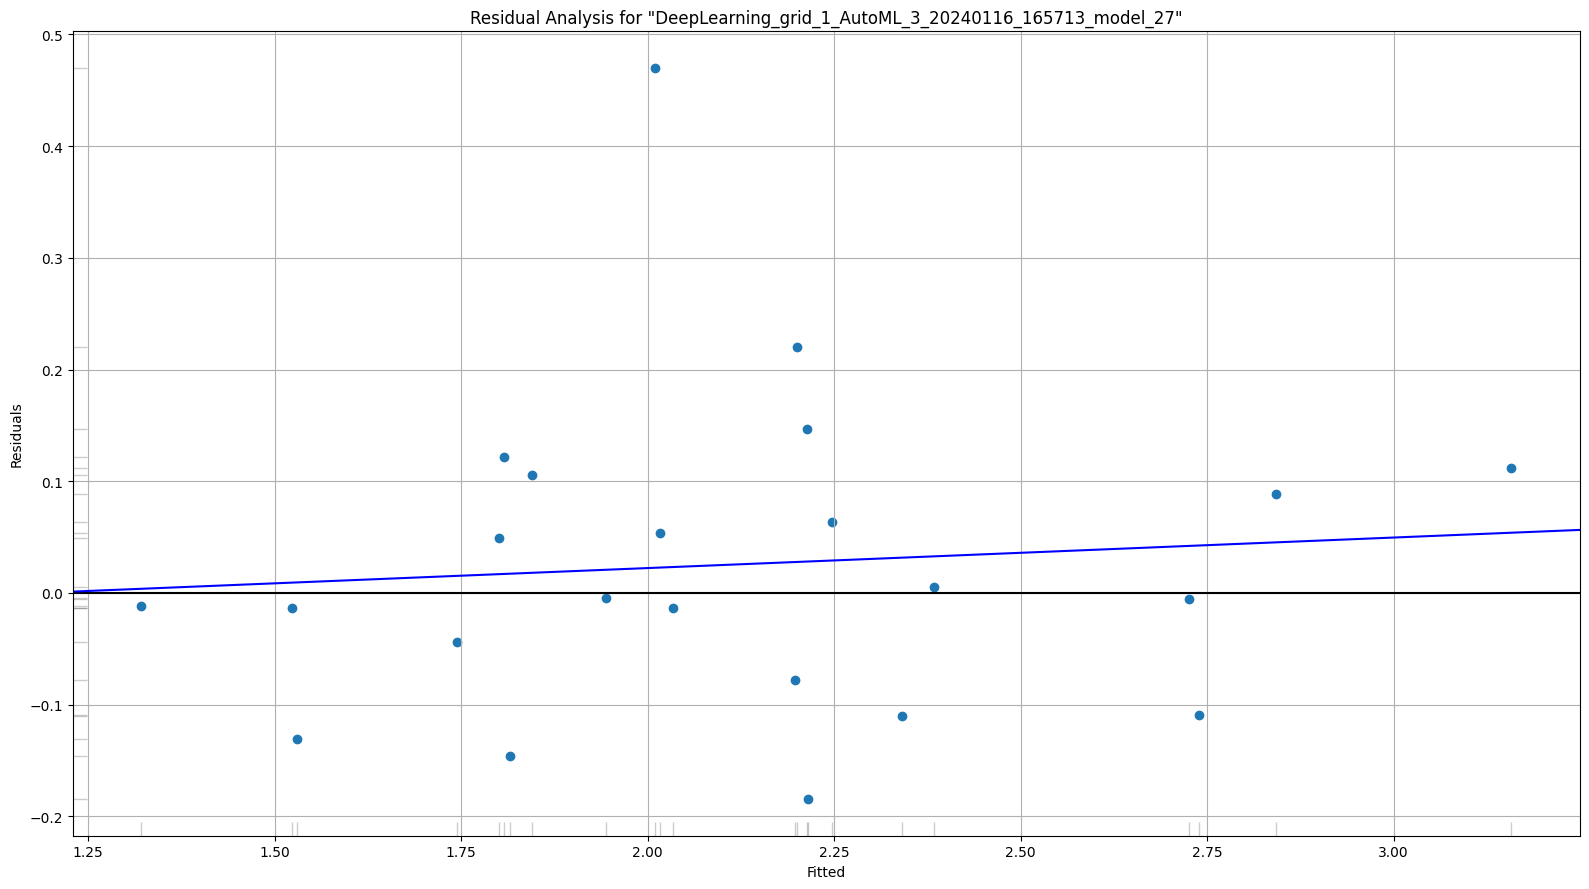

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

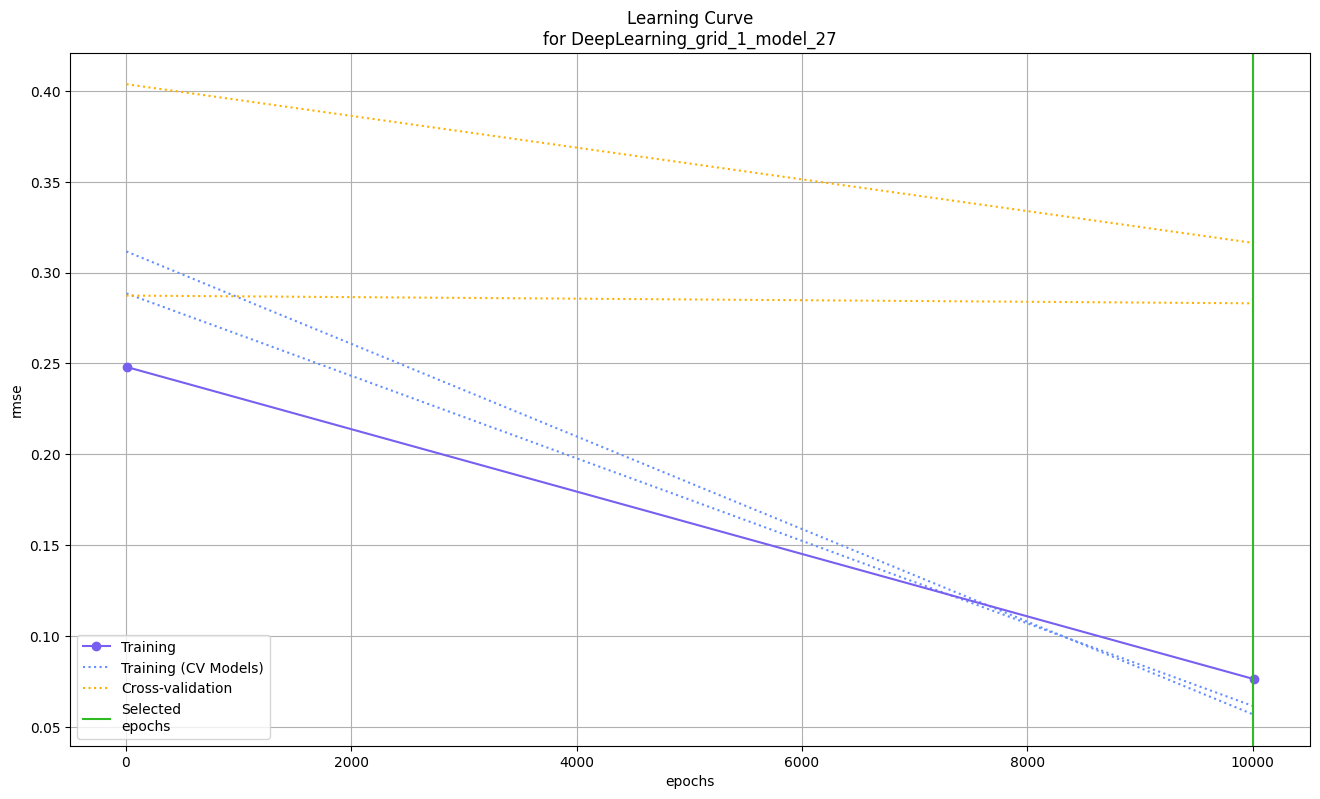

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

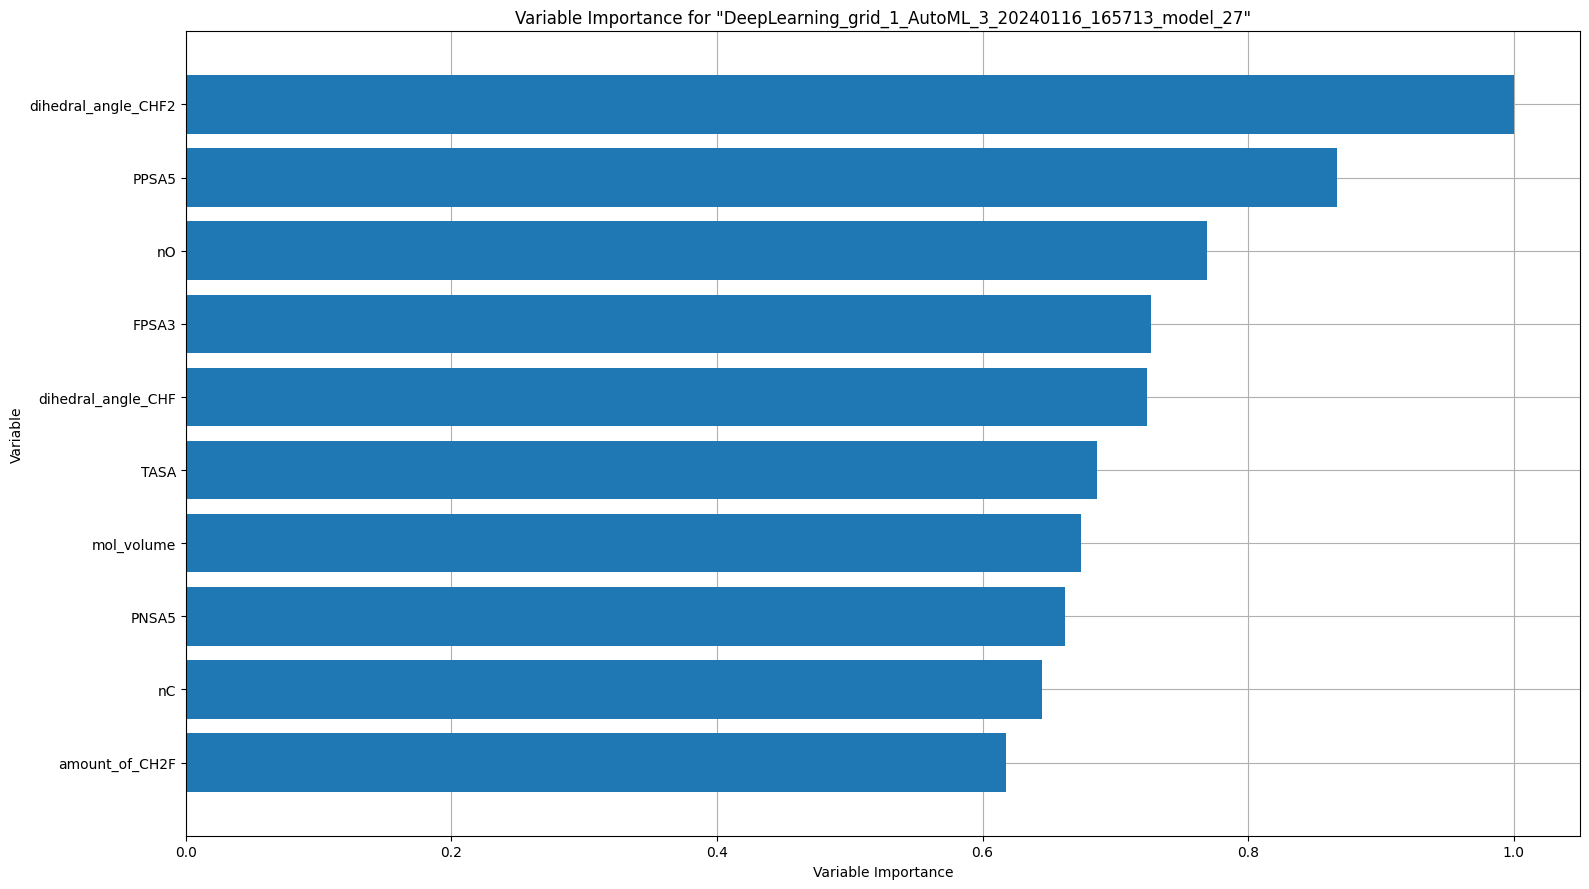

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

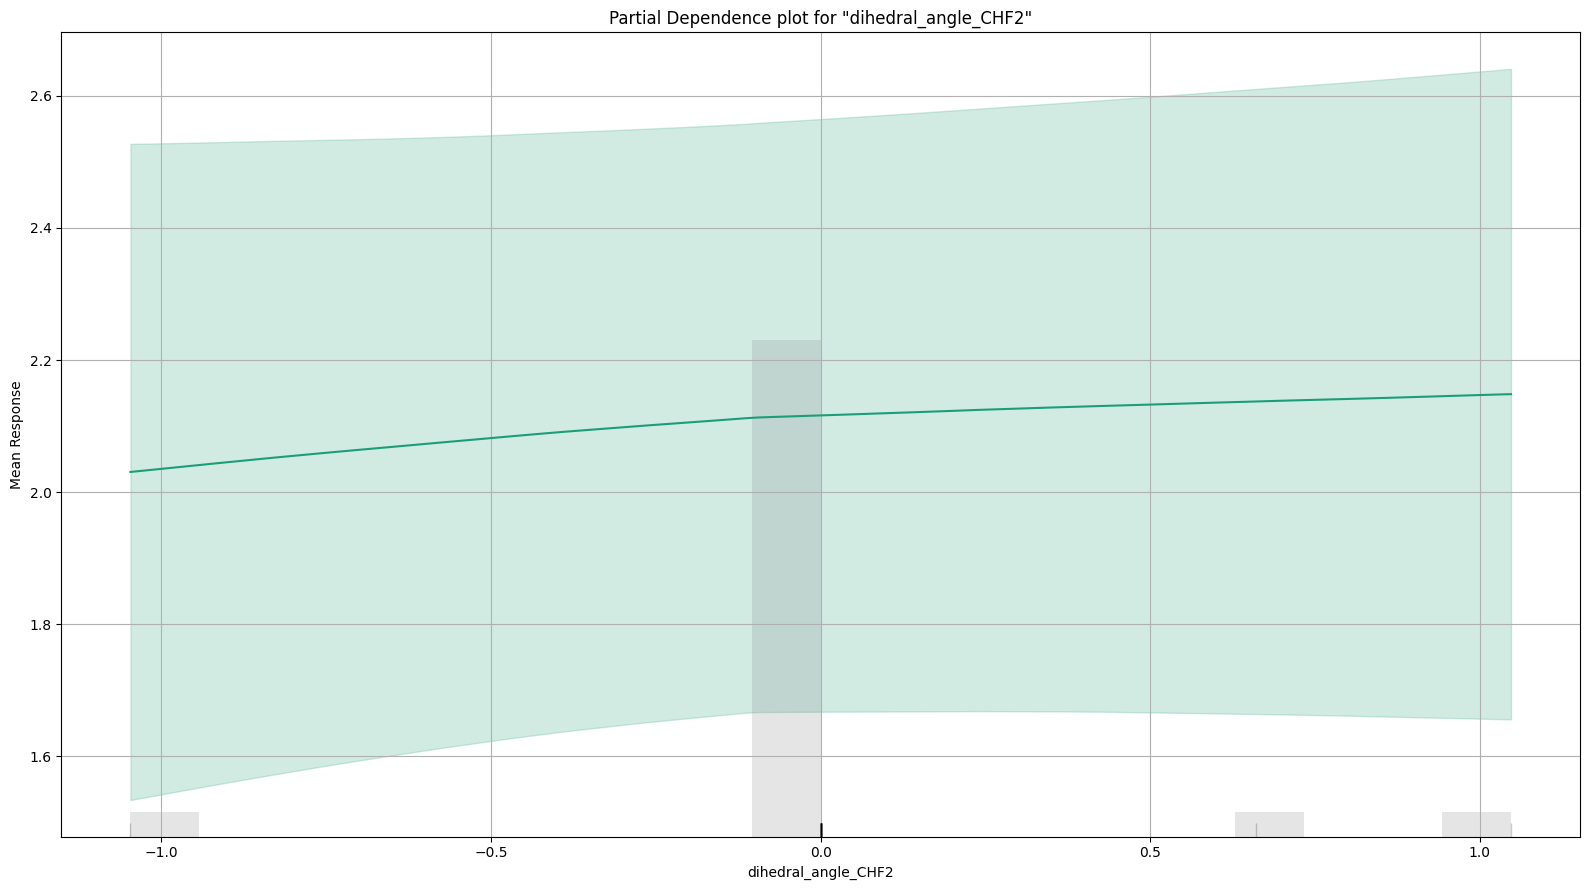

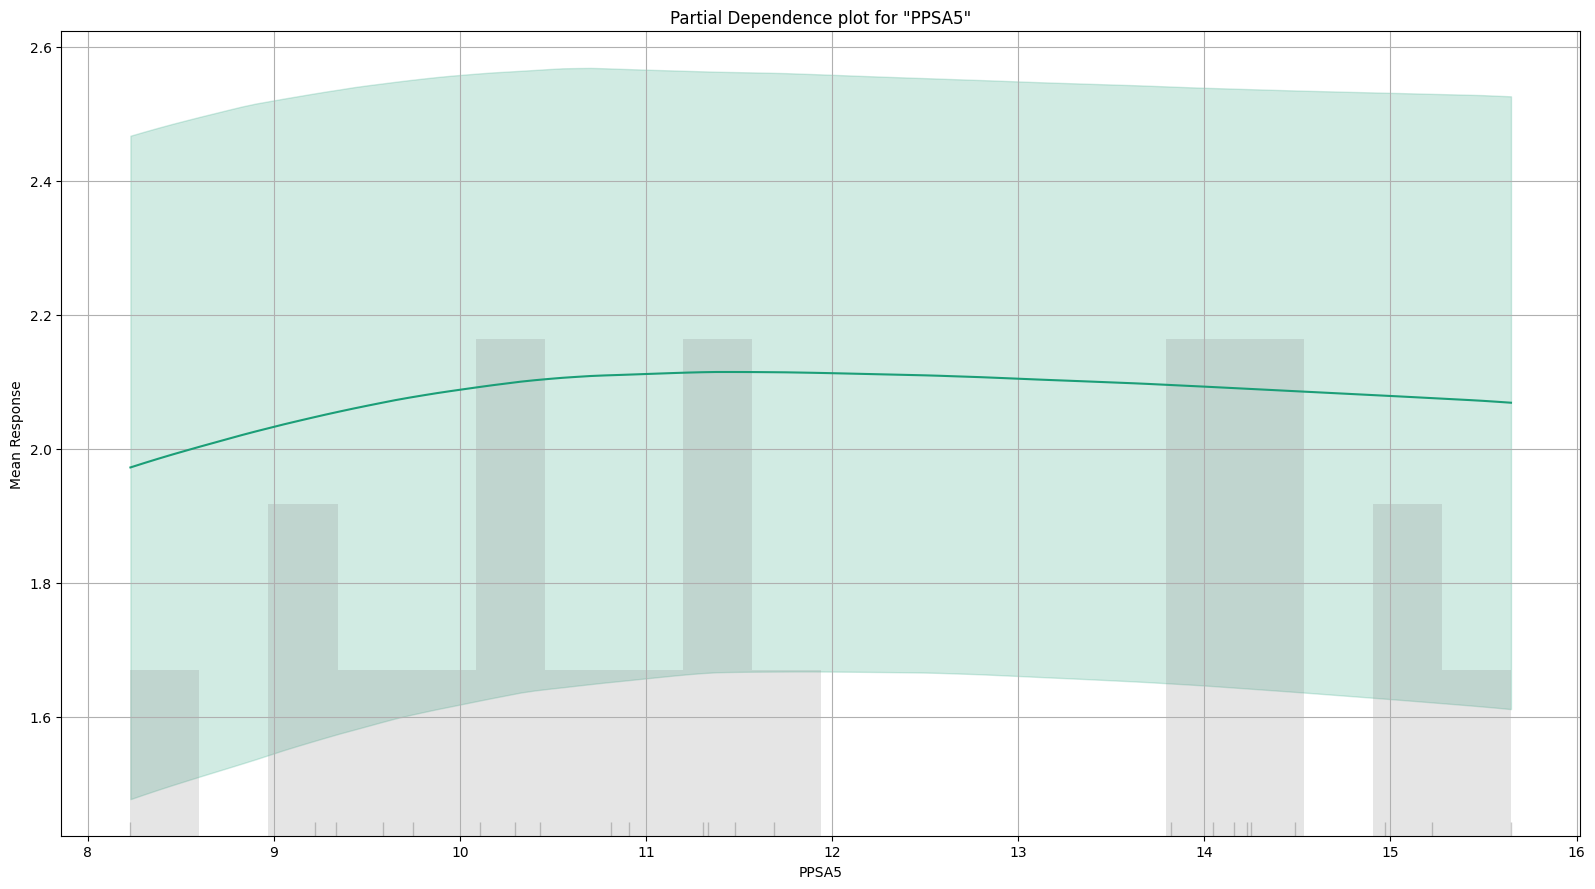

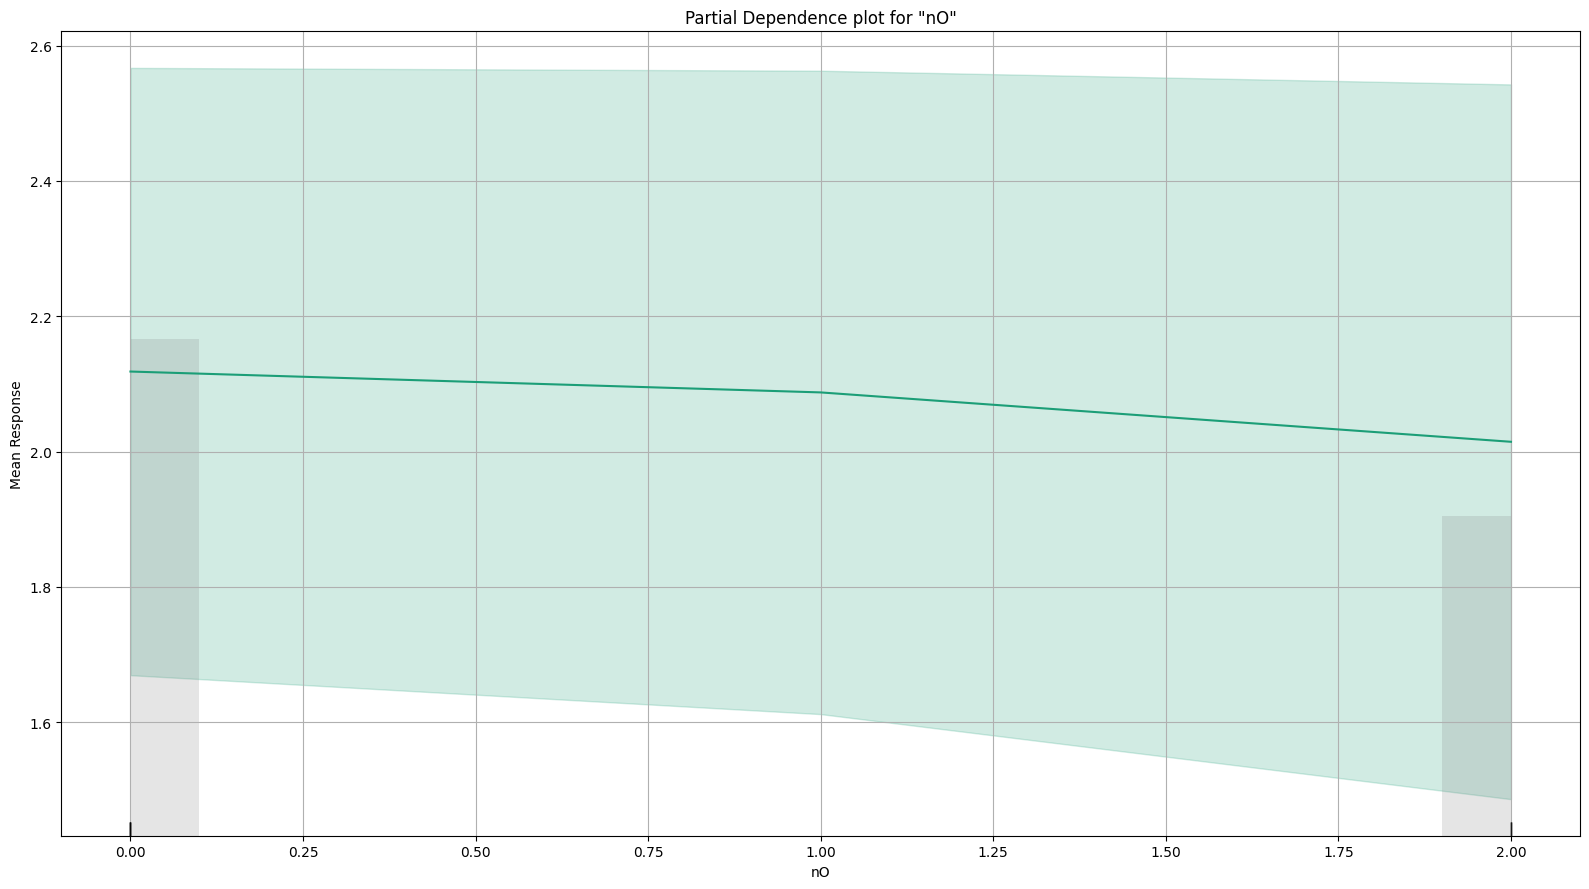

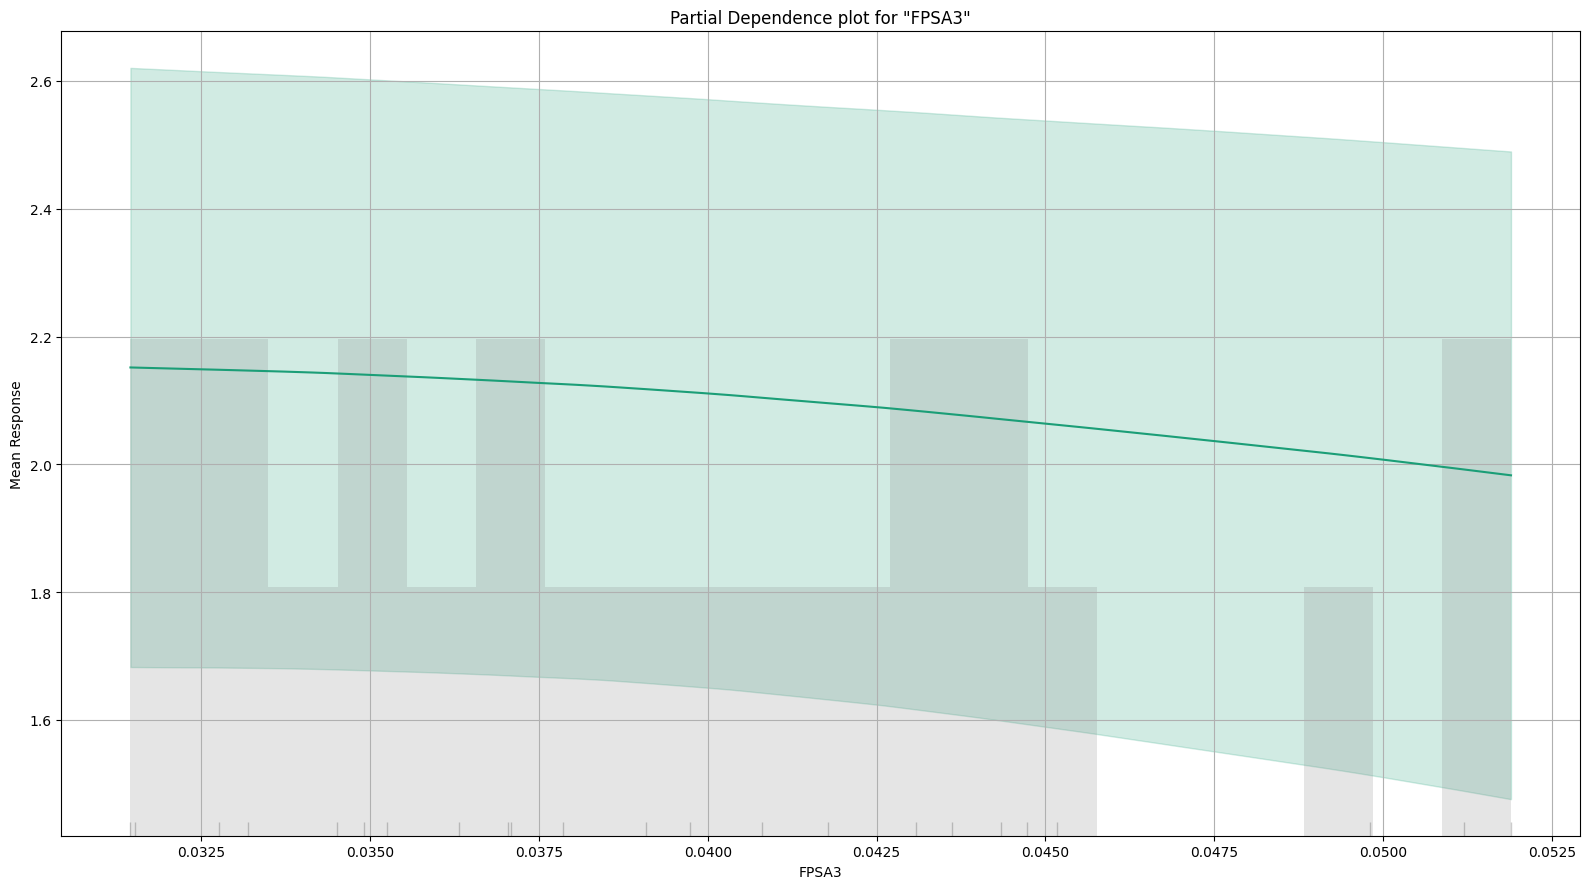

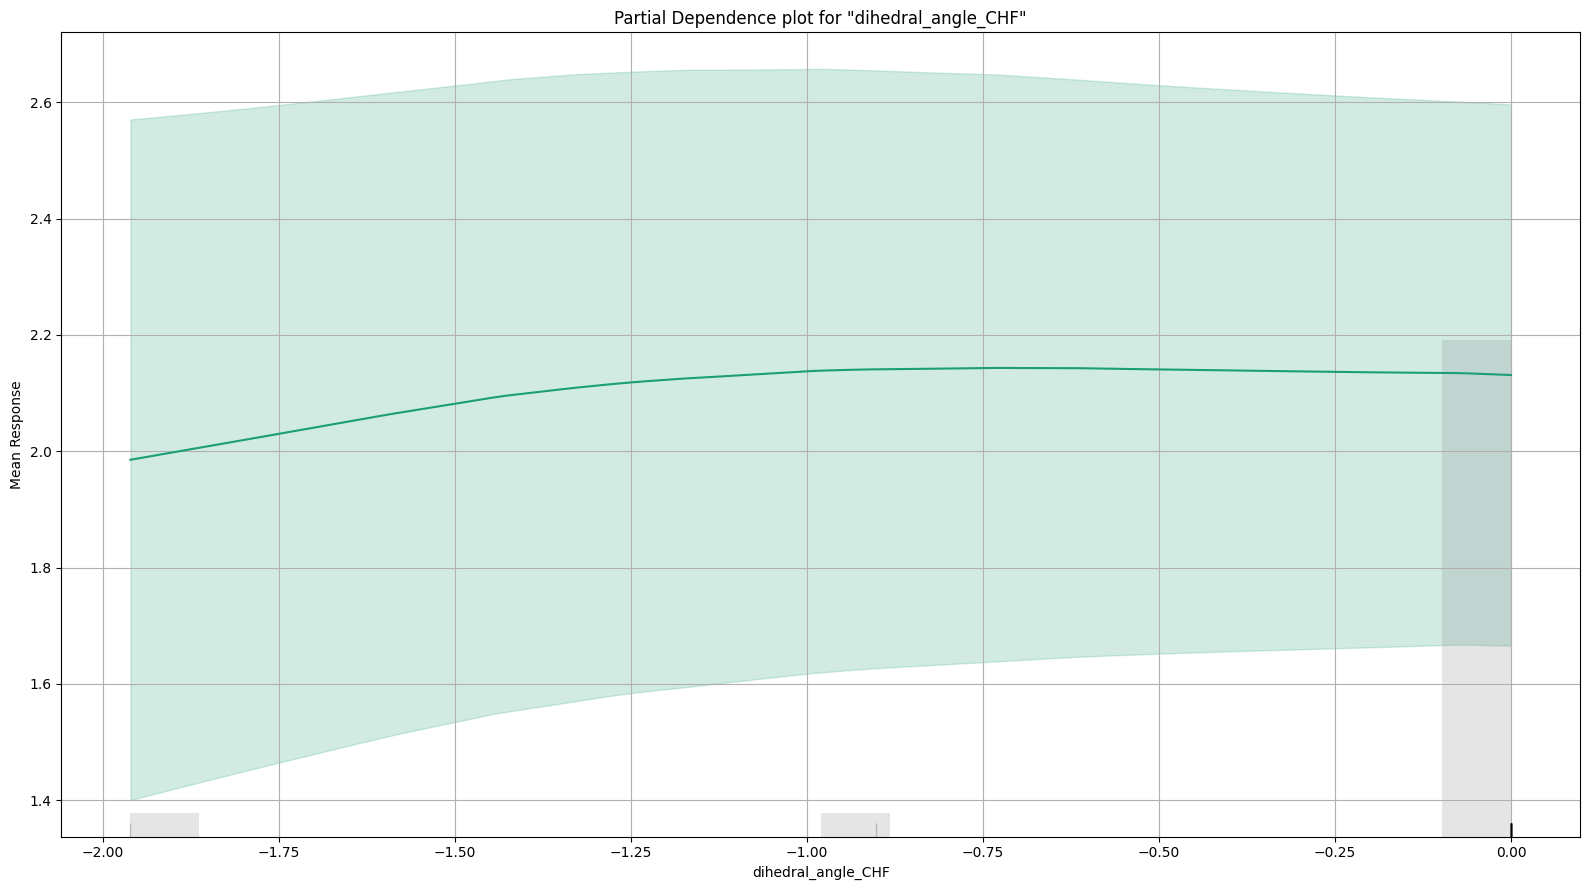

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

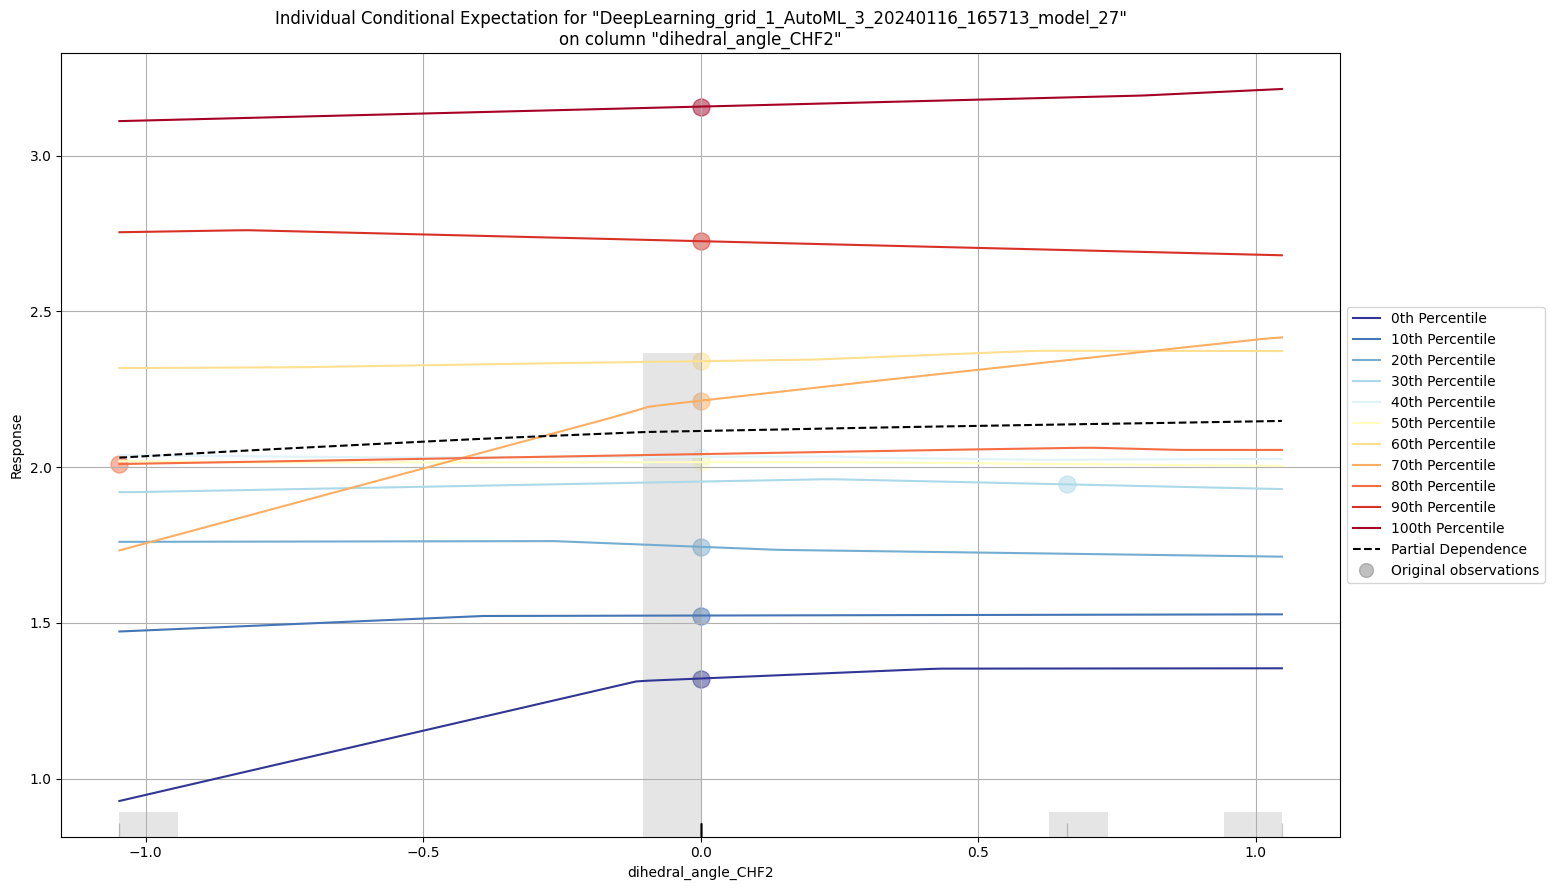

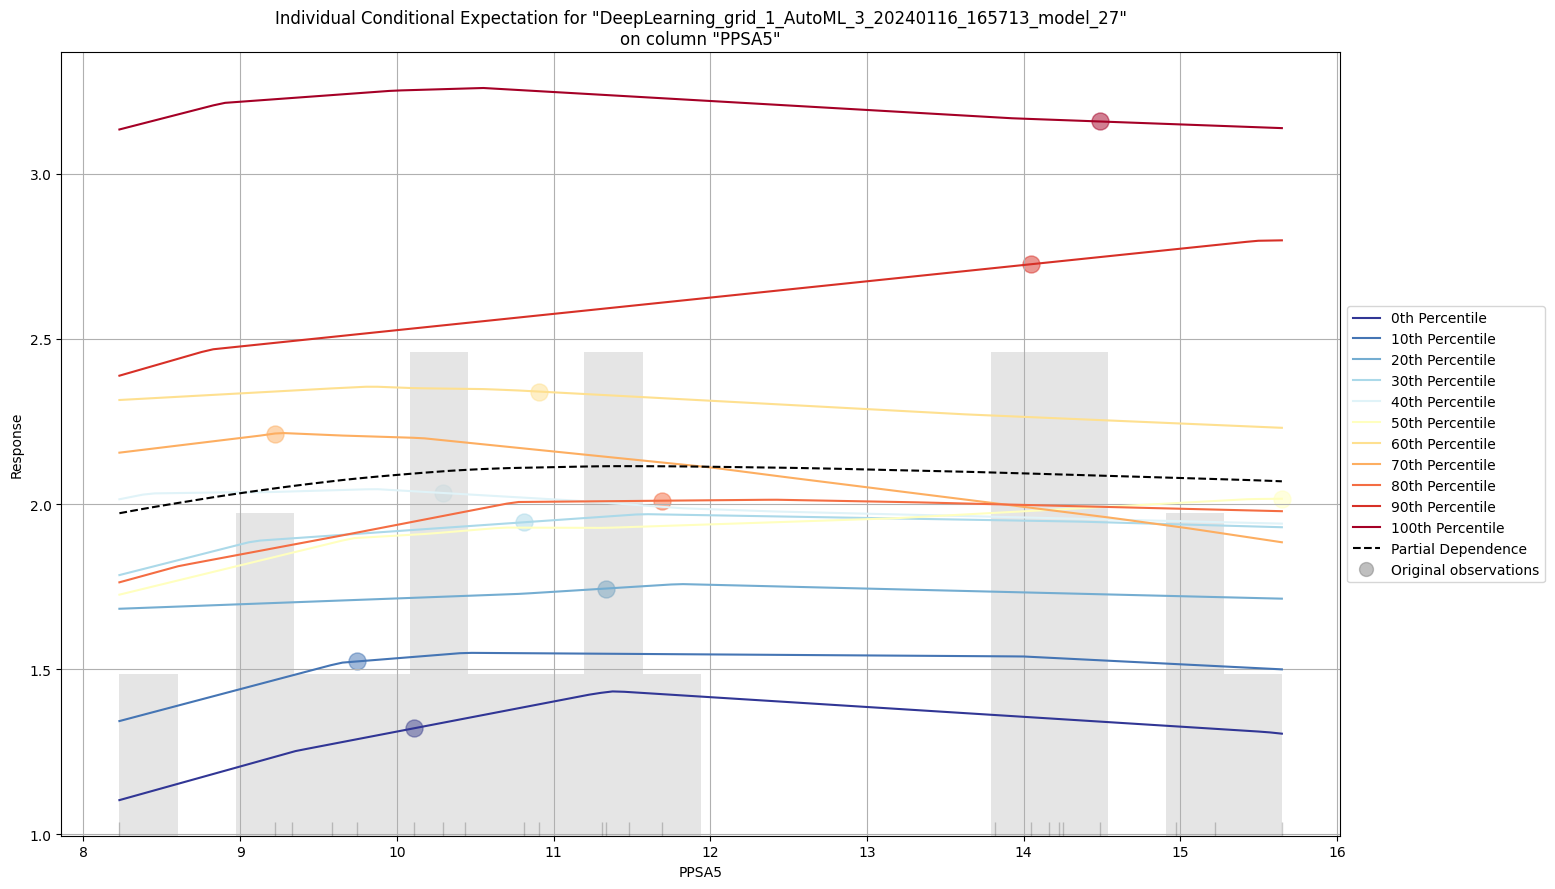

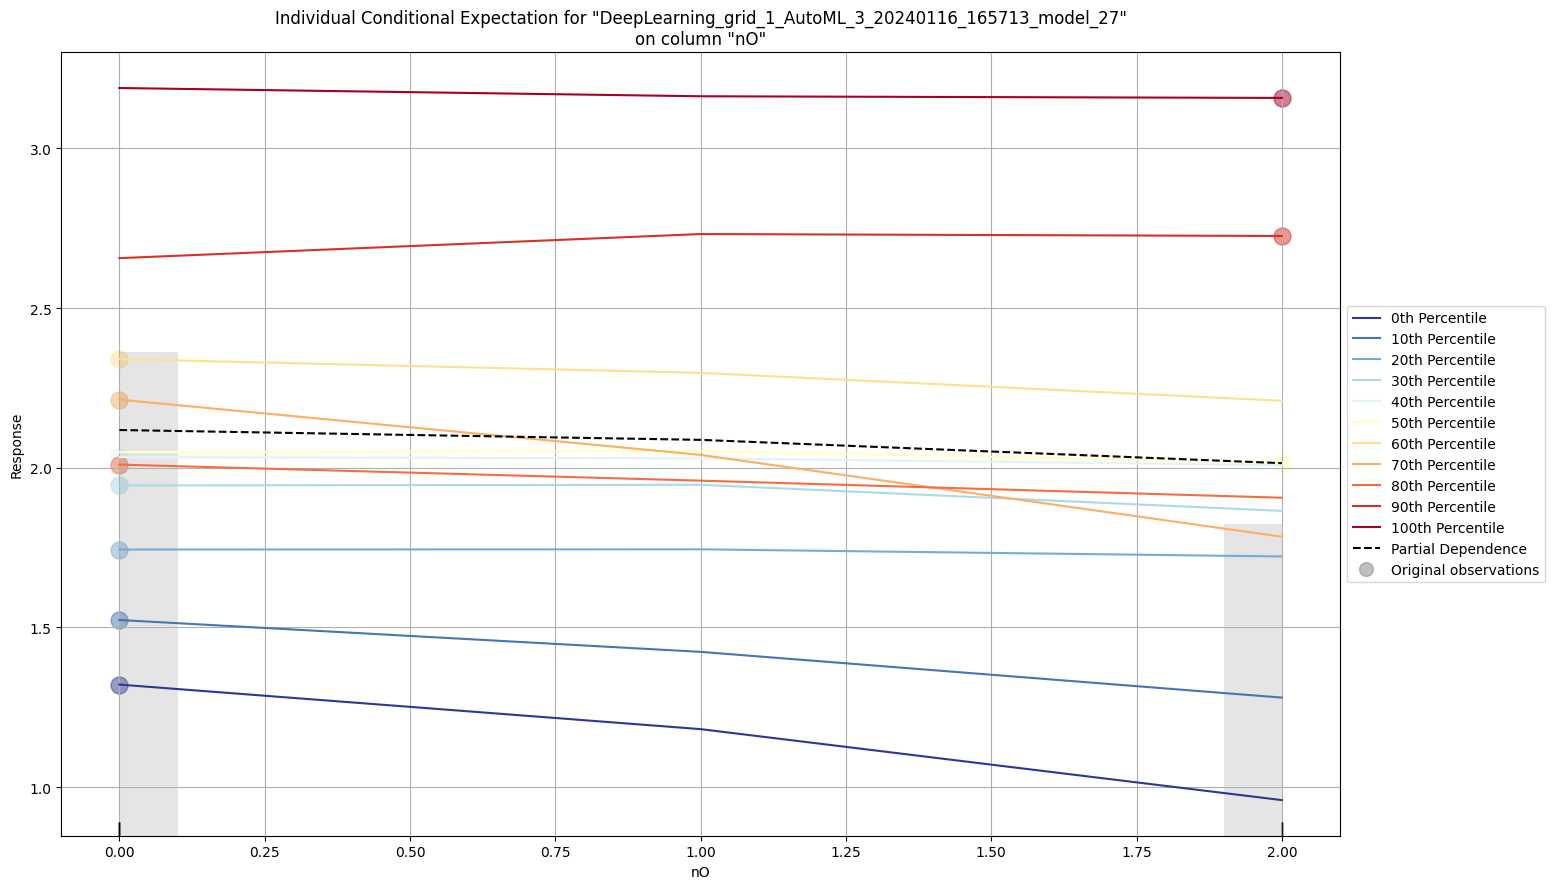

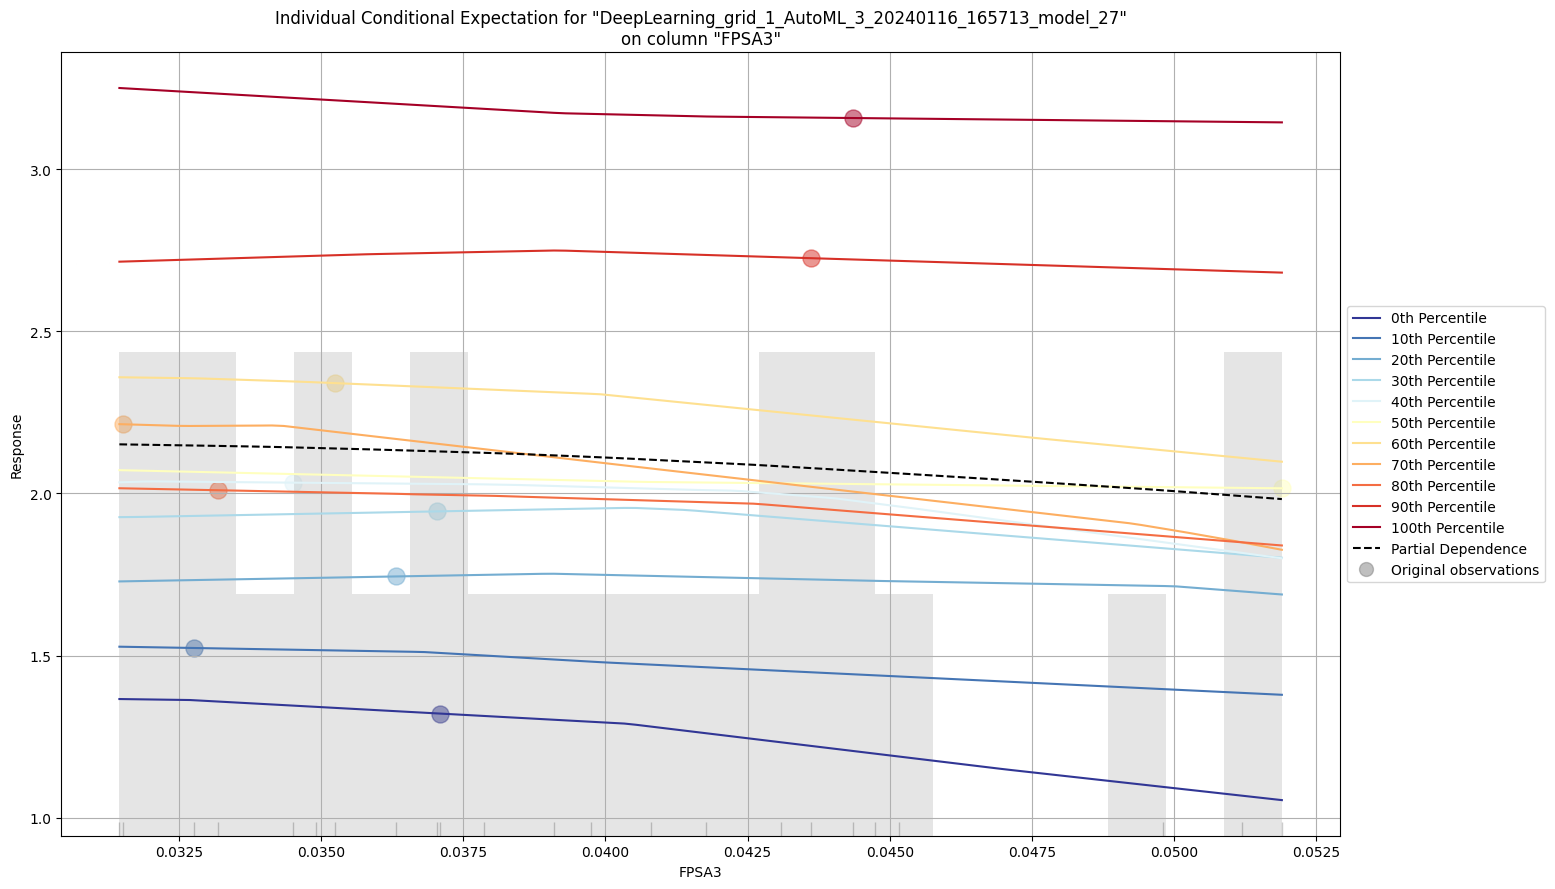

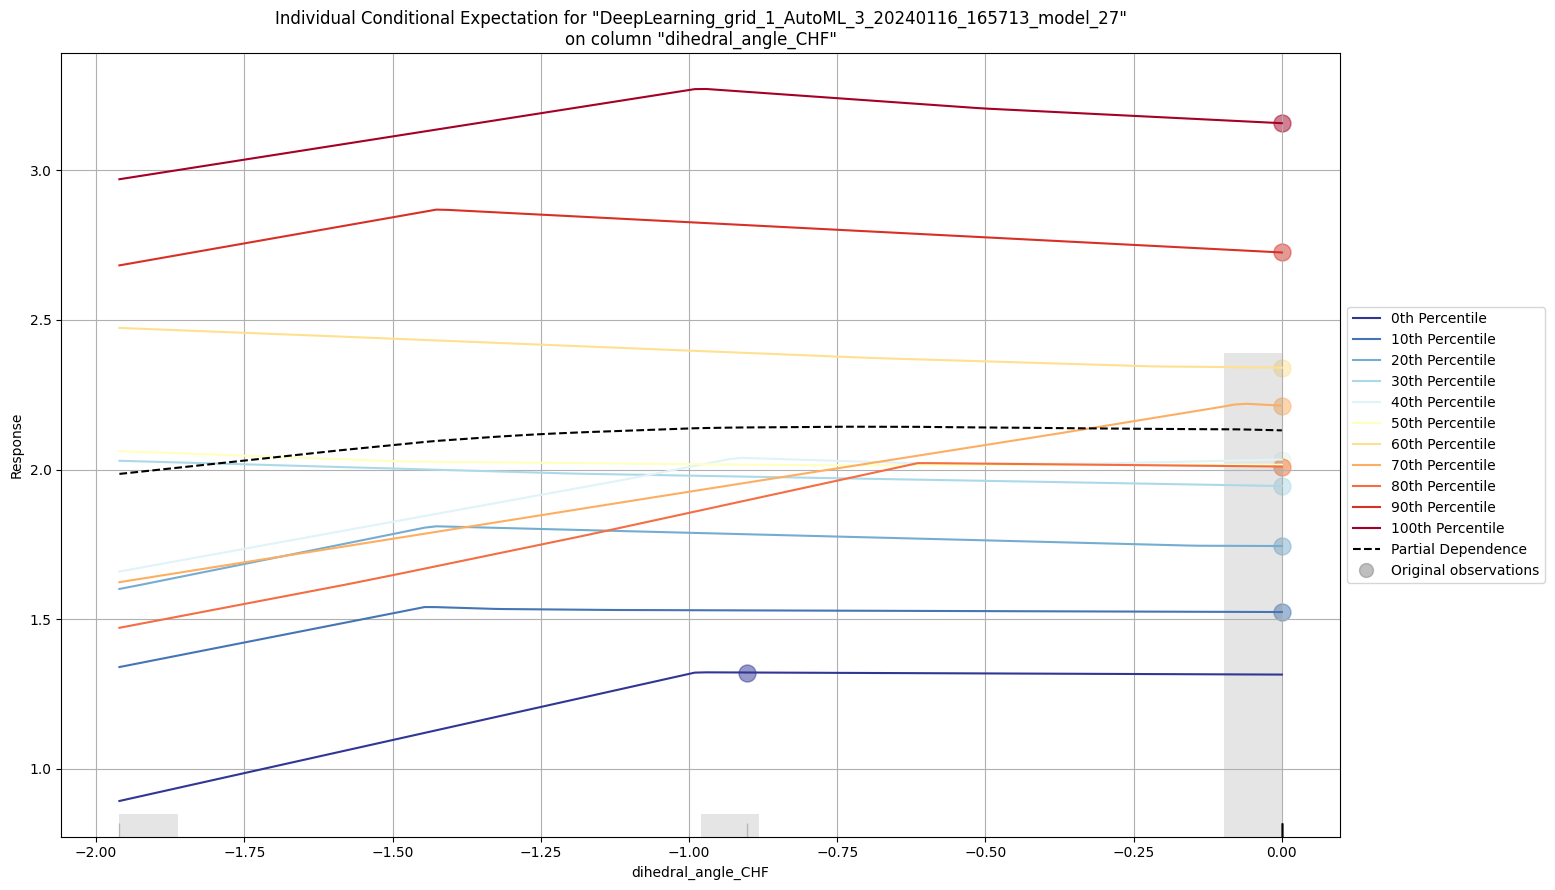

In [21]:
model.explain(test)

In [1]:
model_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\logP\best_model\DeepLearning_grid_1_AutoML_1_20240115_124618_model_44'

model = h2o.load_model(model_path)

train = h2o.import_file(r"C:\work\DrugDiscovery\main_git\XAI_Chem\data\H2O_Auto_ML\train_logP_data.csv")

model.varimp(train)

NameError: name 'h2o' is not defined

In [78]:
model_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\logP\best_model\DeepLearning_grid_1_AutoML_1_20240115_124618_model_44'

model = h2o.load_model(model_path)

test = h2o.import_file(r"C:\work\DrugDiscovery\main_git\XAI_Chem\data\H2O_Auto_ML\test_logP_data.csv")

model.varimp(test)

Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%


variable  relative_importance  scaled_importance  percentage
0                    FPSA3             1.000000           1.000000    0.046246
1          linear_distance             0.791411           0.791411    0.036600
2               mol_volume             0.772819           0.772819    0.035740
3                  nAHRing             0.753210           0.753210    0.034833
4                       nO             0.737517           0.737517    0.034107
5                   nHRing             0.731006           0.731006    0.033806
6                       nC             0.725106           0.725106    0.033533
7           amount_of_CH2F             0.721112           0.721112    0.033349
8                     TASA             0.674675           0.674675    0.031201
9                  f_to_fg             0.669465           0.669465    0.030960
10           dipole_moment             0.598722           0.598722    0.027689
11      avg_atoms_in_cycle             0.585428           0.585428    0.027074
12  dihedral_angle_-C(=O)O             0.515164           0.515164    0.023824
13           amount_of_CF3             0.510942           0.510942    0.023629
14       amount_of_gem-CF2             0.505361           0.505361    0.023371
15                     PBF             0.481158           0.481158    0.022252
16     dihedral_angle_CH2F             0.477457           0.477457    0.022081
17            amount_of_=O             0.447760           0.447760    0.020707
18                 nFHRing             0.421050           0.421050    0.019472
19                nFAHRing             0.418865           0.418865    0.019371
20       dihedral_angle_-N             0.416423           0.416423    0.019258
21                  nARing             0.416325           0.416325    0.019253
22                  tpsa+f             0.405522           0.405522    0.018754
23                      nN             0.404515           0.404515    0.018707
24                      C1             0.403466           0.403466    0.018659
25            amount_of_-O             0.398632           0.398632    0.018435
26            amount_of_-N             0.388143           0.388143    0.017950
27                  nFRing             0.381829           0.381829    0.017658
28                   PPSA5             0.378630           0.378630    0.017510
29               chirality             0.373774           0.373774    0.017286
30          mol_num_cycles             0.367452           0.367452    0.016993
31          amount_of_CHF2             0.366271           0.366271    0.016939
32       amount_of_-C(=O)O             0.359758           0.359758    0.016637
33               cis/trans             0.354726           0.354726    0.016405
34       dihedral_angle_-O             0.350702           0.350702    0.016219
35          GeomShapeIndex             0.347228           0.347228    0.016058
36  dihedral_angle_gem-CF2             0.344739           0.344739    0.015943
37                   PNSA5             0.331513           0.331513    0.015331
38     dihedral_angle_CHF2             0.327913           0.327913    0.015165
39           amount_of_CHF             0.322241           0.322241    0.014902
40               f_freedom             0.314497           0.314497    0.014544
41                    RPCS             0.313059           0.313059    0.014478
42                 nFARing             0.310755           0.310755    0.014371
43      dihedral_angle_CF3             0.277746           0.277746    0.012845
44         f_atom_fraction             0.216287           0.216287    0.010002
45      dihedral_angle_CHF             0.213074           0.213074    0.009854

In [76]:
model_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\logP\best_model\DeepLearning_grid_1_AutoML_1_20240115_124618_model_44'

model = h2o.load_model(model_path)

model.varimp(train)

variable  relative_importance  scaled_importance  percentage
0                    FPSA3             1.000000           1.000000    0.046246
1          linear_distance             0.791411           0.791411    0.036600
2               mol_volume             0.772819           0.772819    0.035740
3                  nAHRing             0.753210           0.753210    0.034833
4                       nO             0.737517           0.737517    0.034107
5                   nHRing             0.731006           0.731006    0.033806
6                       nC             0.725106           0.725106    0.033533
7           amount_of_CH2F             0.721112           0.721112    0.033349
8                     TASA             0.674675           0.674675    0.031201
9                  f_to_fg             0.669465           0.669465    0.030960
10           dipole_moment             0.598722           0.598722    0.027689
11      avg_atoms_in_cycle             0.585428           0.585428    0.027074
12  dihedral_angle_-C(=O)O             0.515164           0.515164    0.023824
13           amount_of_CF3             0.510942           0.510942    0.023629
14       amount_of_gem-CF2             0.505361           0.505361    0.023371
15                     PBF             0.481158           0.481158    0.022252
16     dihedral_angle_CH2F             0.477457           0.477457    0.022081
17            amount_of_=O             0.447760           0.447760    0.020707
18                 nFHRing             0.421050           0.421050    0.019472
19                nFAHRing             0.418865           0.418865    0.019371
20       dihedral_angle_-N             0.416423           0.416423    0.019258
21                  nARing             0.416325           0.416325    0.019253
22                  tpsa+f             0.405522           0.405522    0.018754
23                      nN             0.404515           0.404515    0.018707
24                      C1             0.403466           0.403466    0.018659
25            amount_of_-O             0.398632           0.398632    0.018435
26            amount_of_-N             0.388143           0.388143    0.017950
27                  nFRing             0.381829           0.381829    0.017658
28                   PPSA5             0.378630           0.378630    0.017510
29               chirality             0.373774           0.373774    0.017286
30          mol_num_cycles             0.367452           0.367452    0.016993
31          amount_of_CHF2             0.366271           0.366271    0.016939
32       amount_of_-C(=O)O             0.359758           0.359758    0.016637
33               cis/trans             0.354726           0.354726    0.016405
34       dihedral_angle_-O             0.350702           0.350702    0.016219
35          GeomShapeIndex             0.347228           0.347228    0.016058
36  dihedral_angle_gem-CF2             0.344739           0.344739    0.015943
37                   PNSA5             0.331513           0.331513    0.015331
38     dihedral_angle_CHF2             0.327913           0.327913    0.015165
39           amount_of_CHF             0.322241           0.322241    0.014902
40               f_freedom             0.314497           0.314497    0.014544
41                    RPCS             0.313059           0.313059    0.014478
42                 nFARing             0.310755           0.310755    0.014371
43      dihedral_angle_CF3             0.277746           0.277746    0.012845
44         f_atom_fraction             0.216287           0.216287    0.010002
45      dihedral_angle_CHF             0.213074           0.213074    0.009854

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

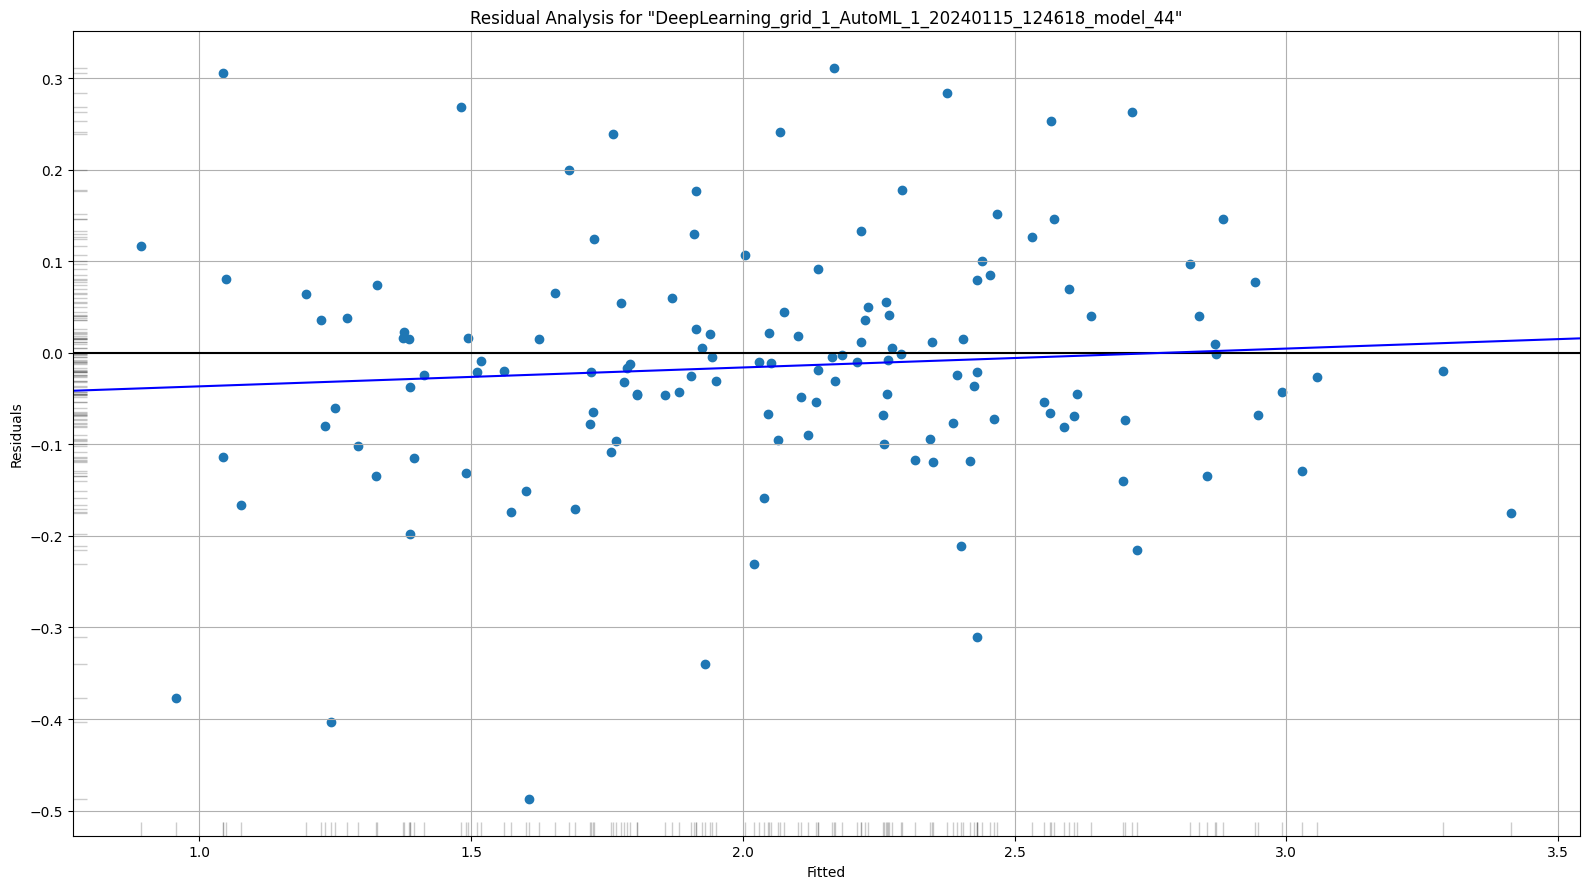

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

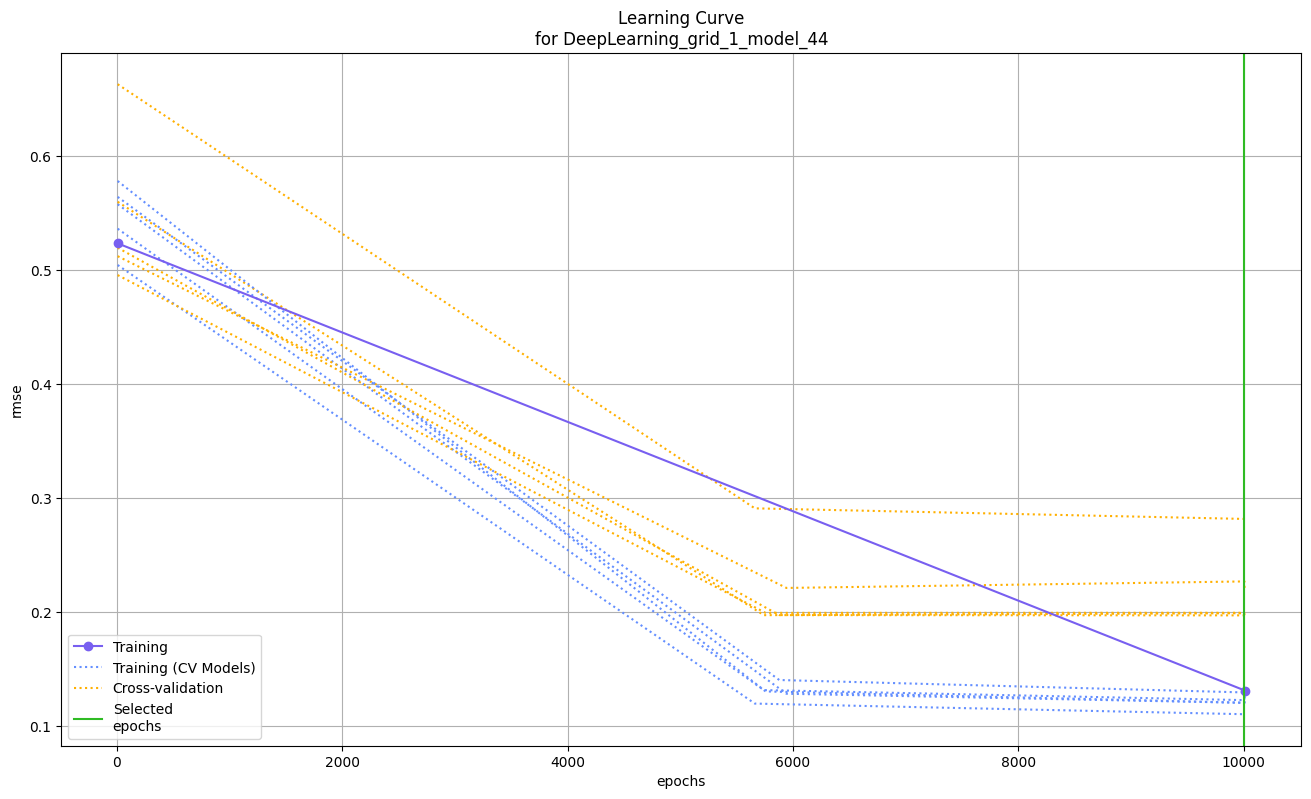

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

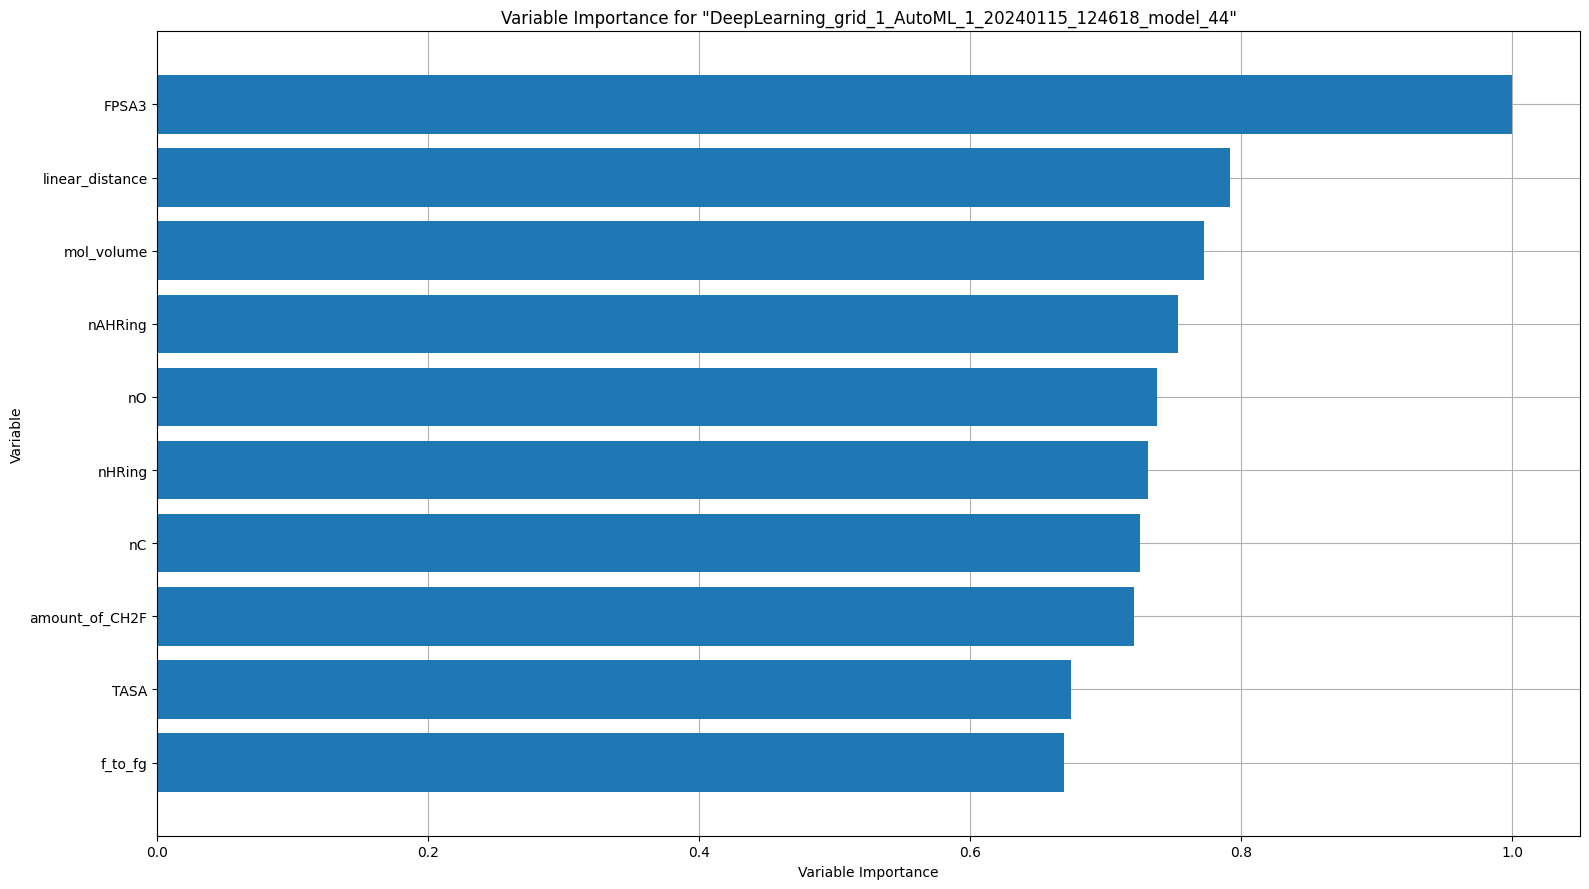

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

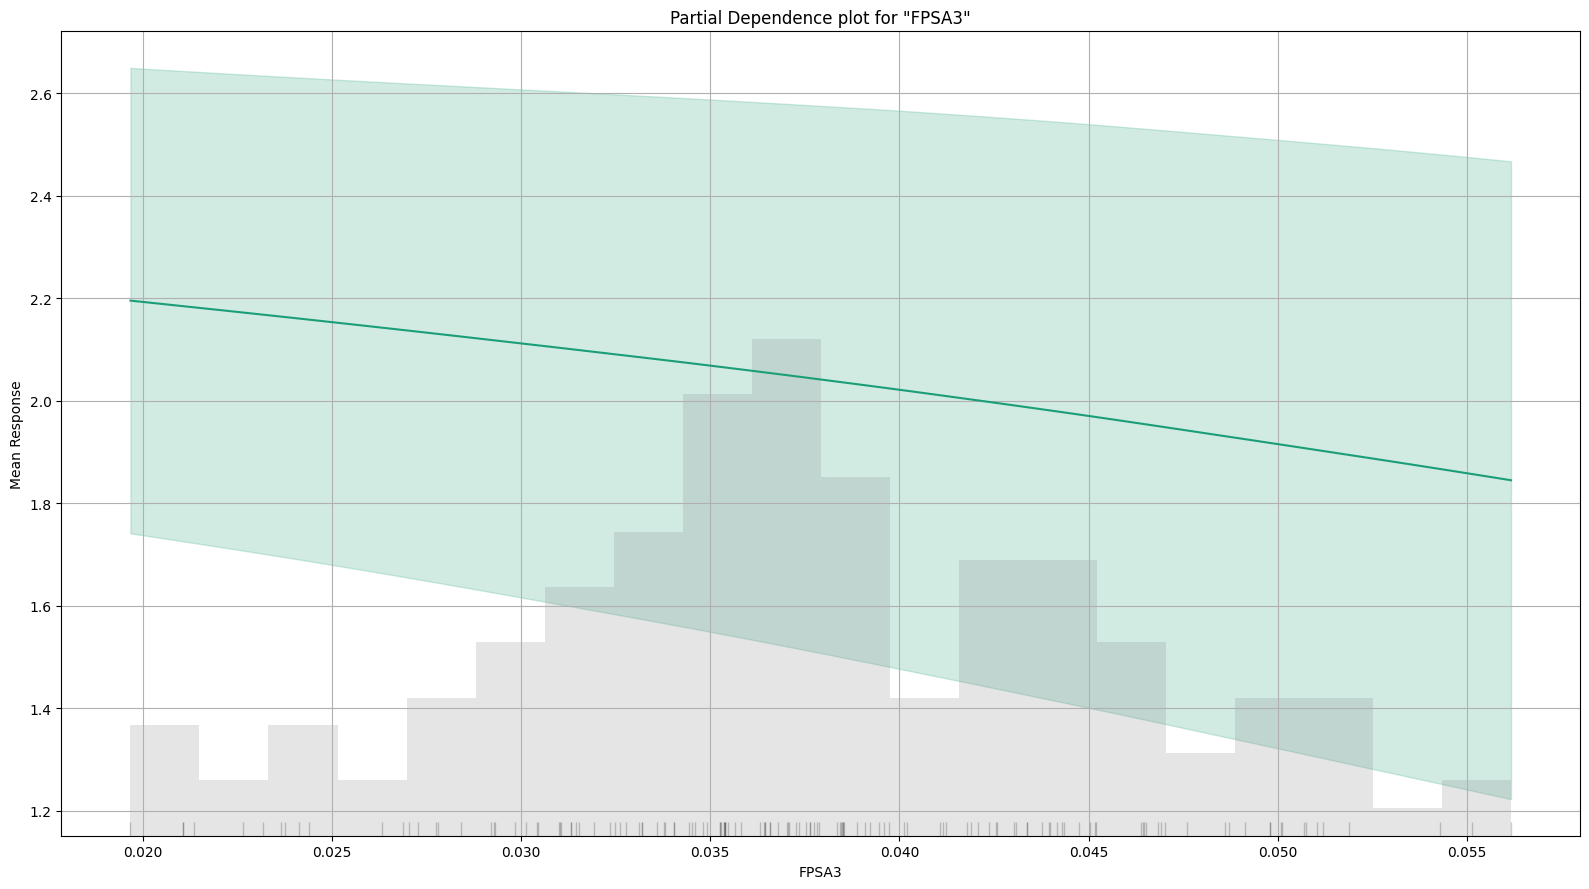

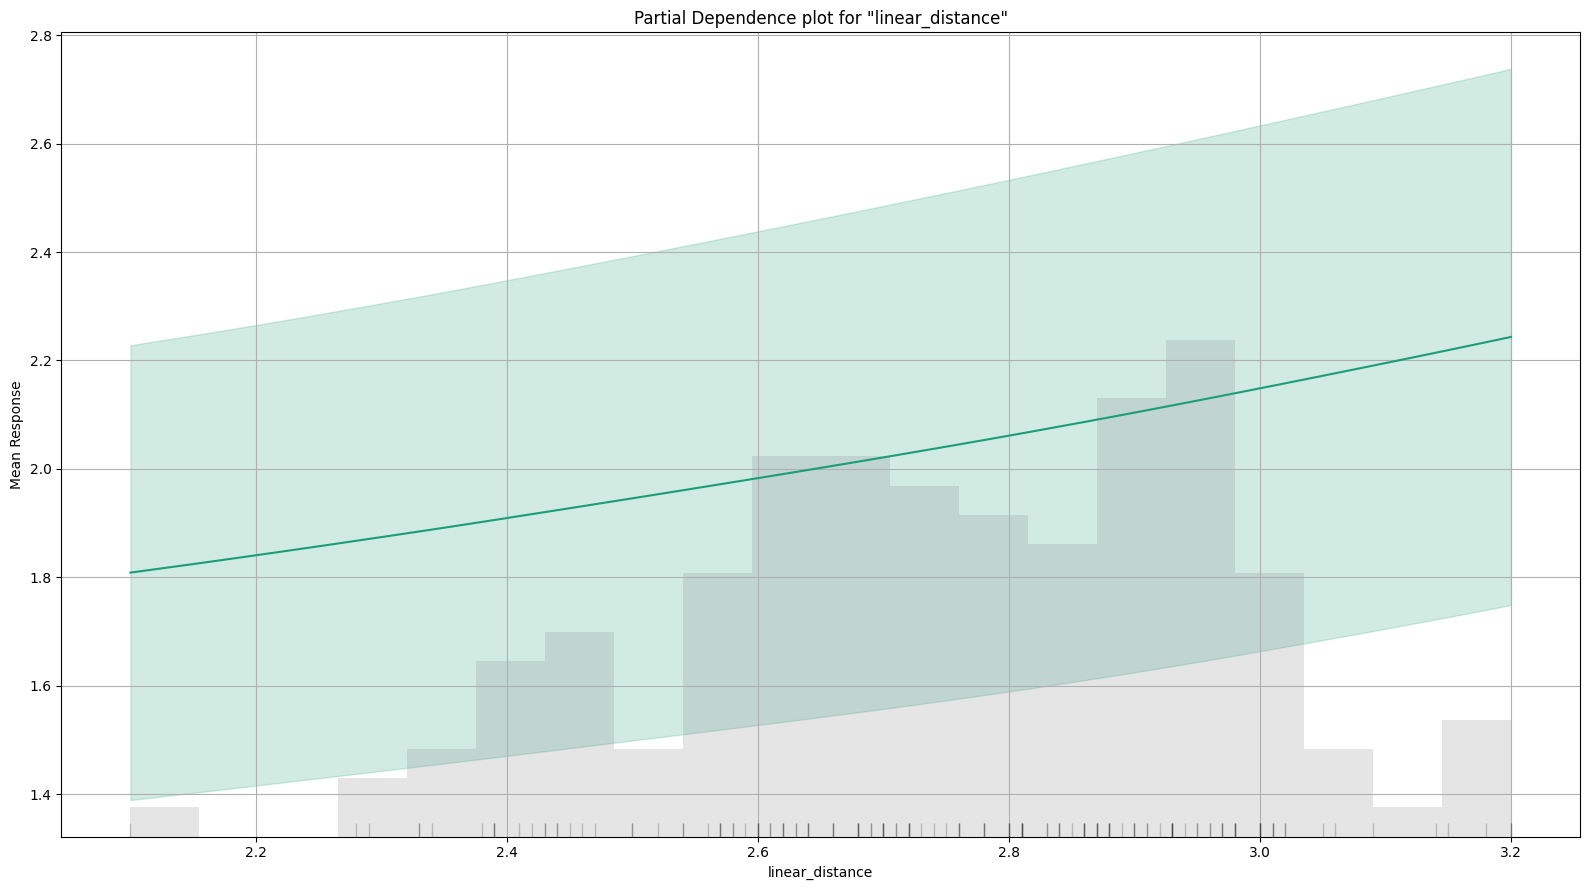

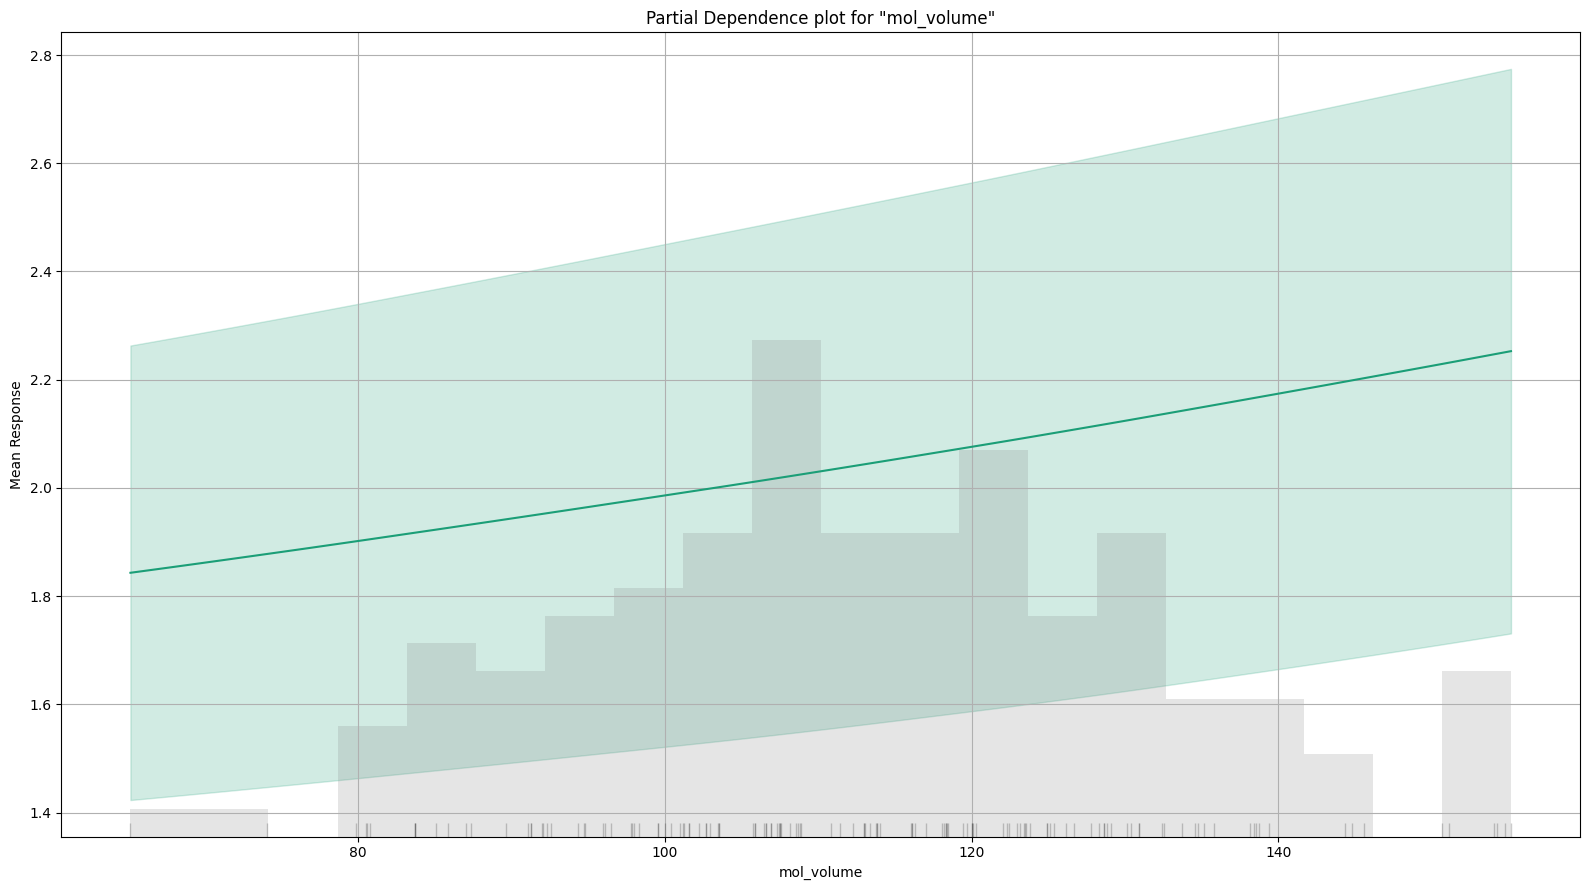

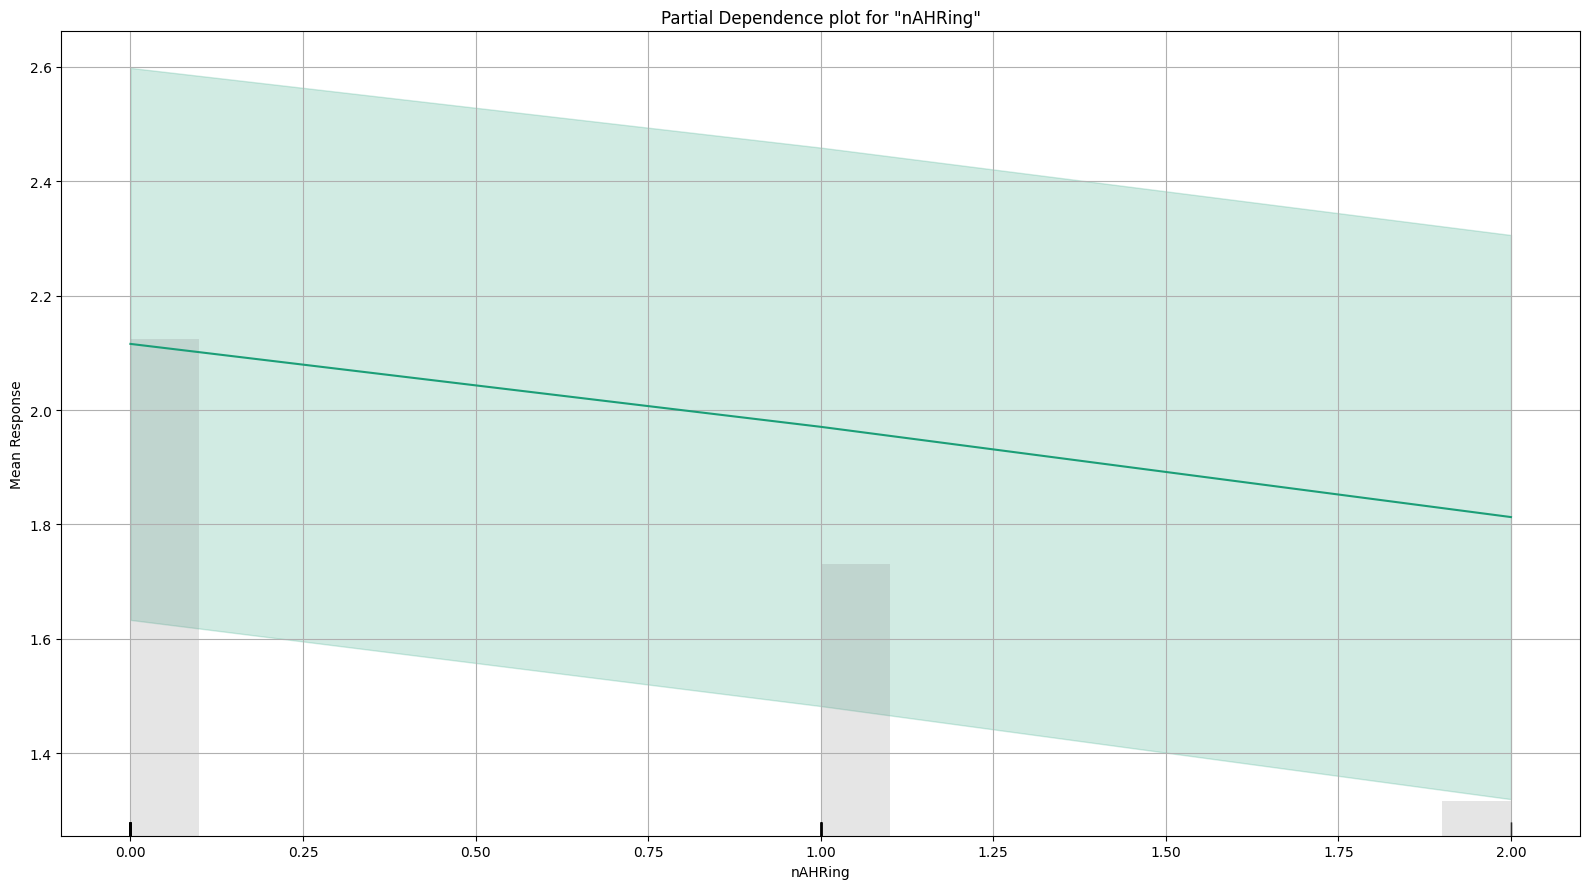

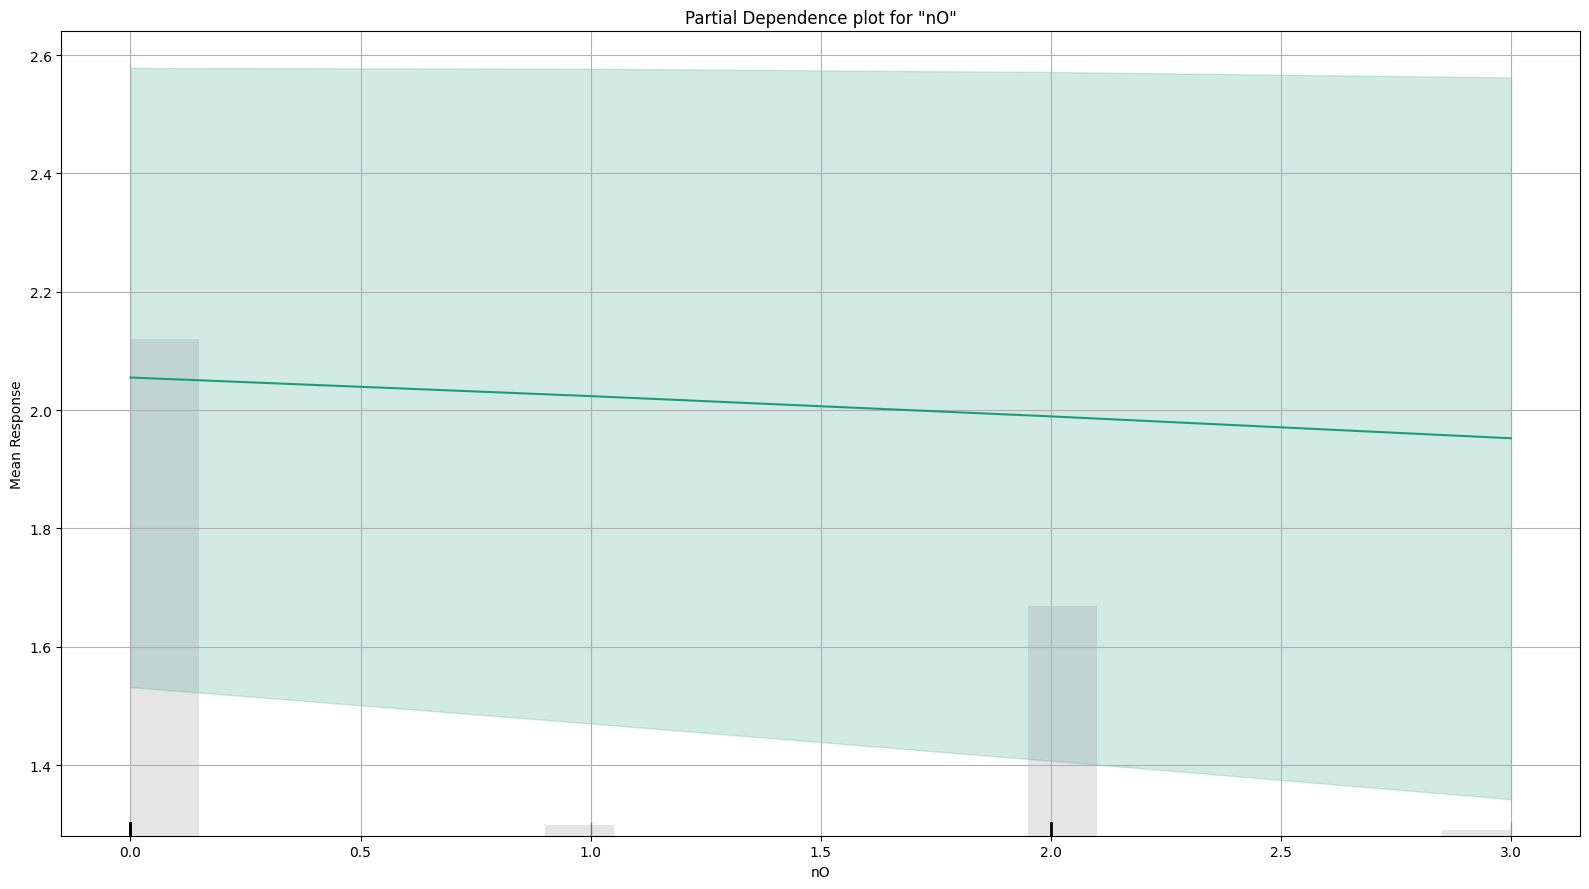

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

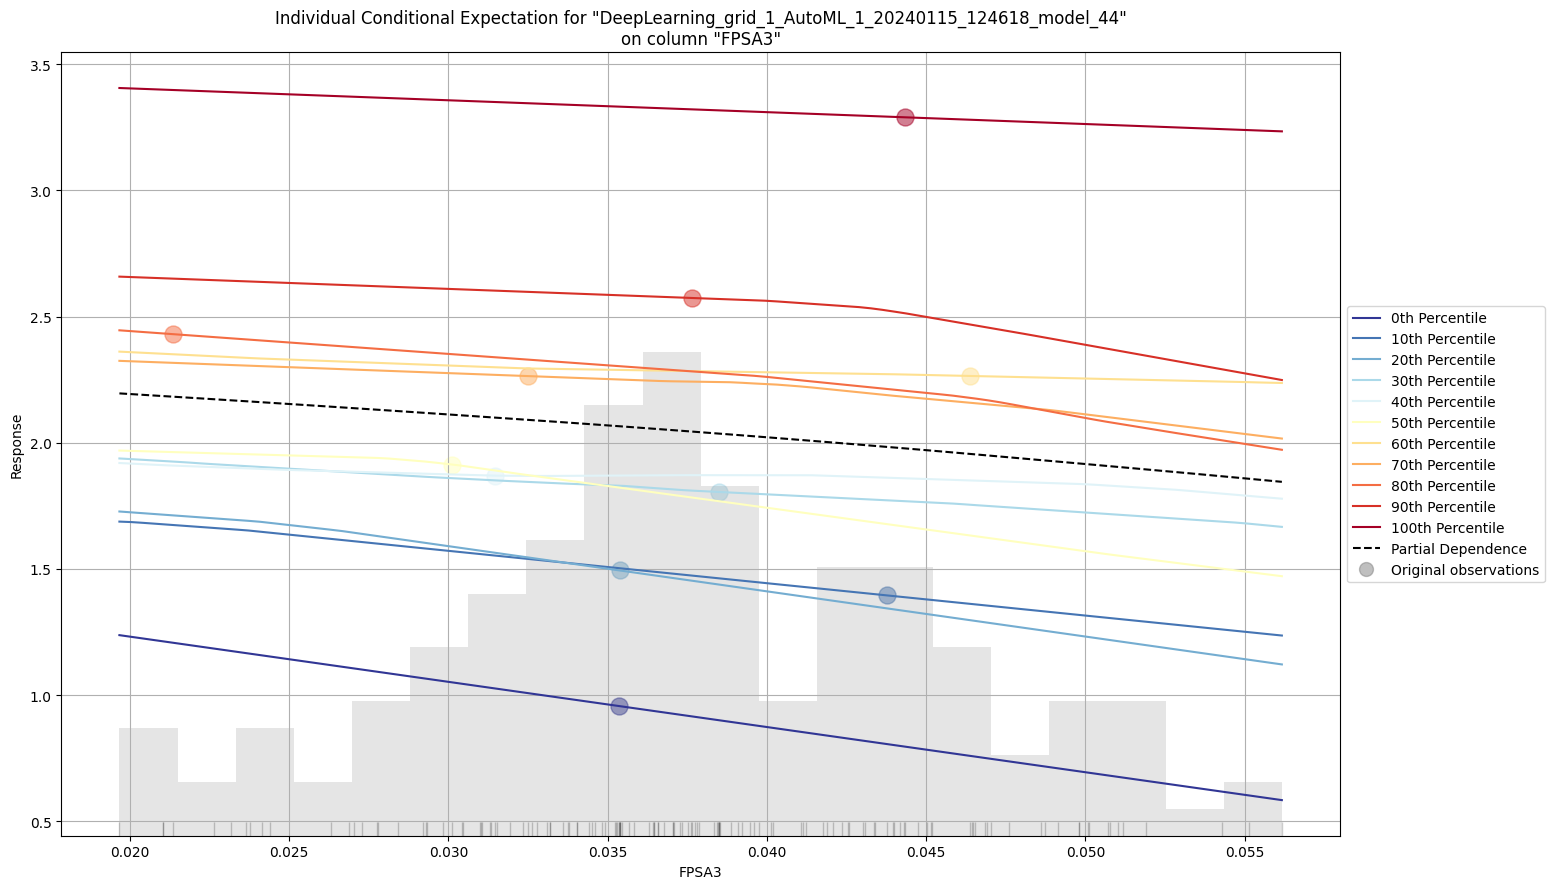

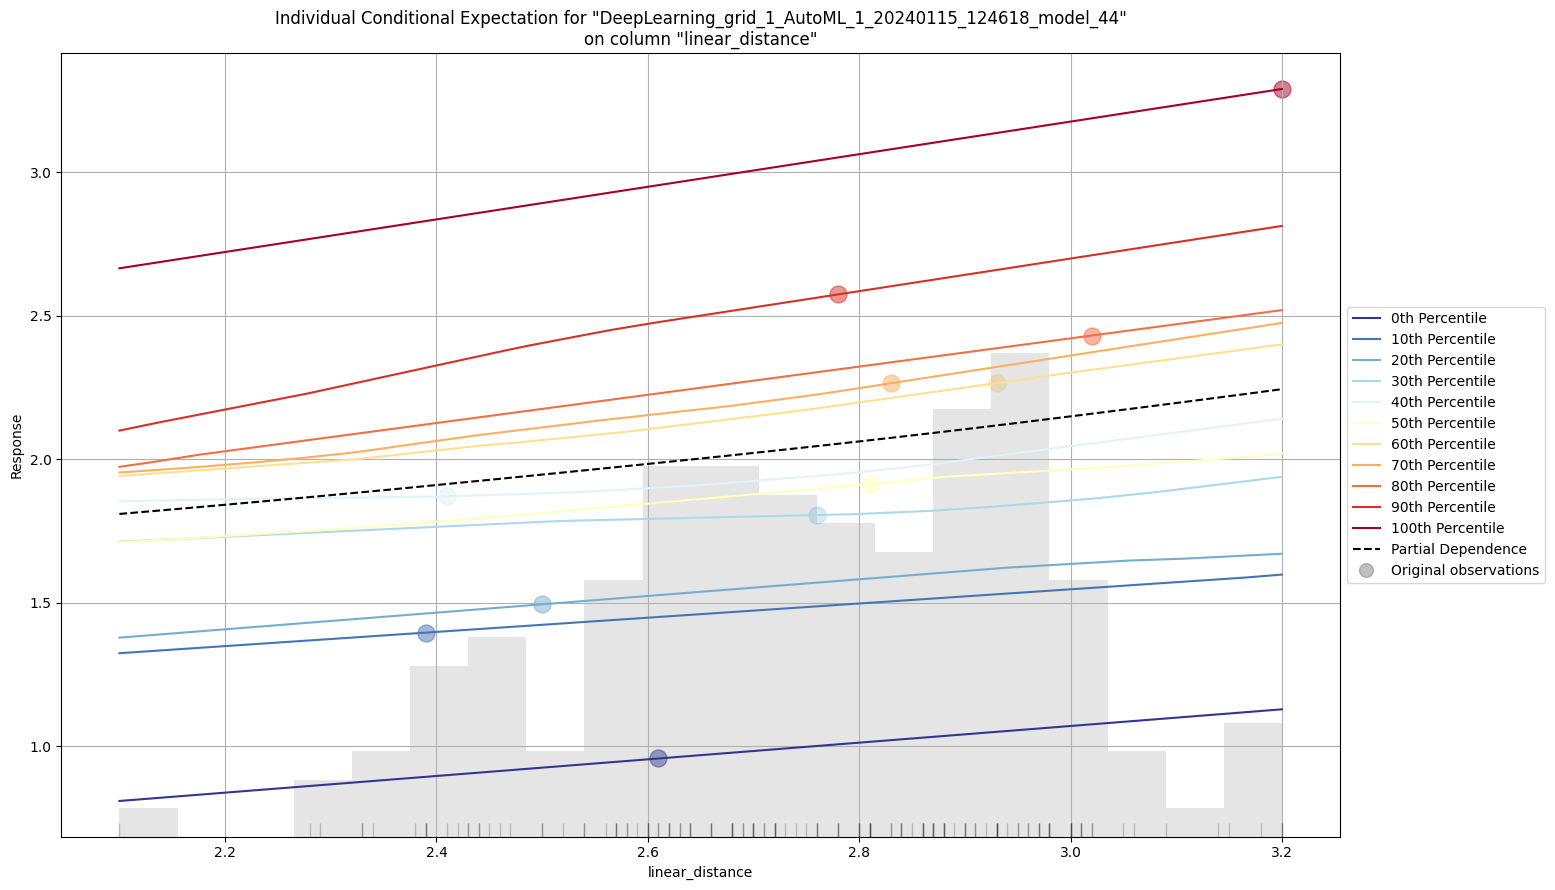

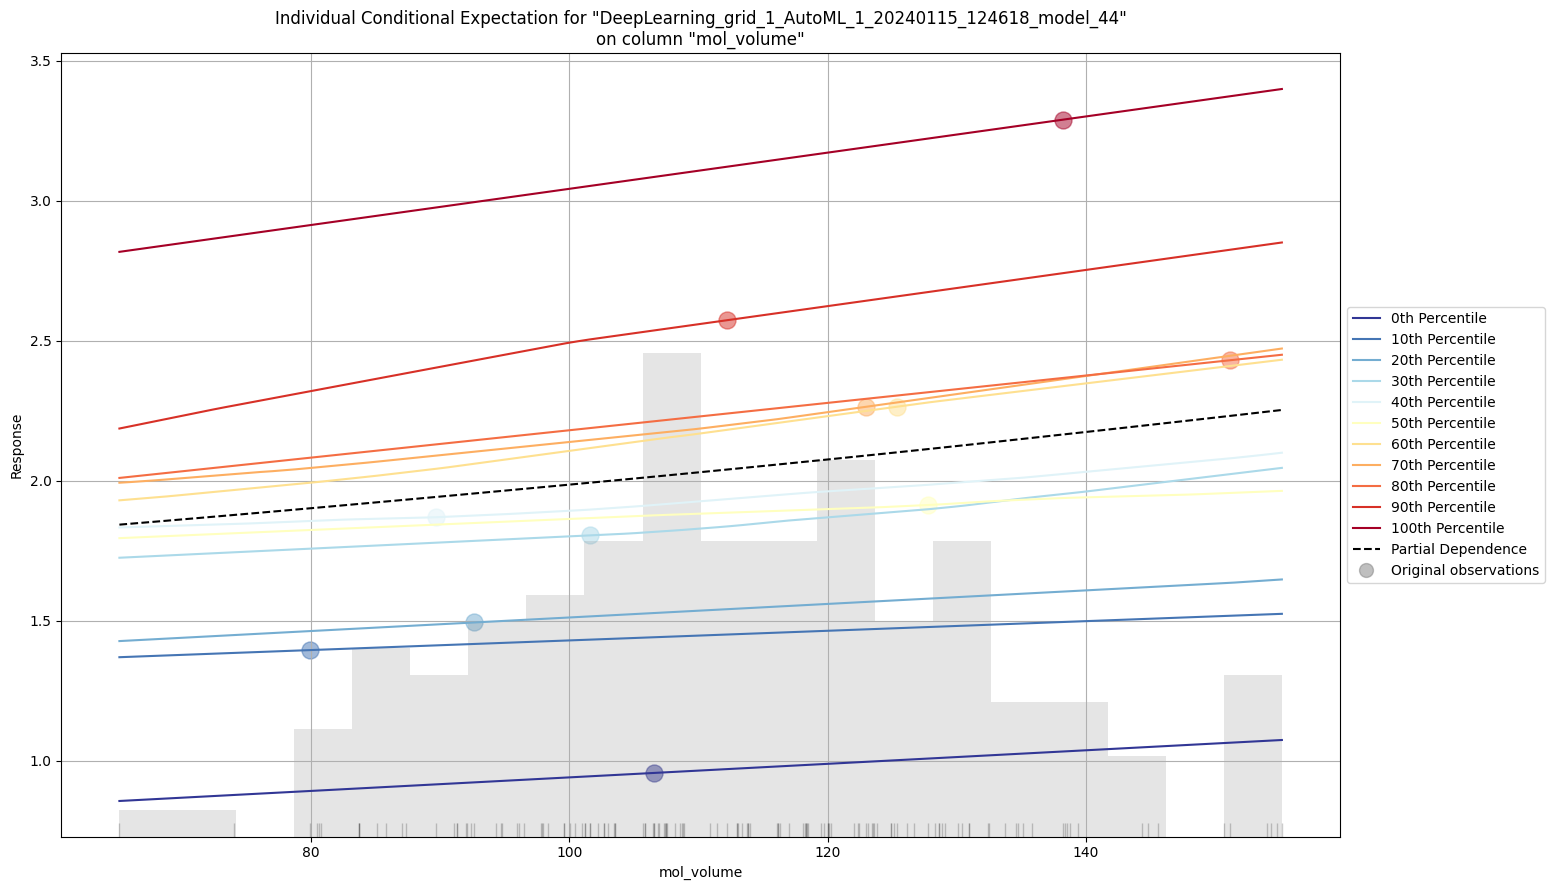

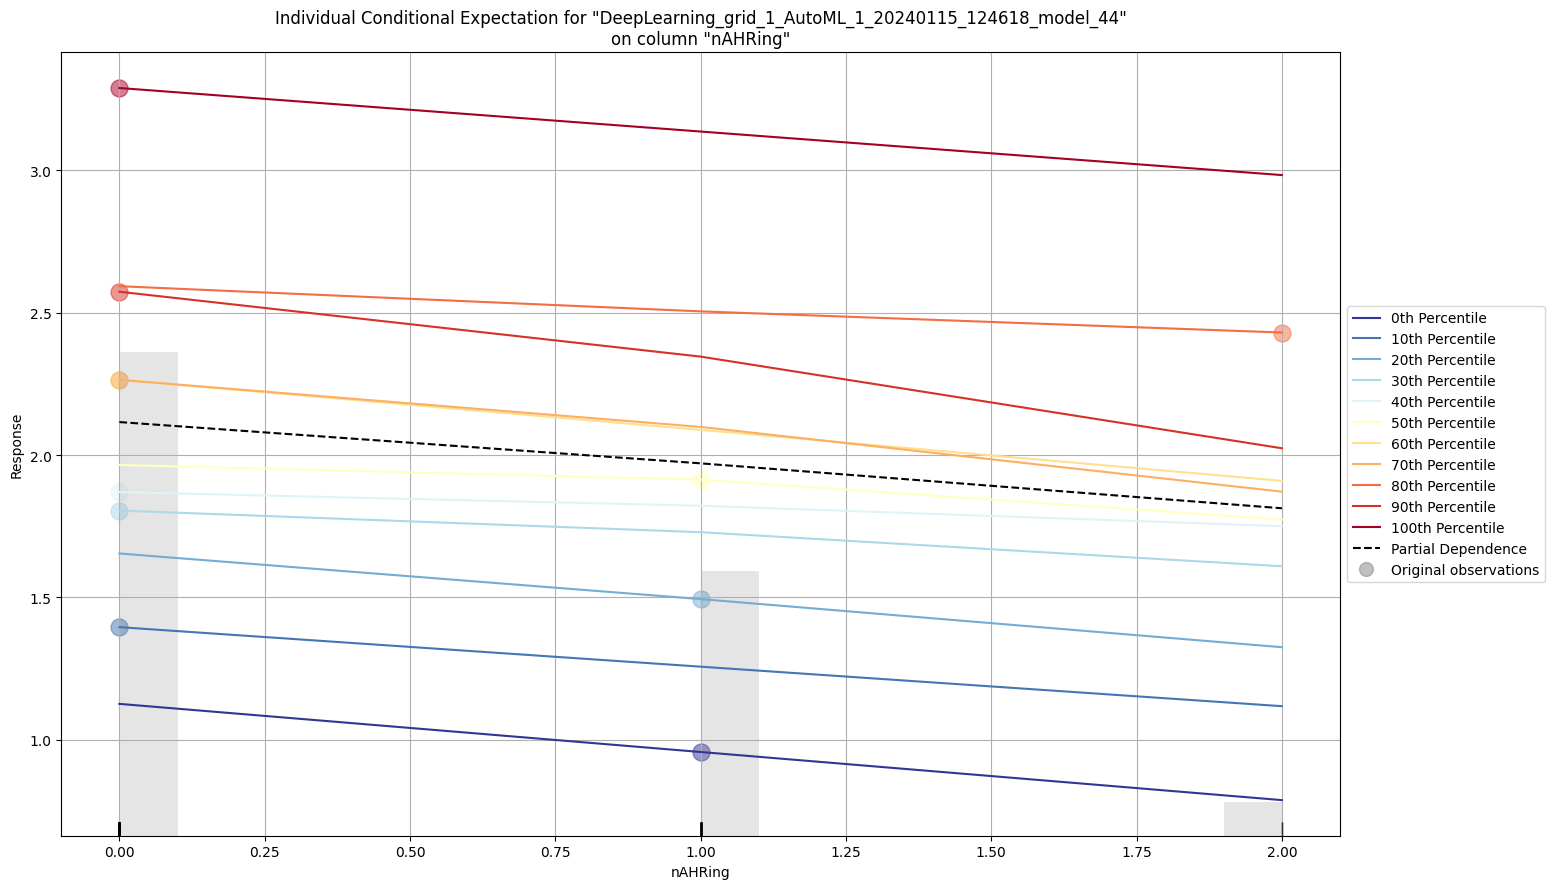

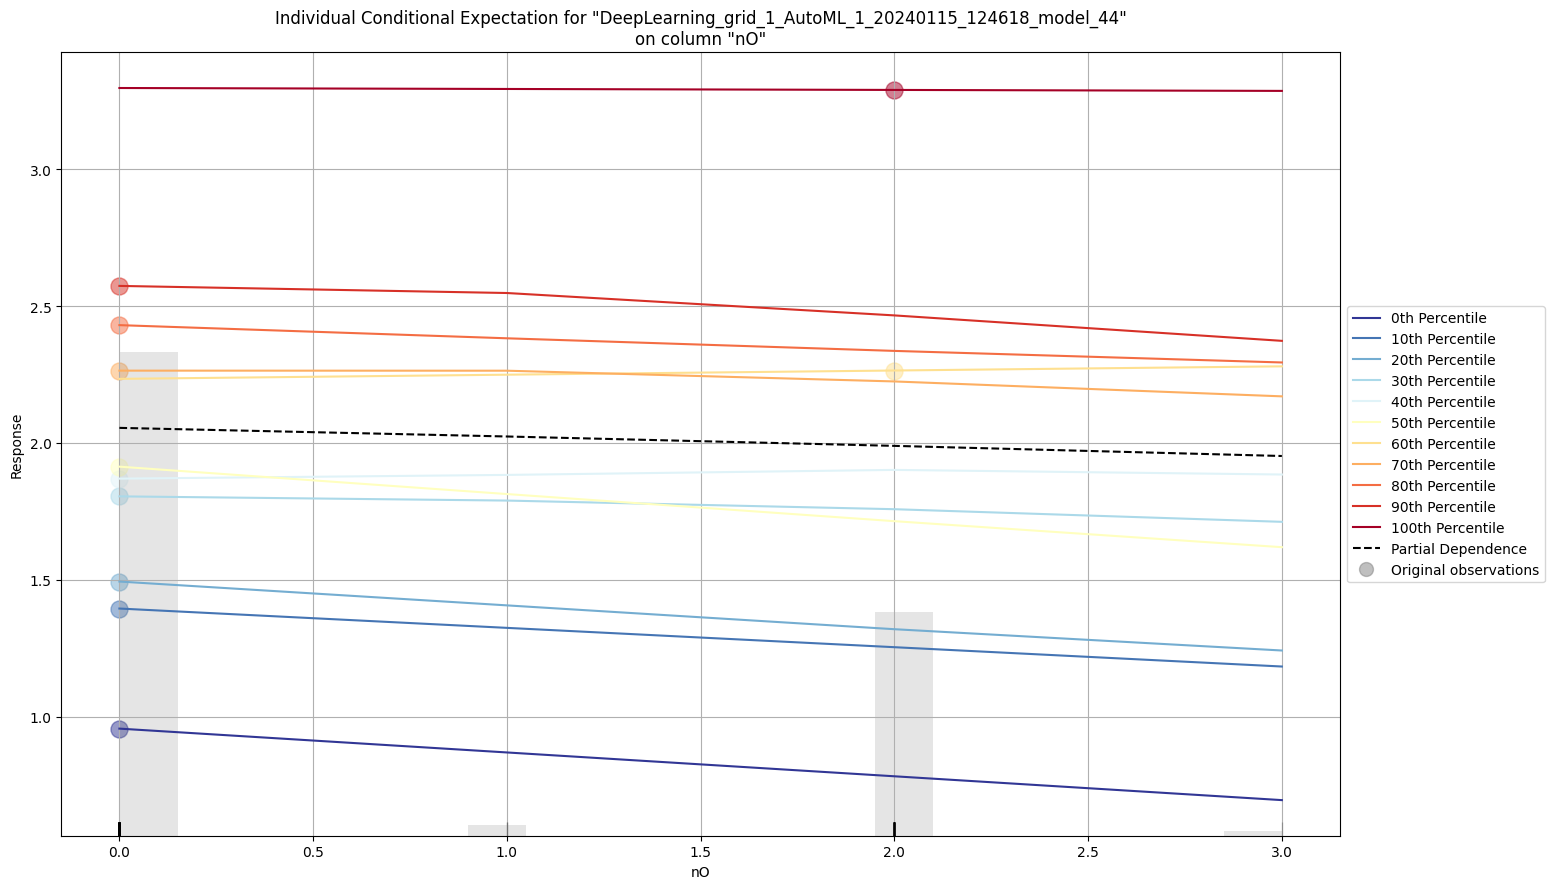

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

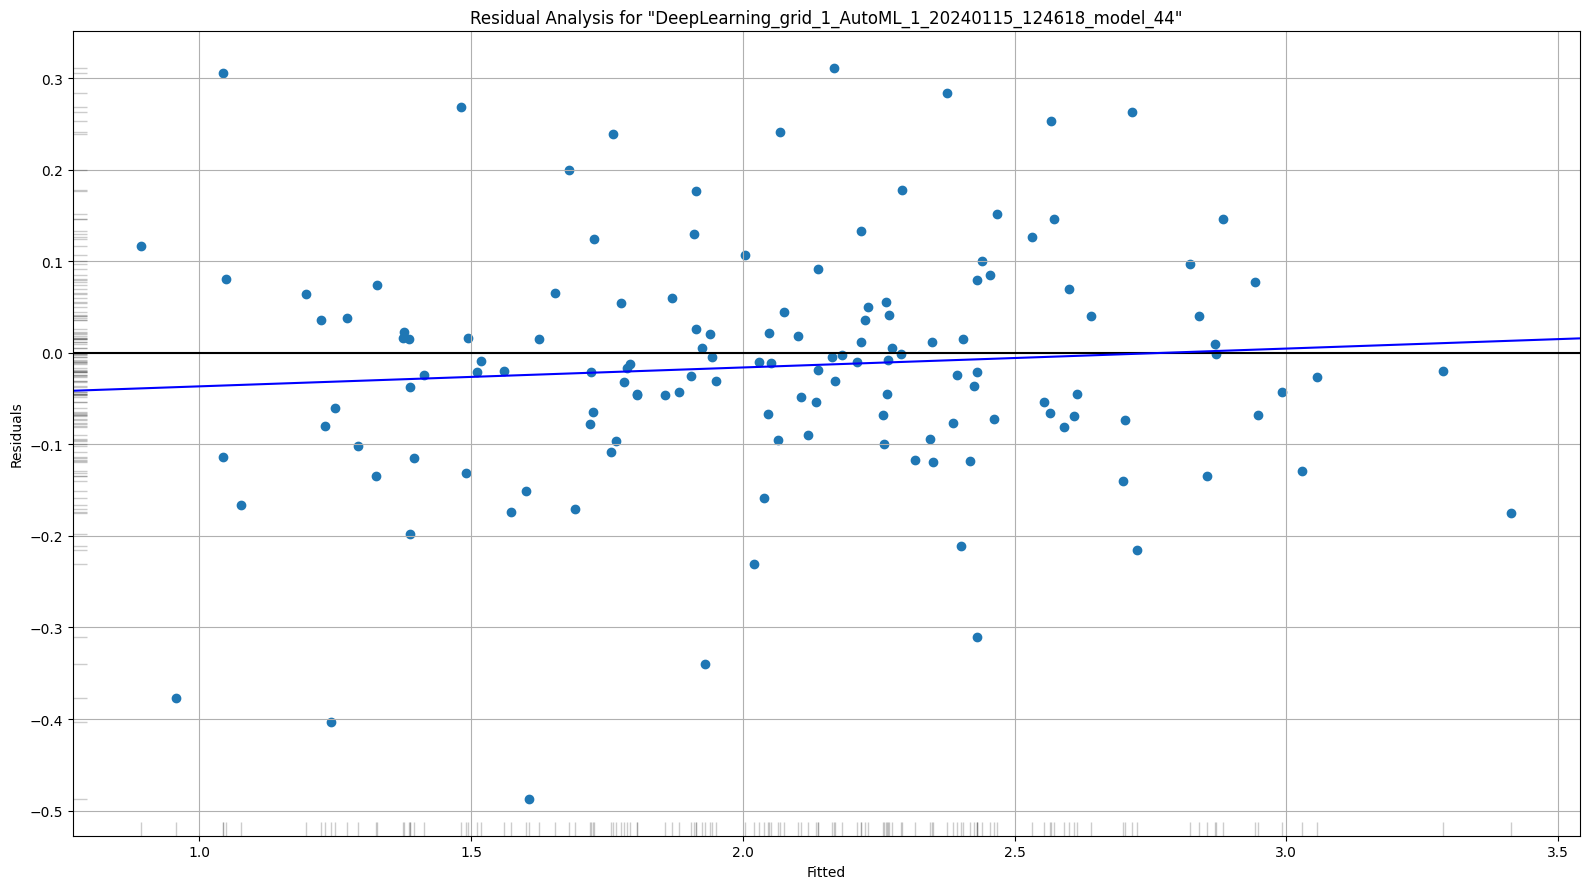

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

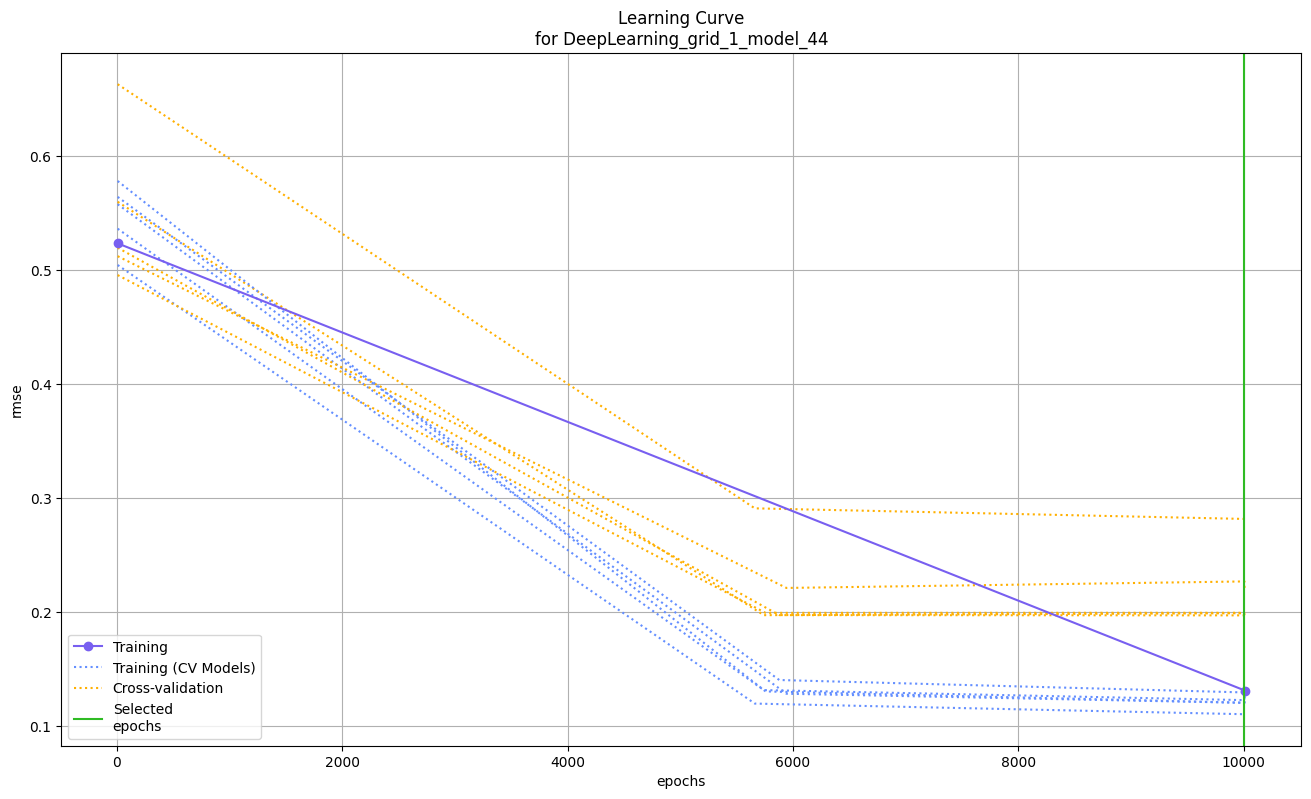

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

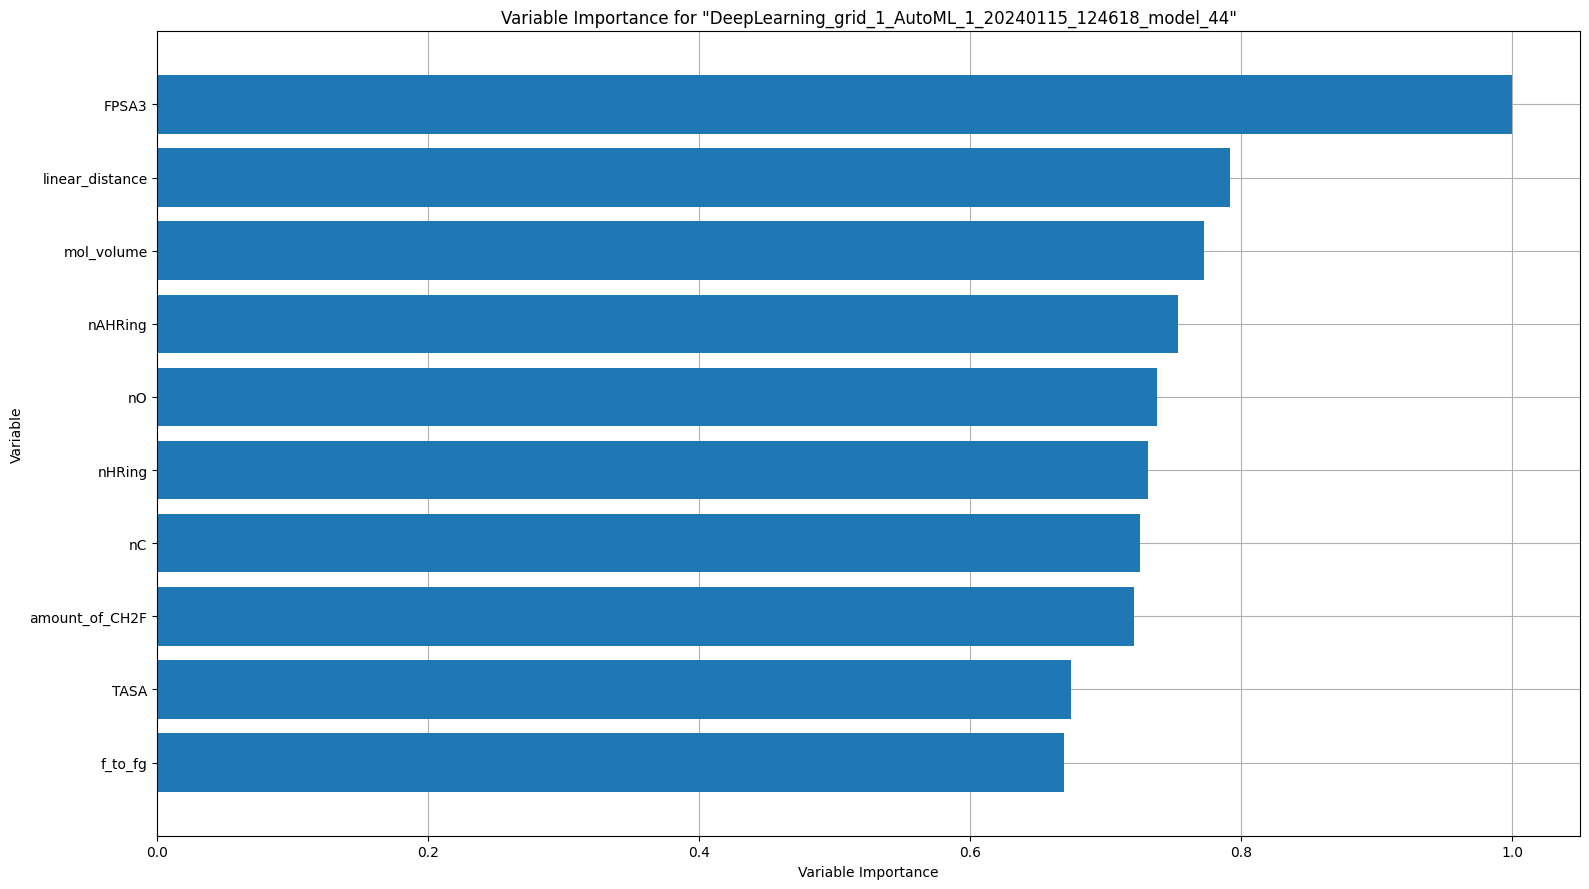

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

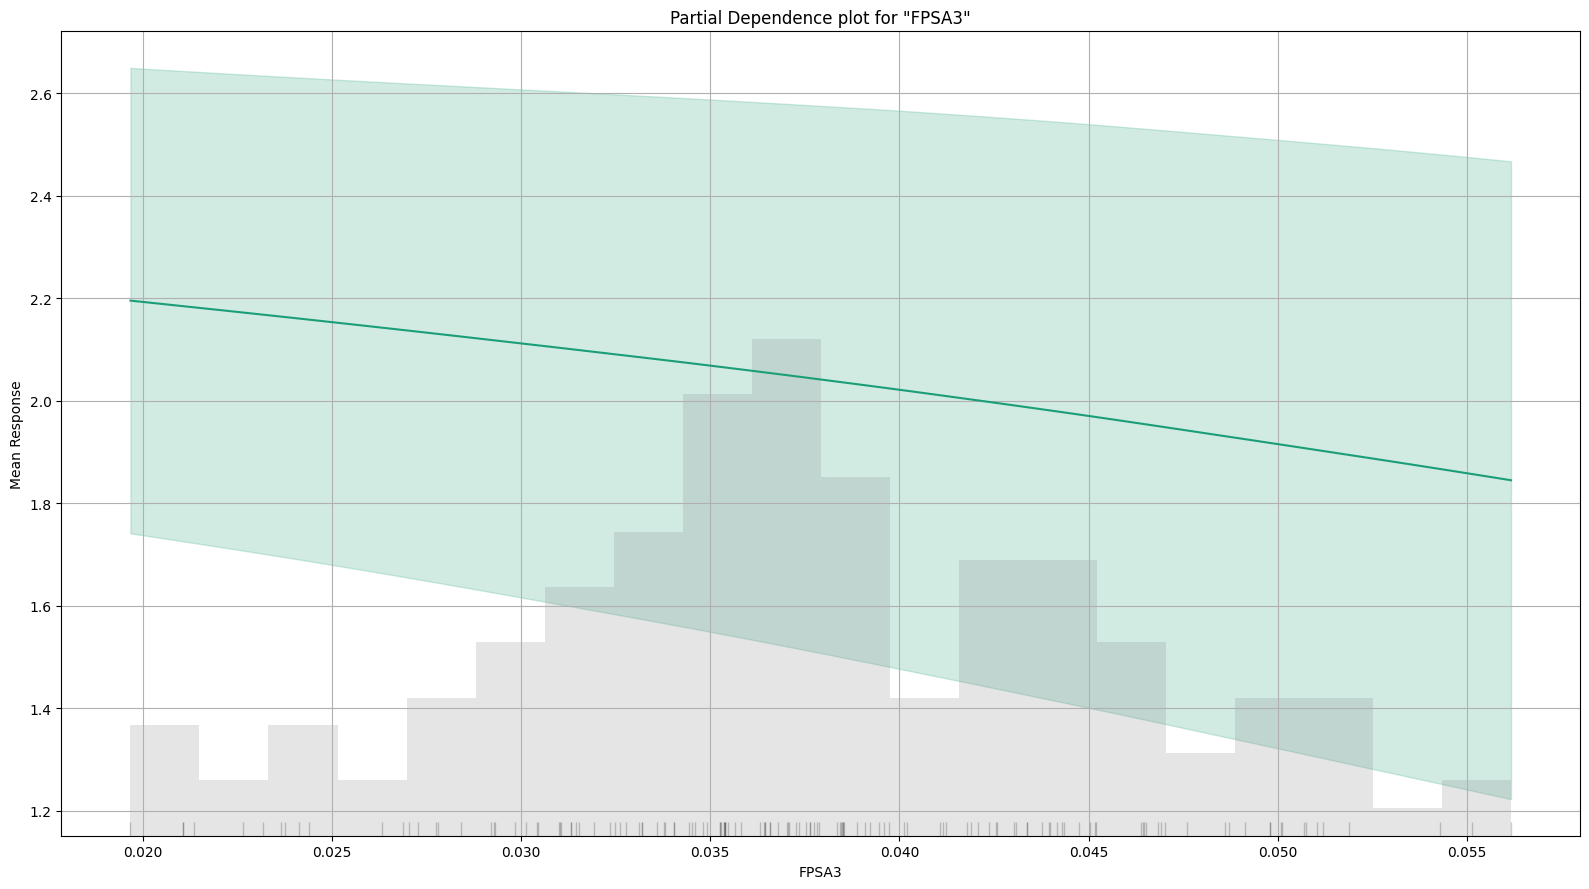

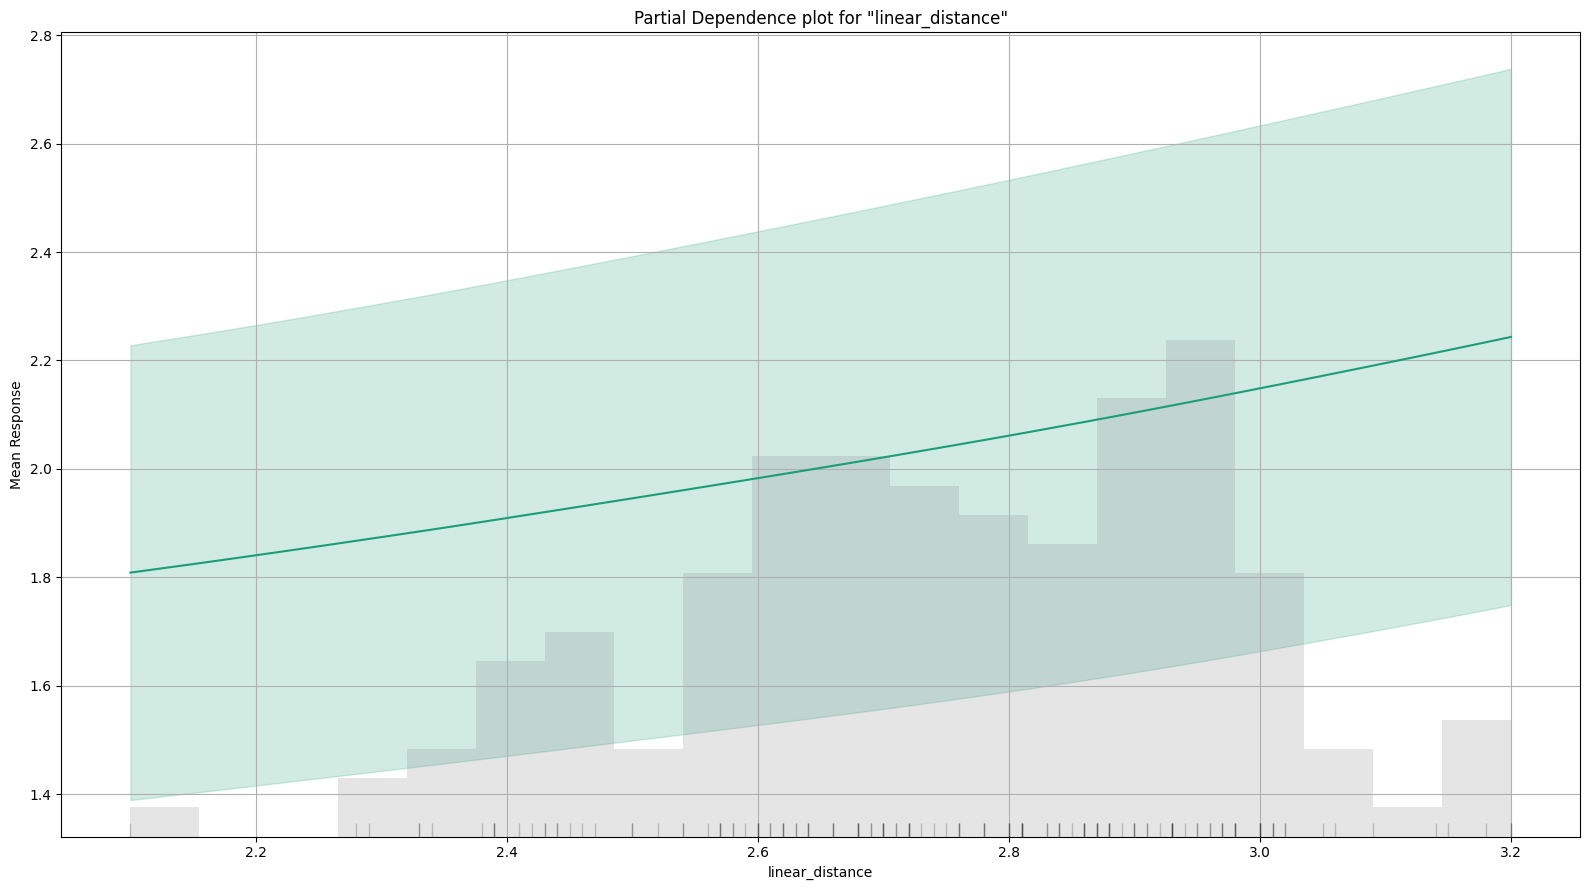

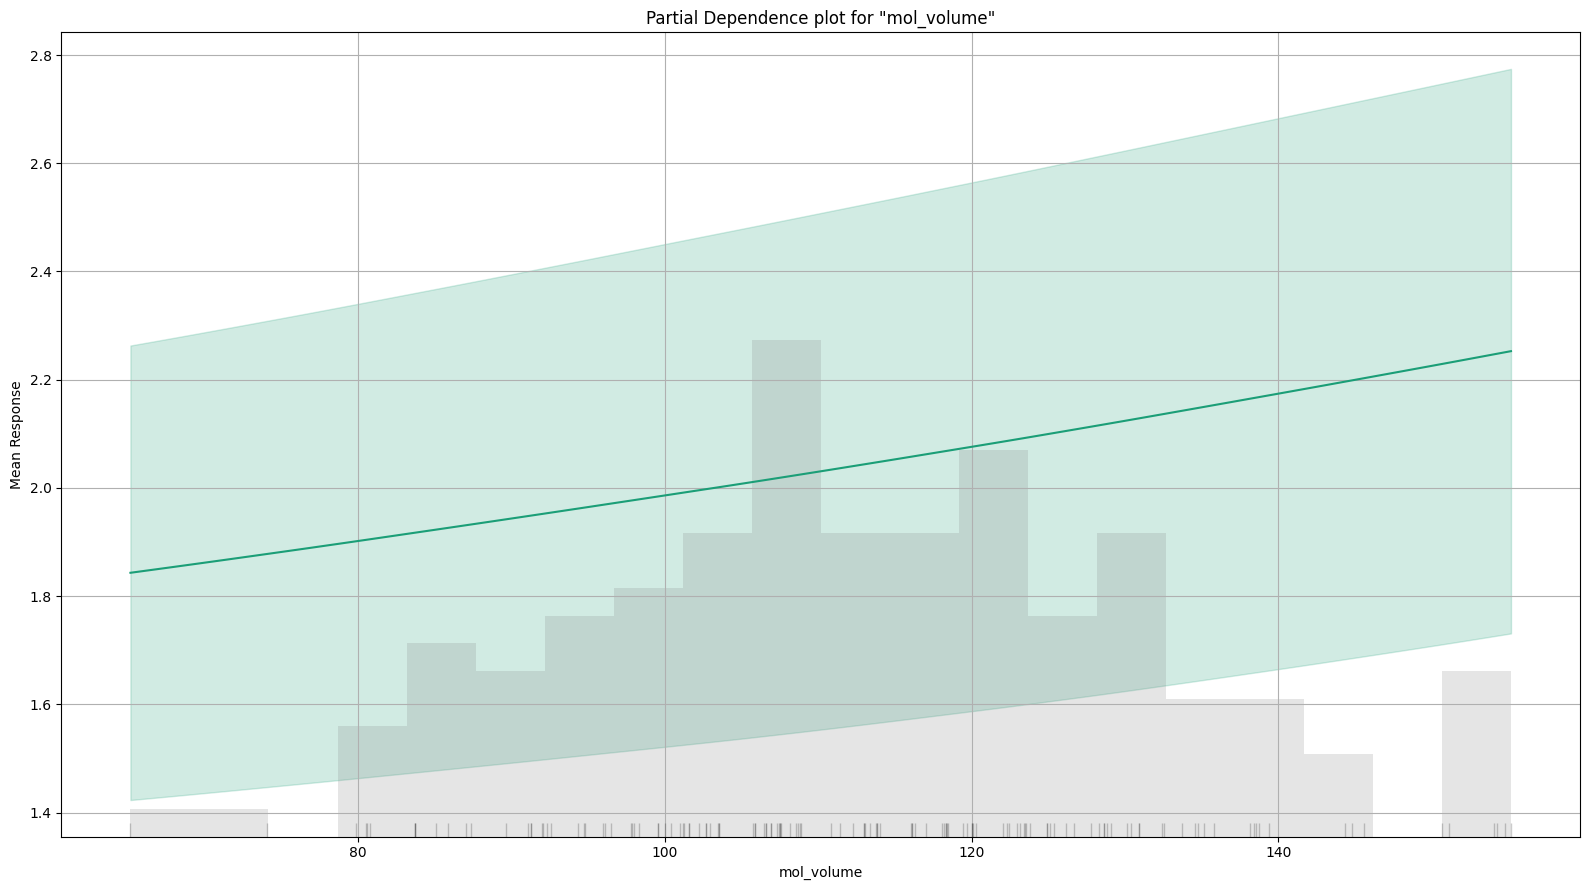

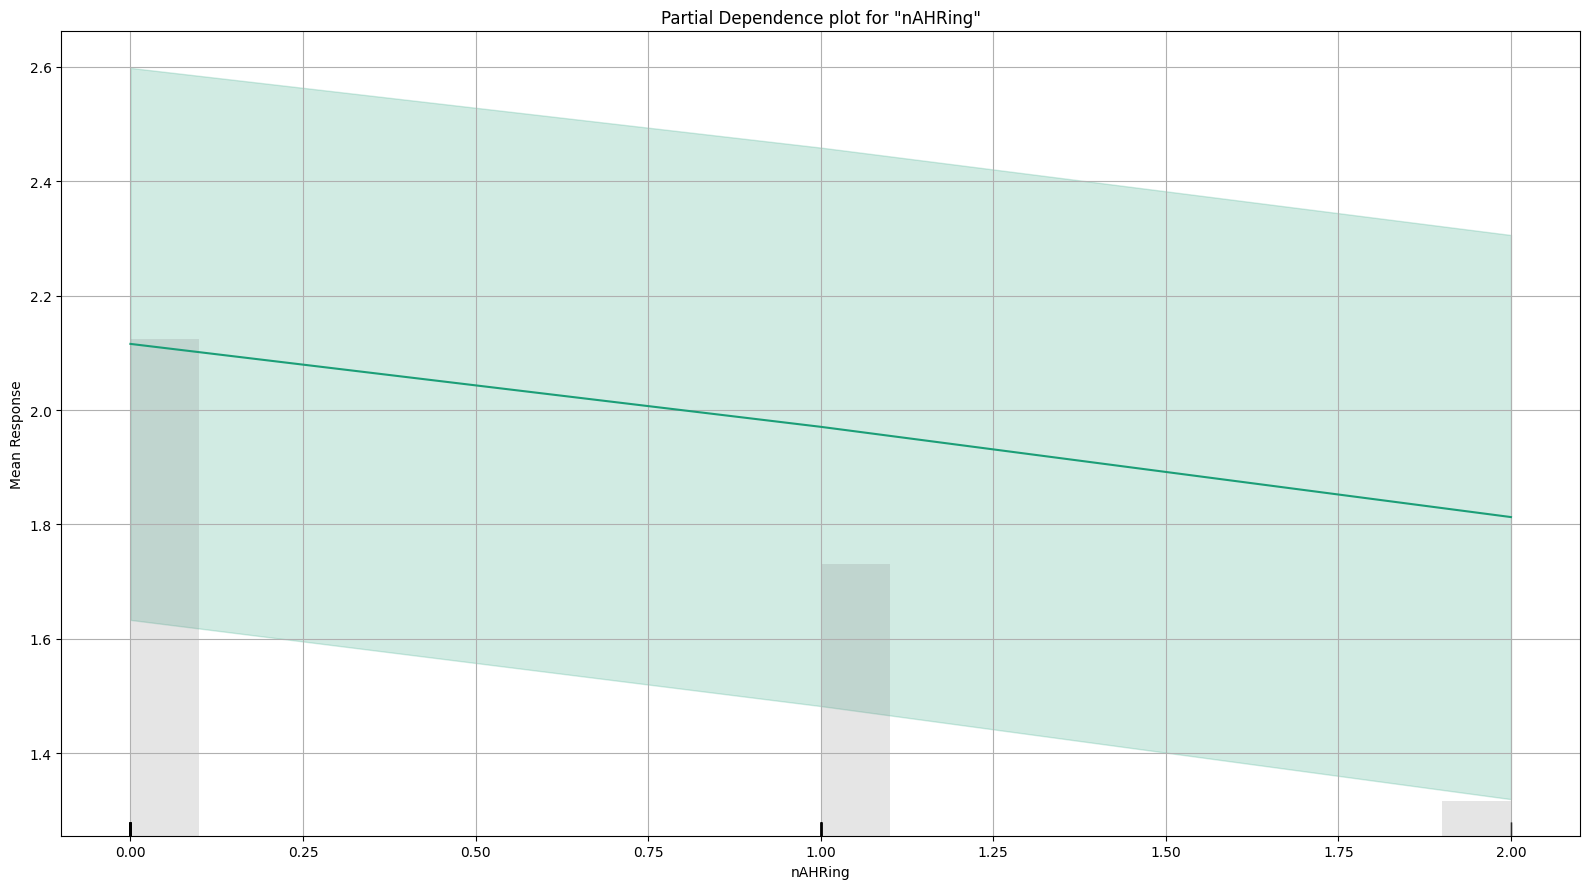

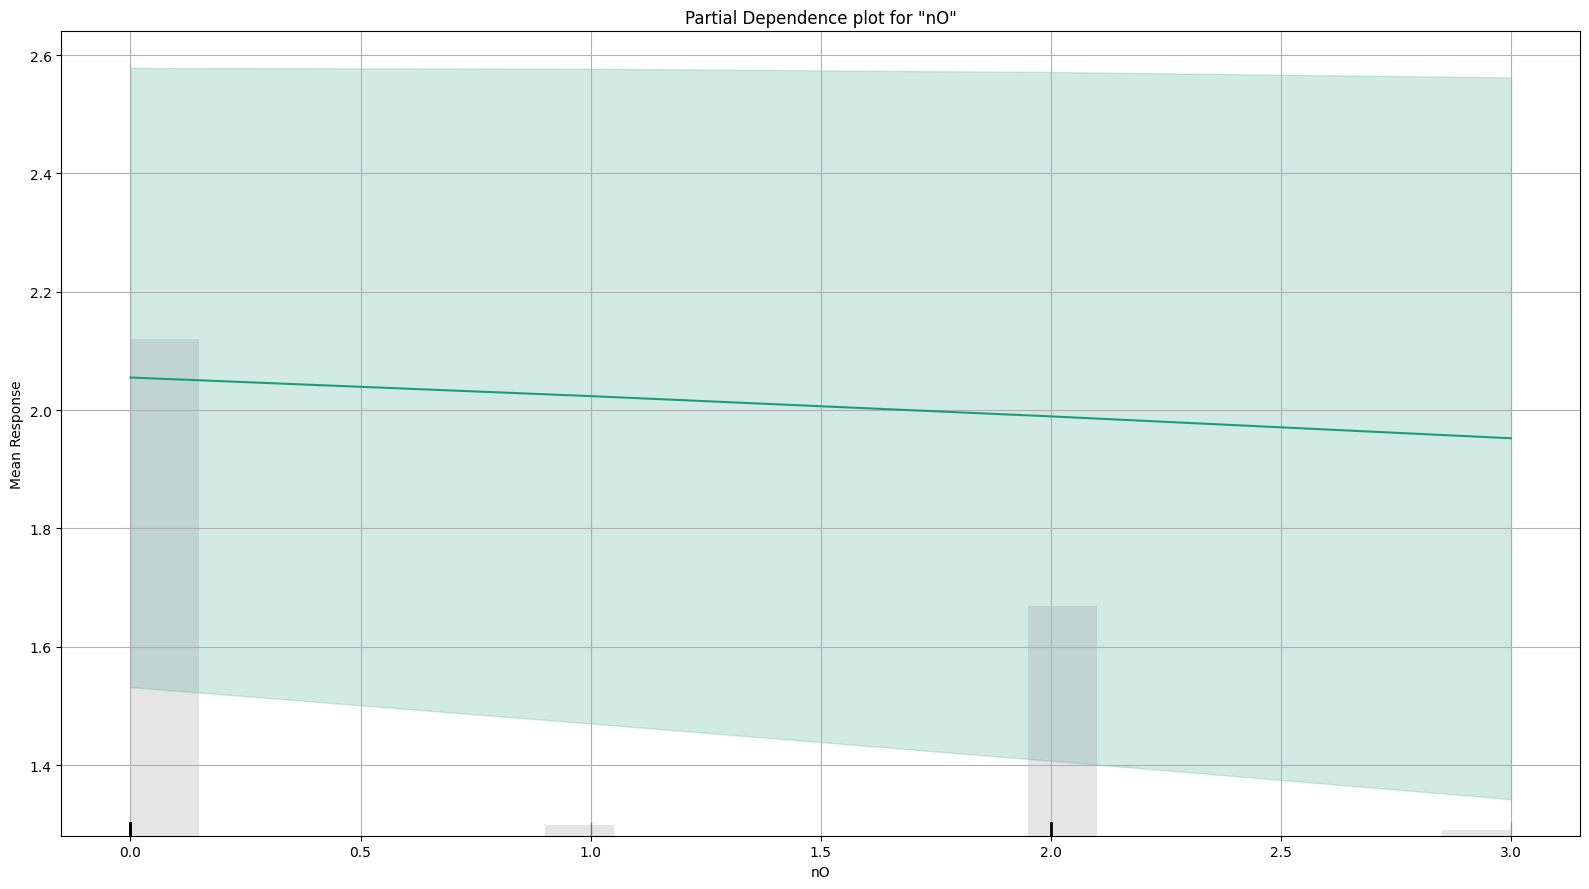

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

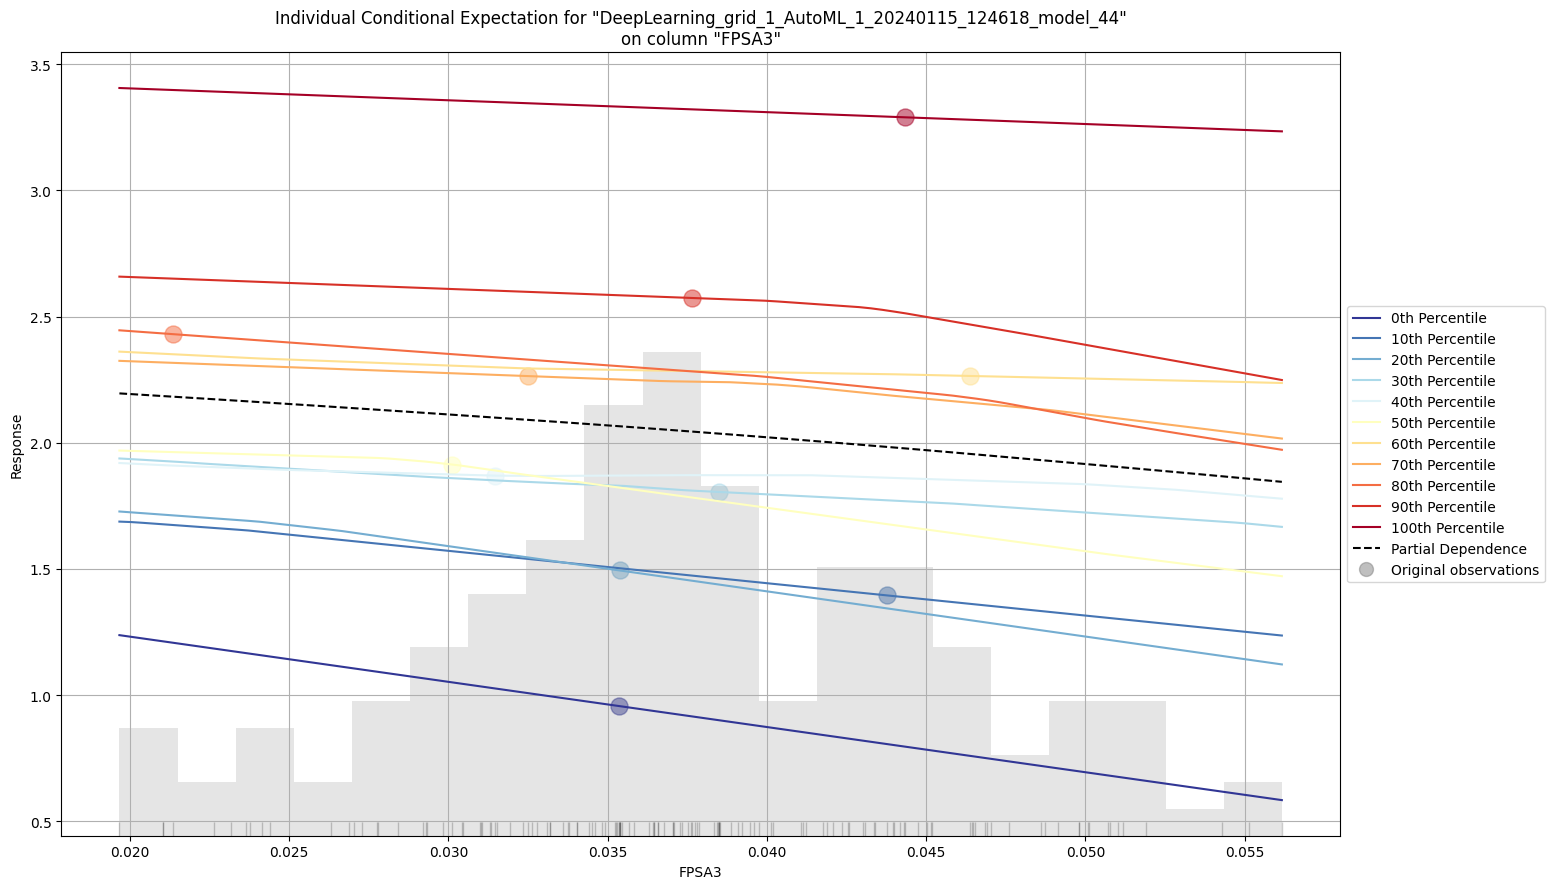

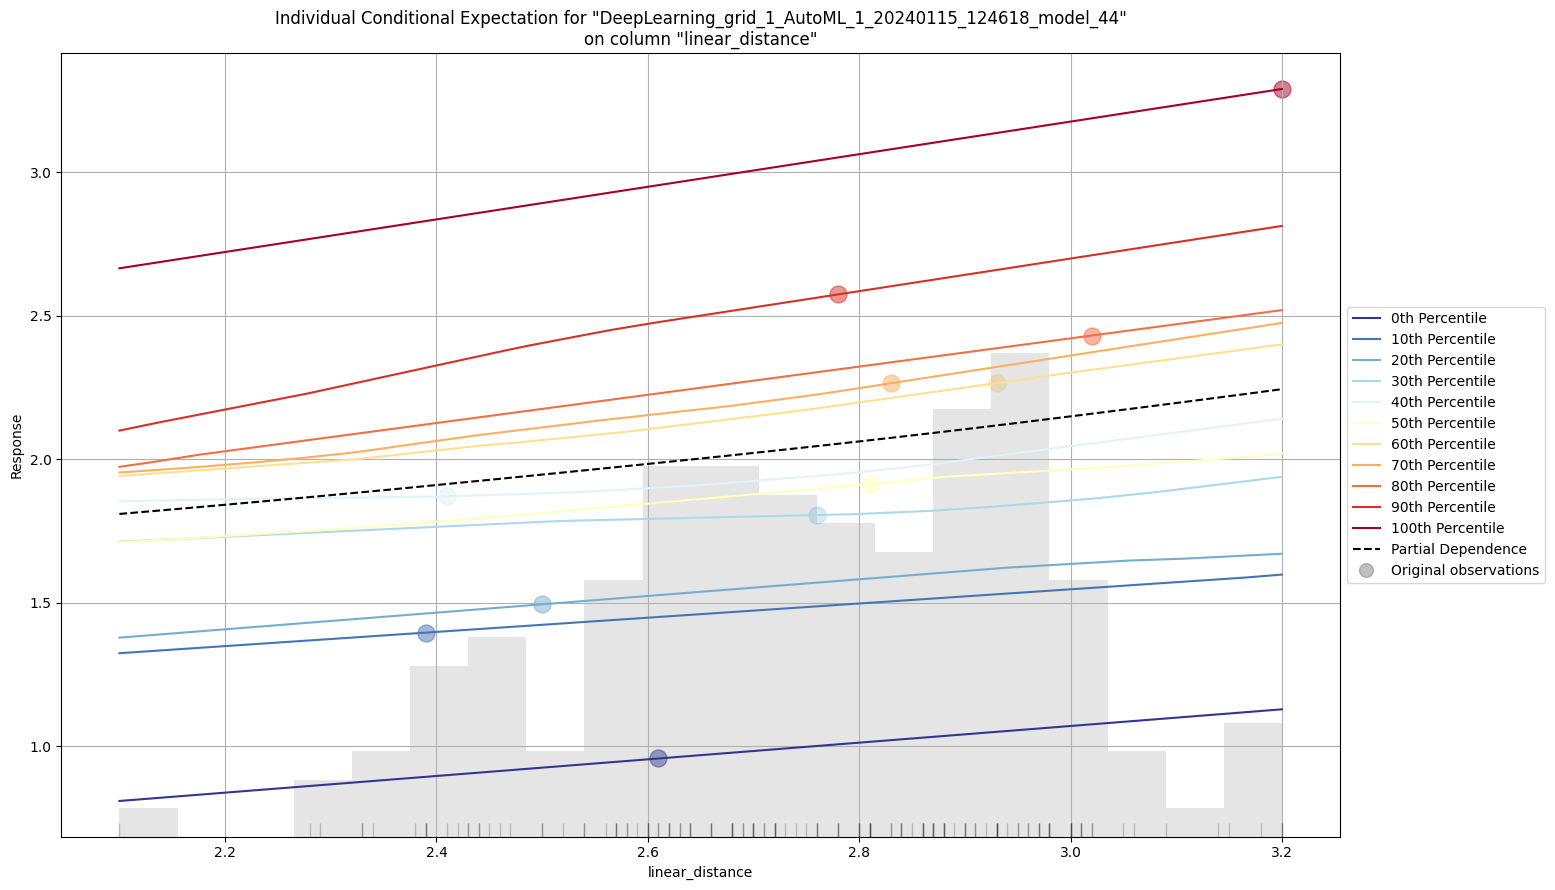

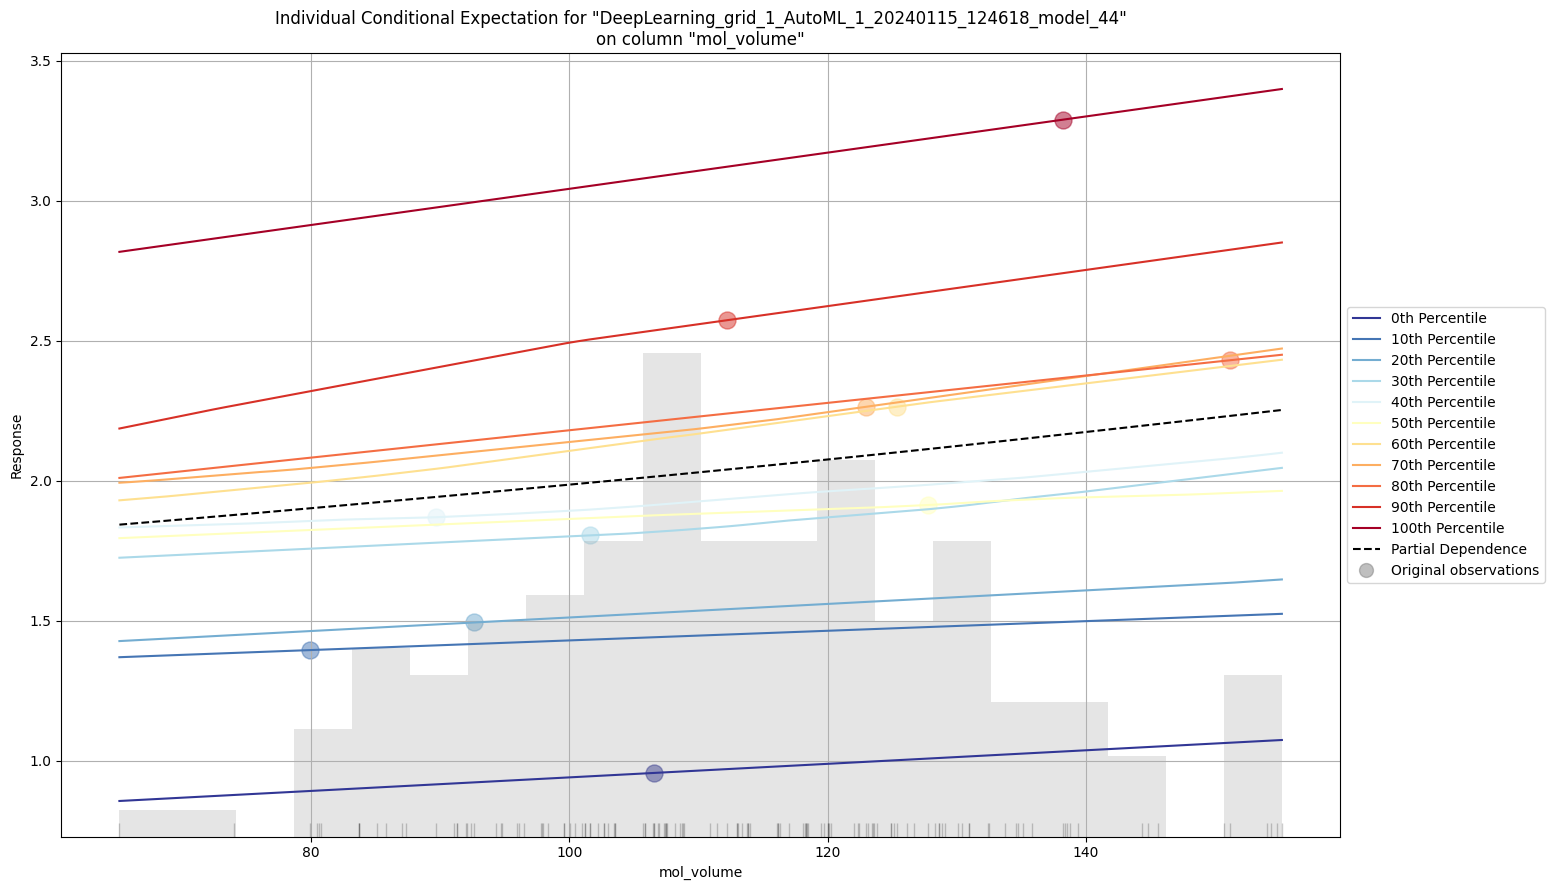

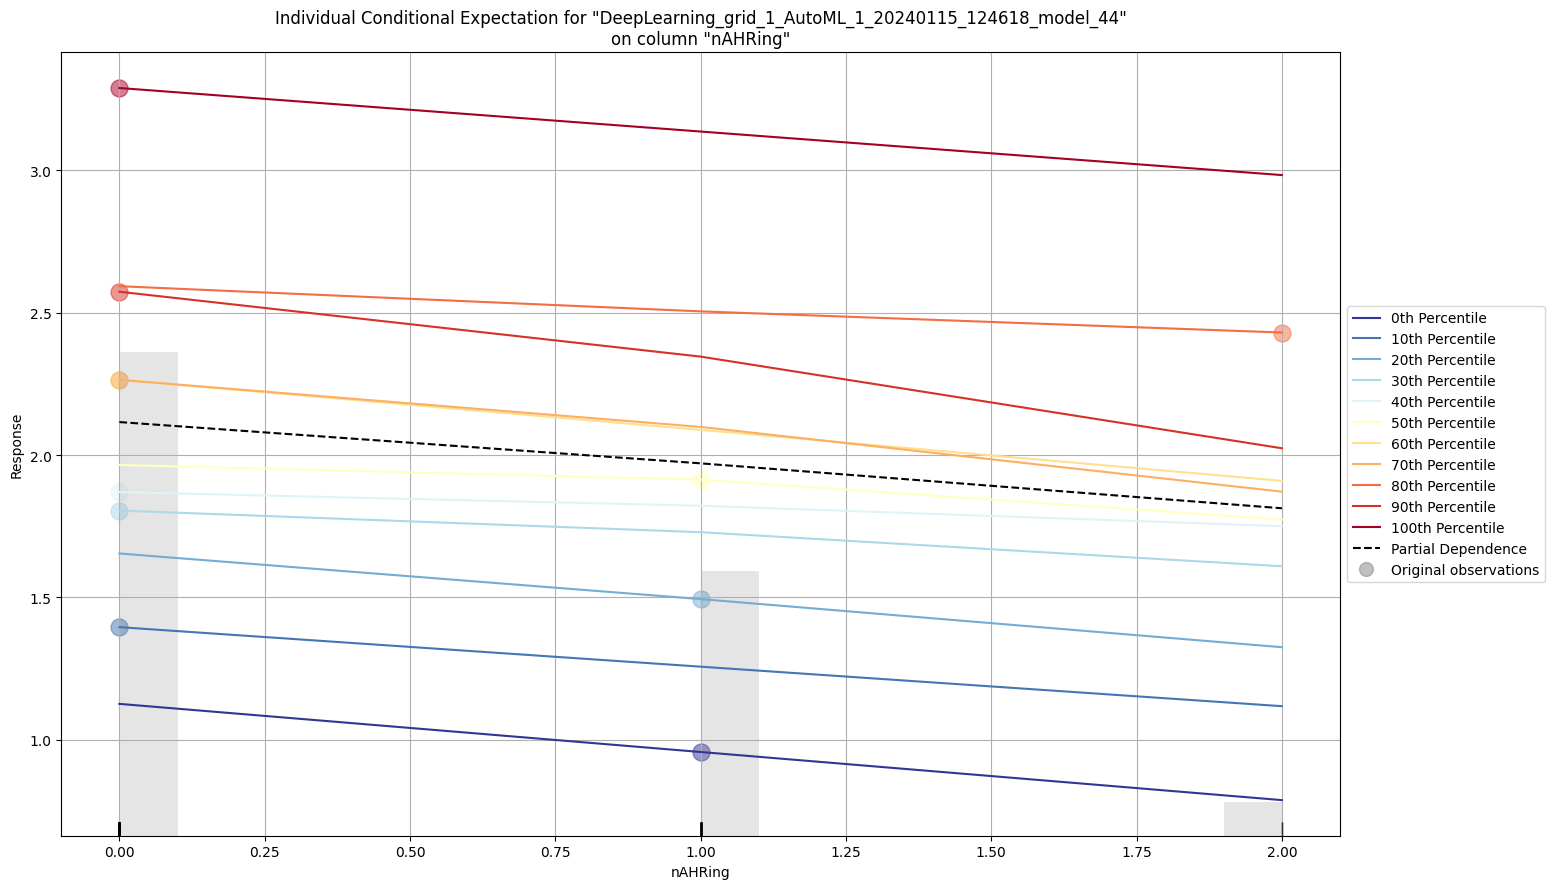

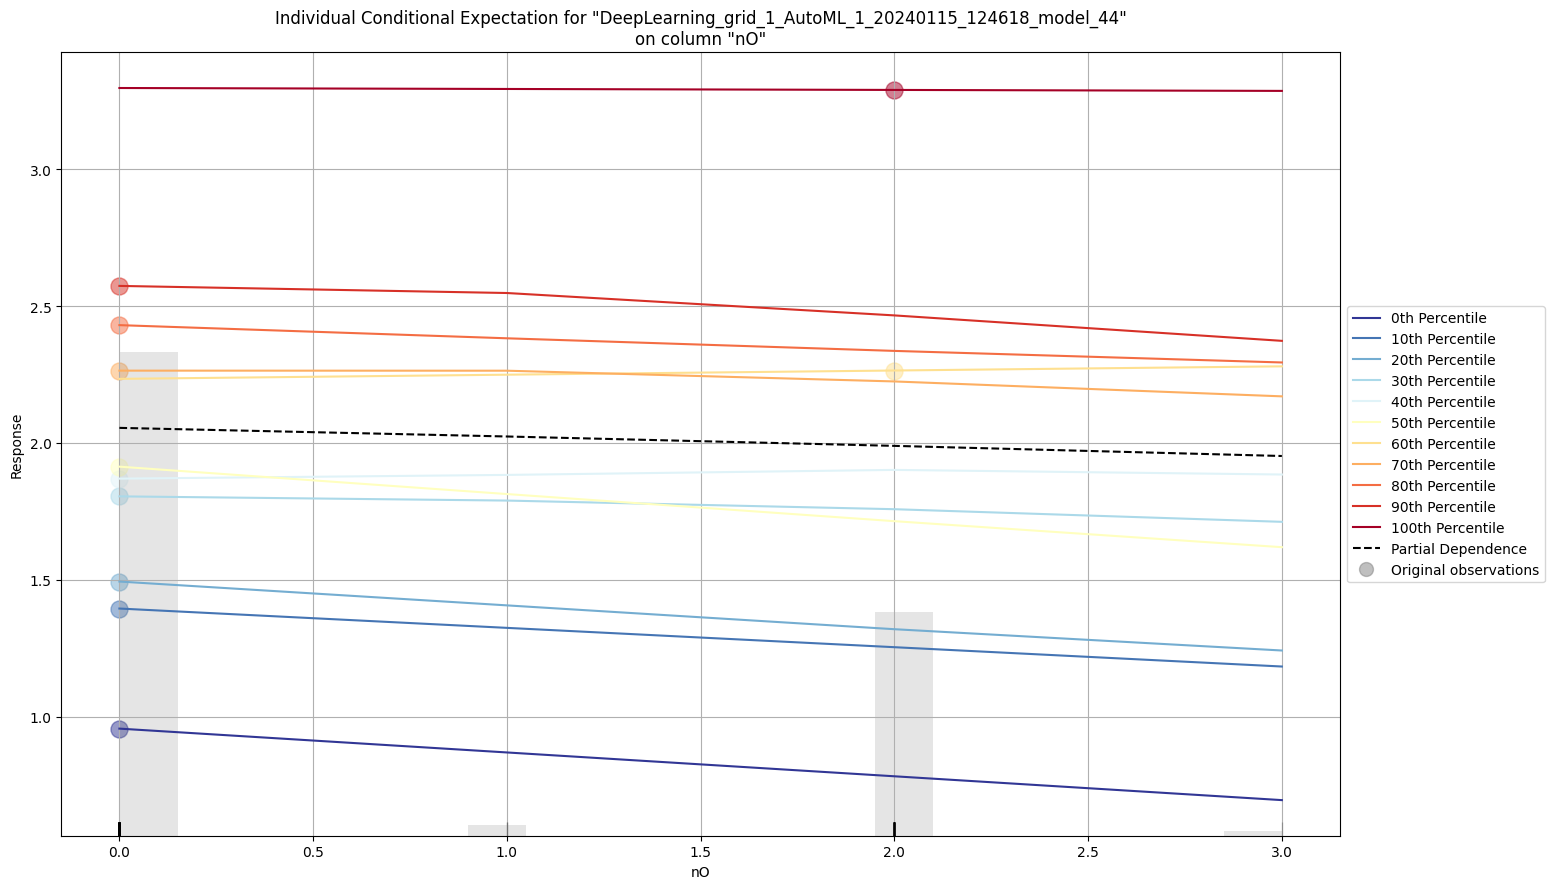

In [75]:
model_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\logP\best_model\DeepLearning_grid_1_AutoML_1_20240115_124618_model_44'

model = h2o.load_model(model_path)

model.explain(train)

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

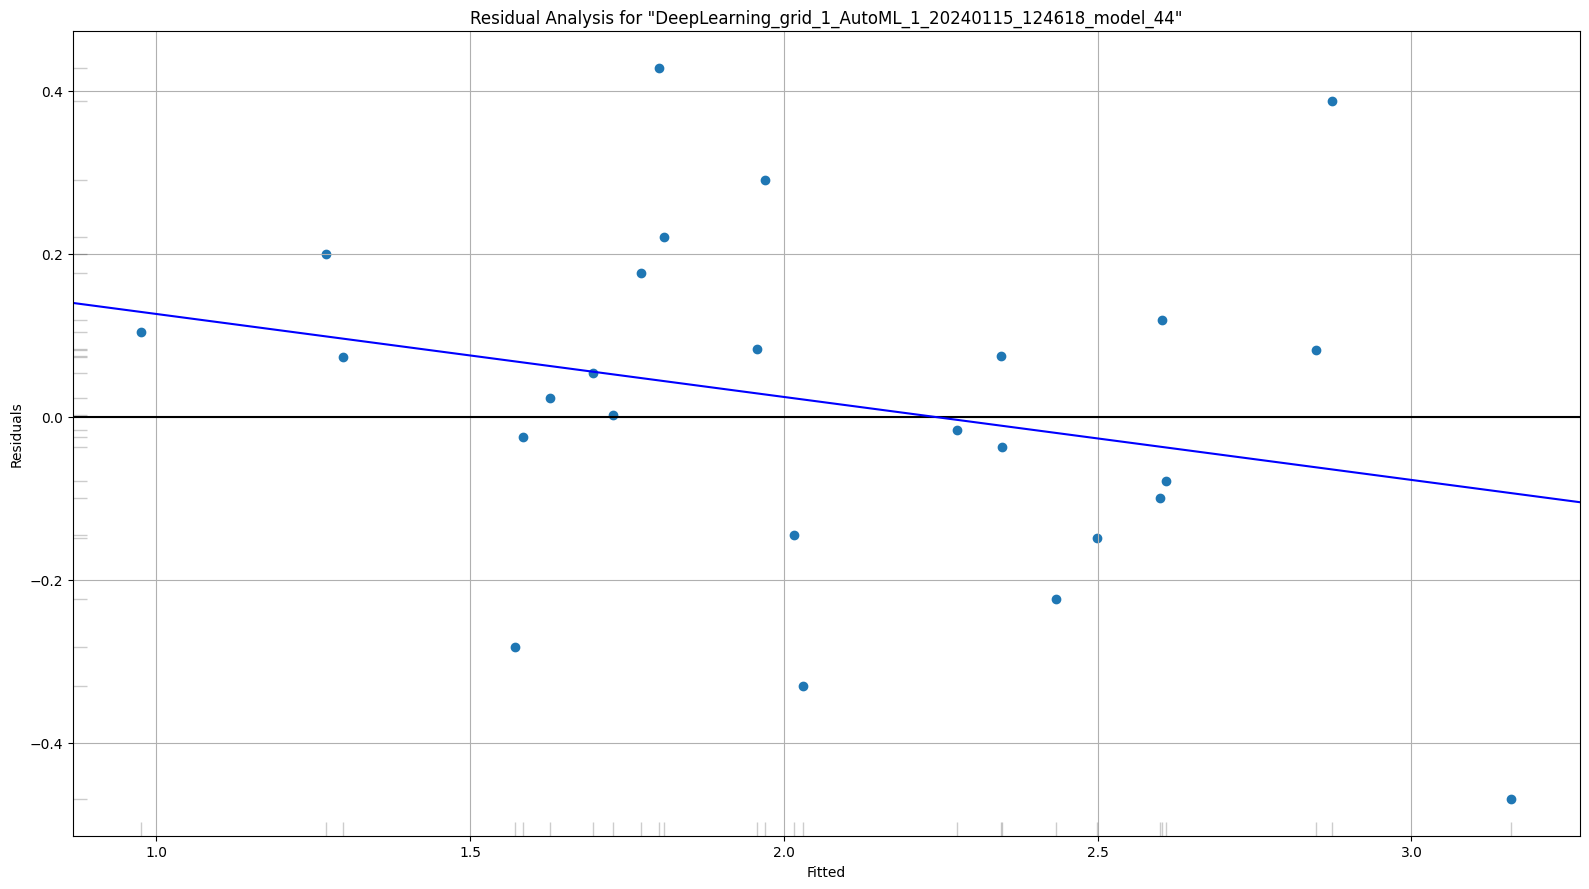

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

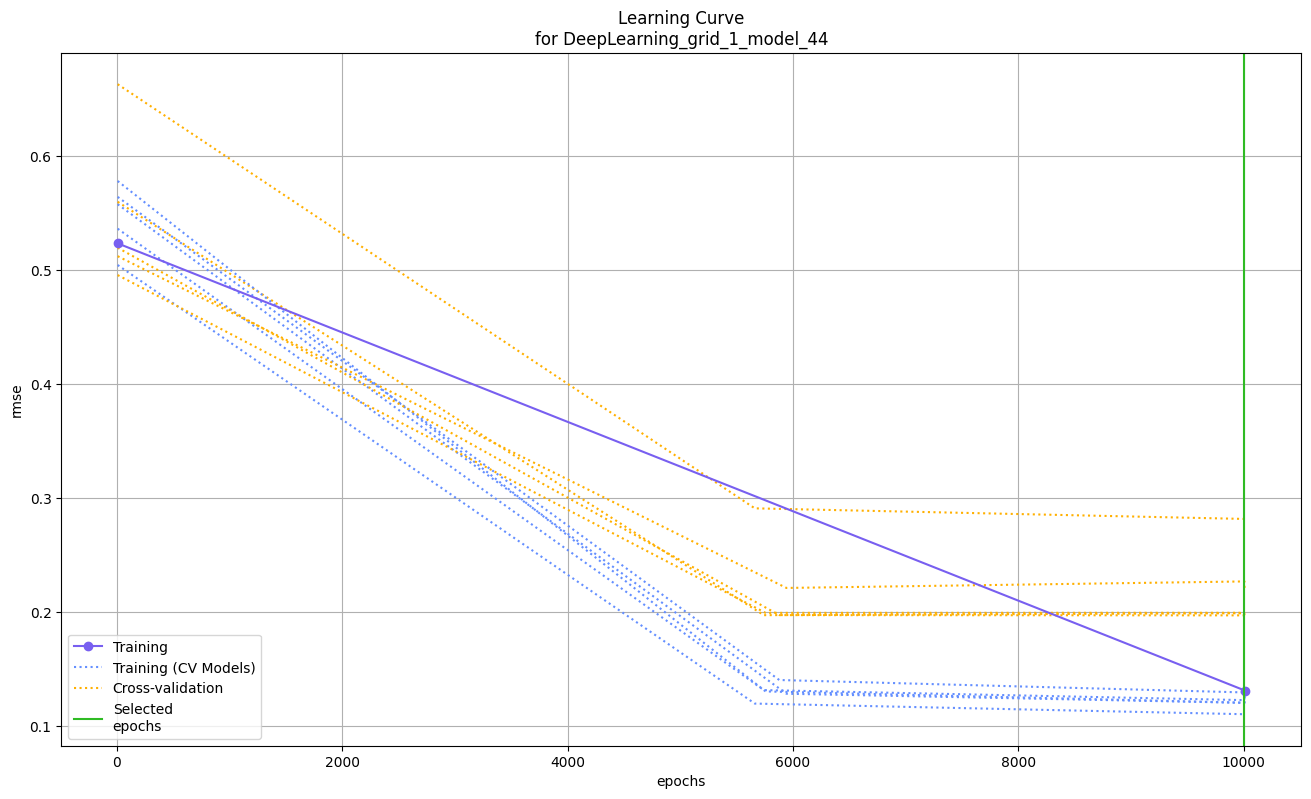

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

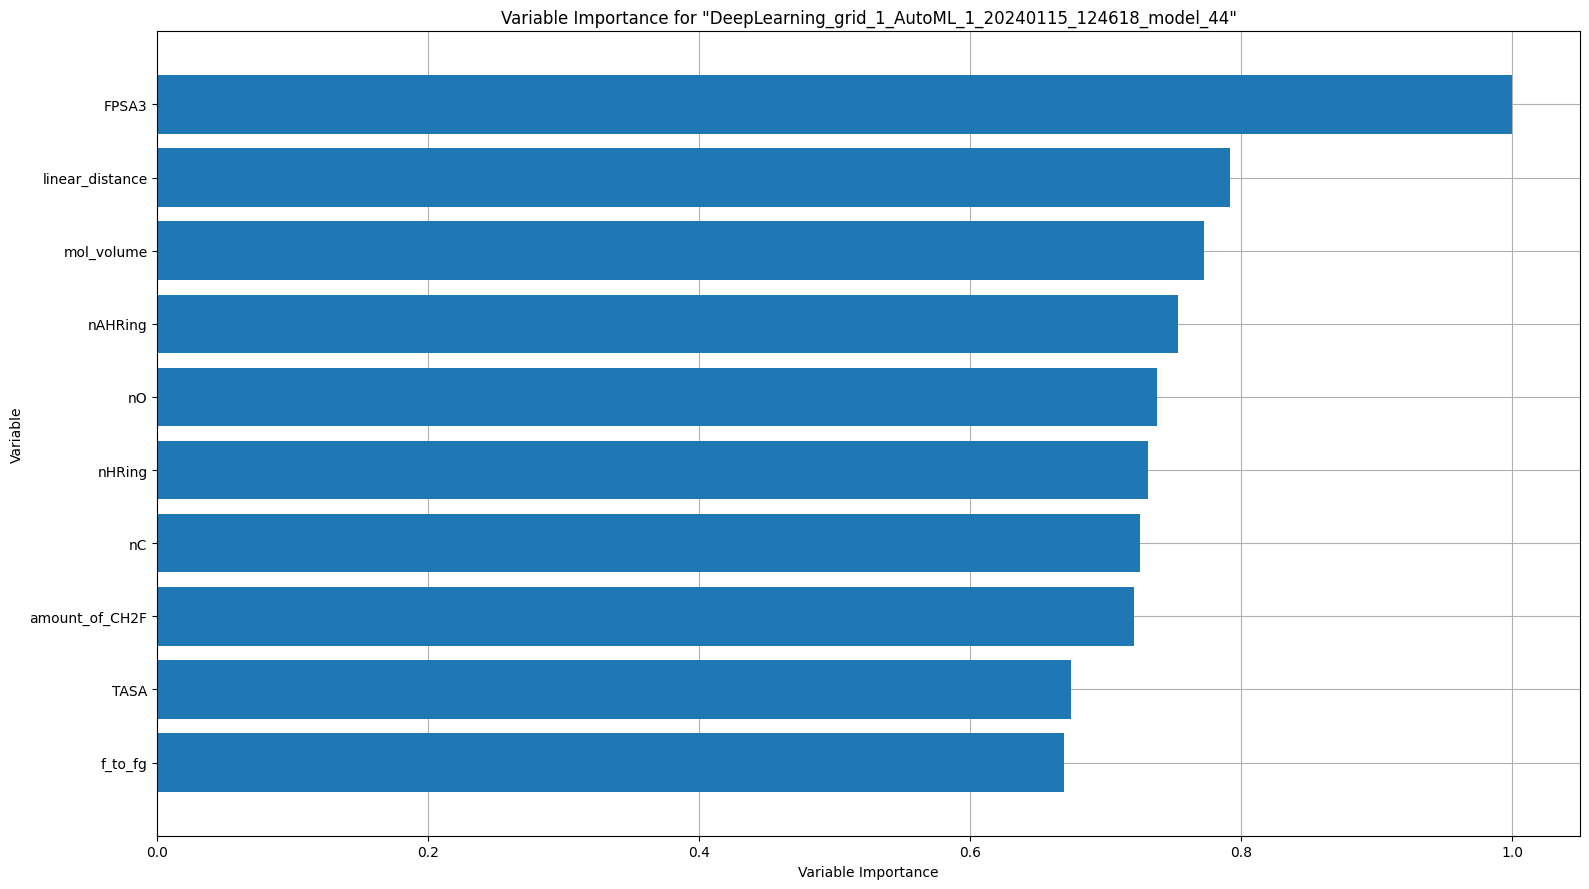

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

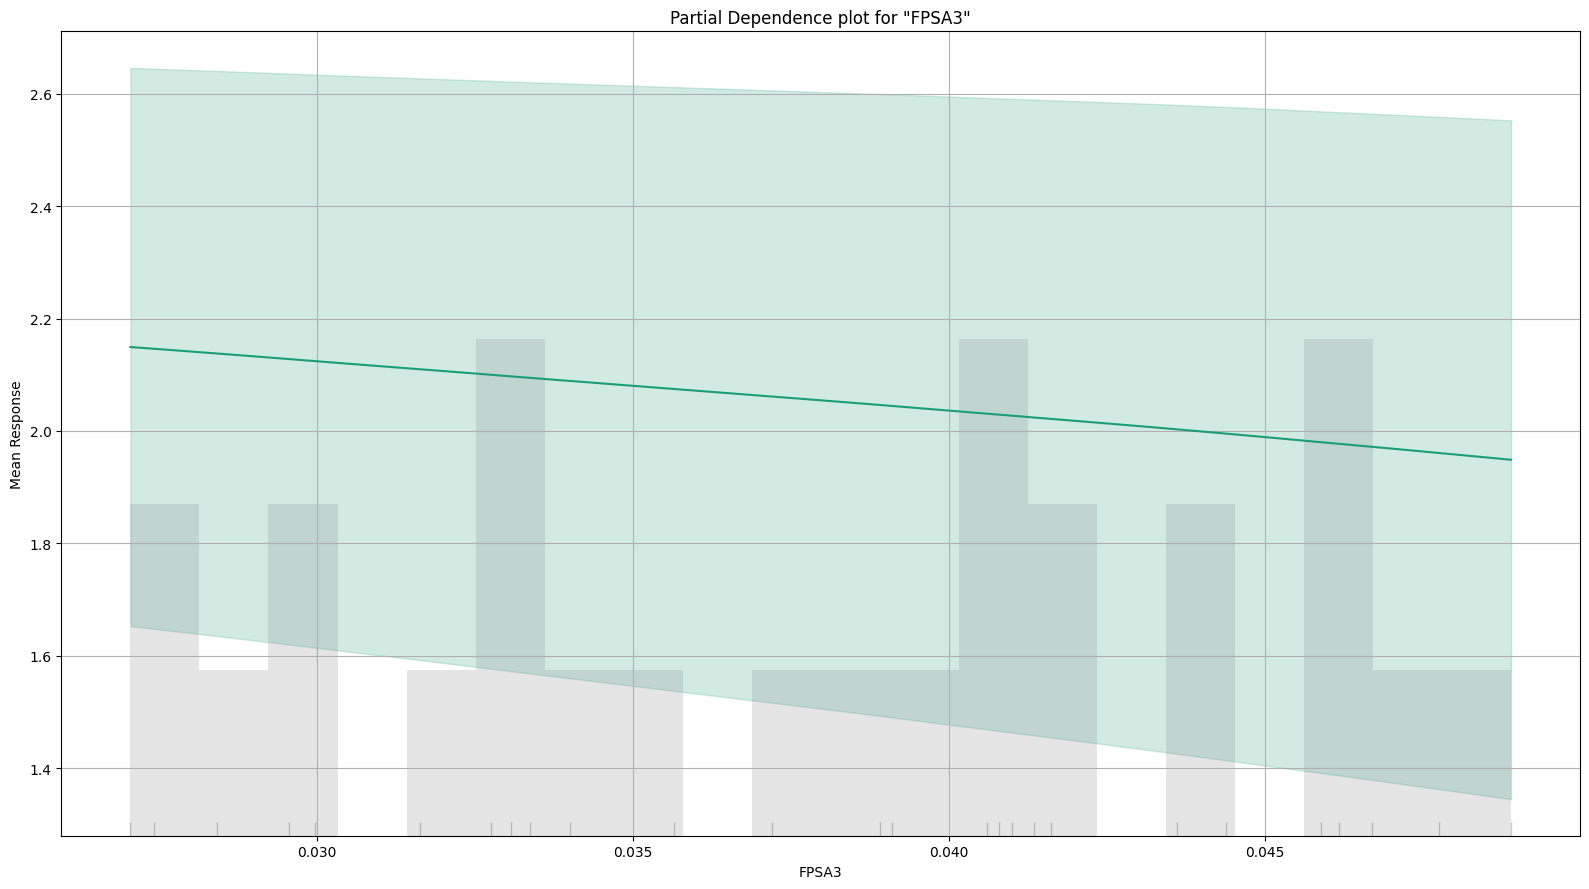

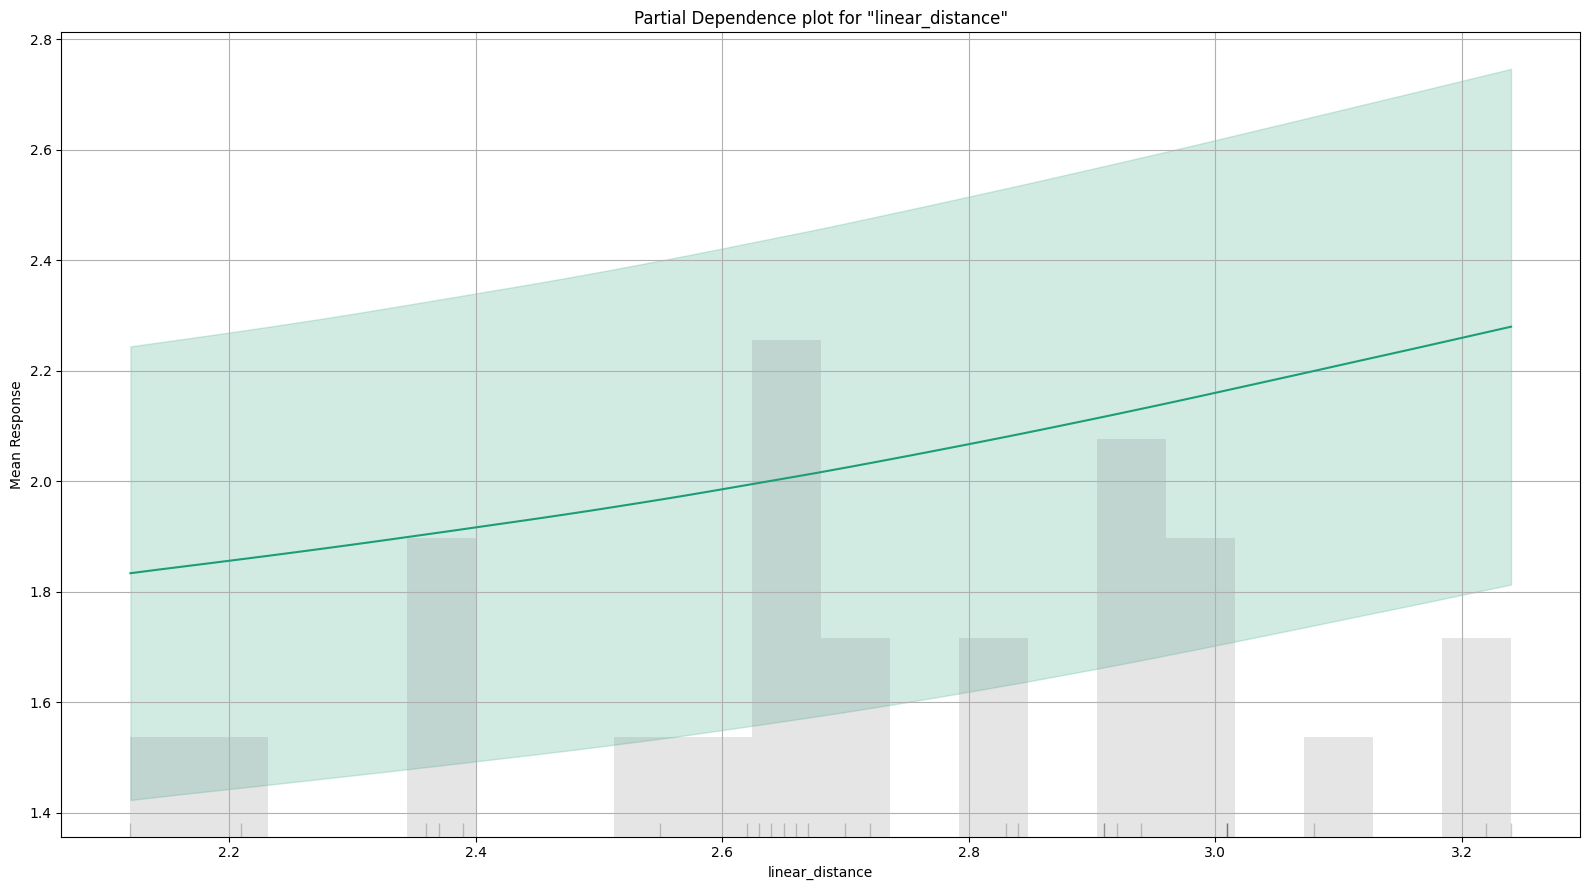

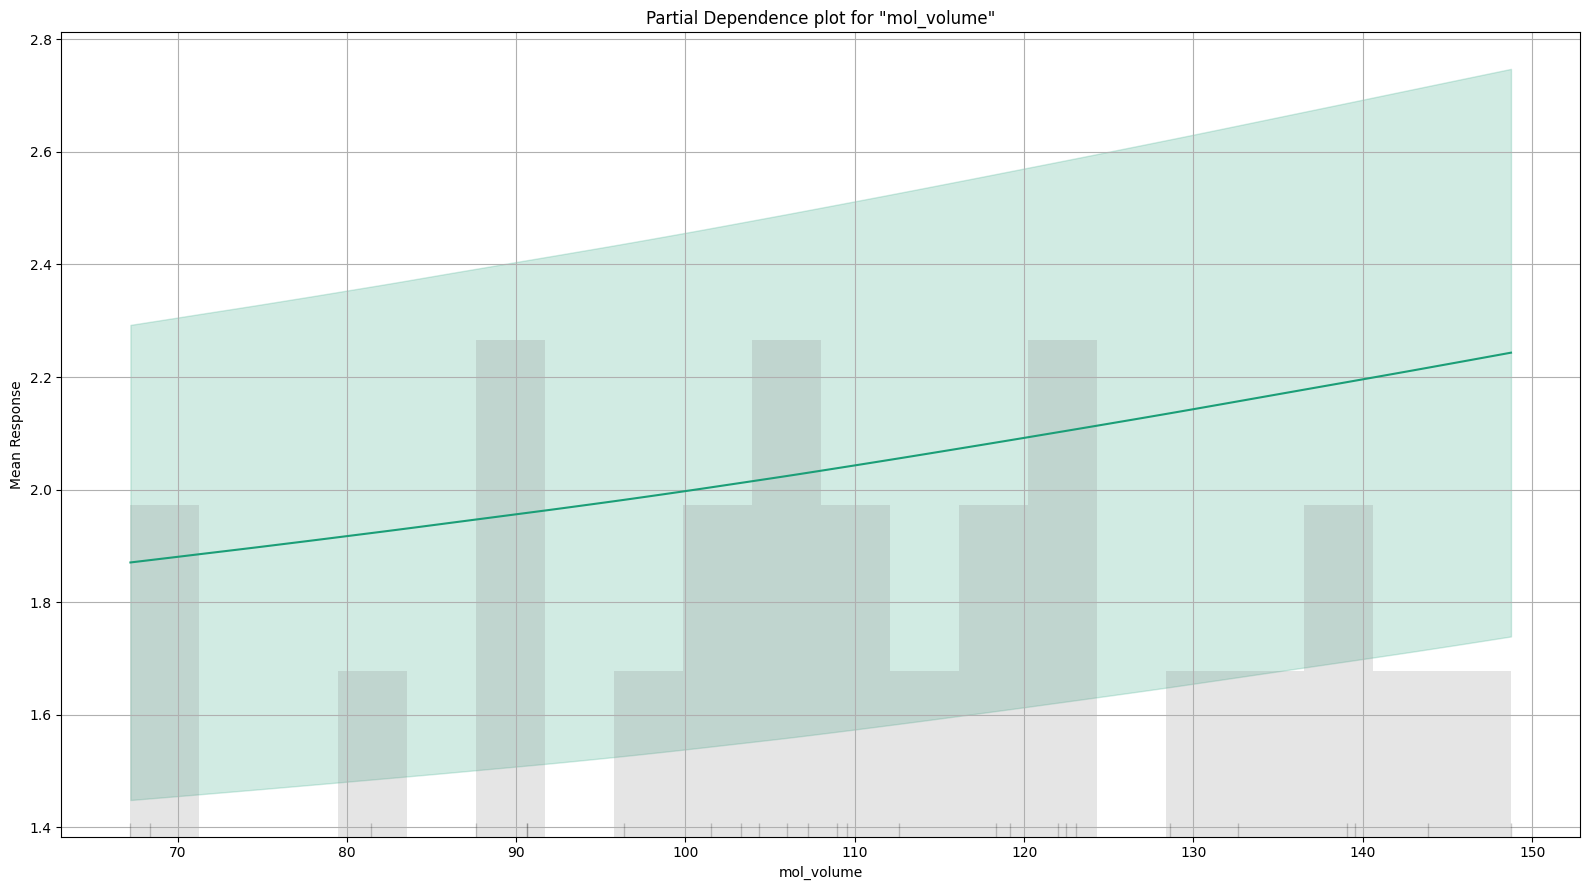

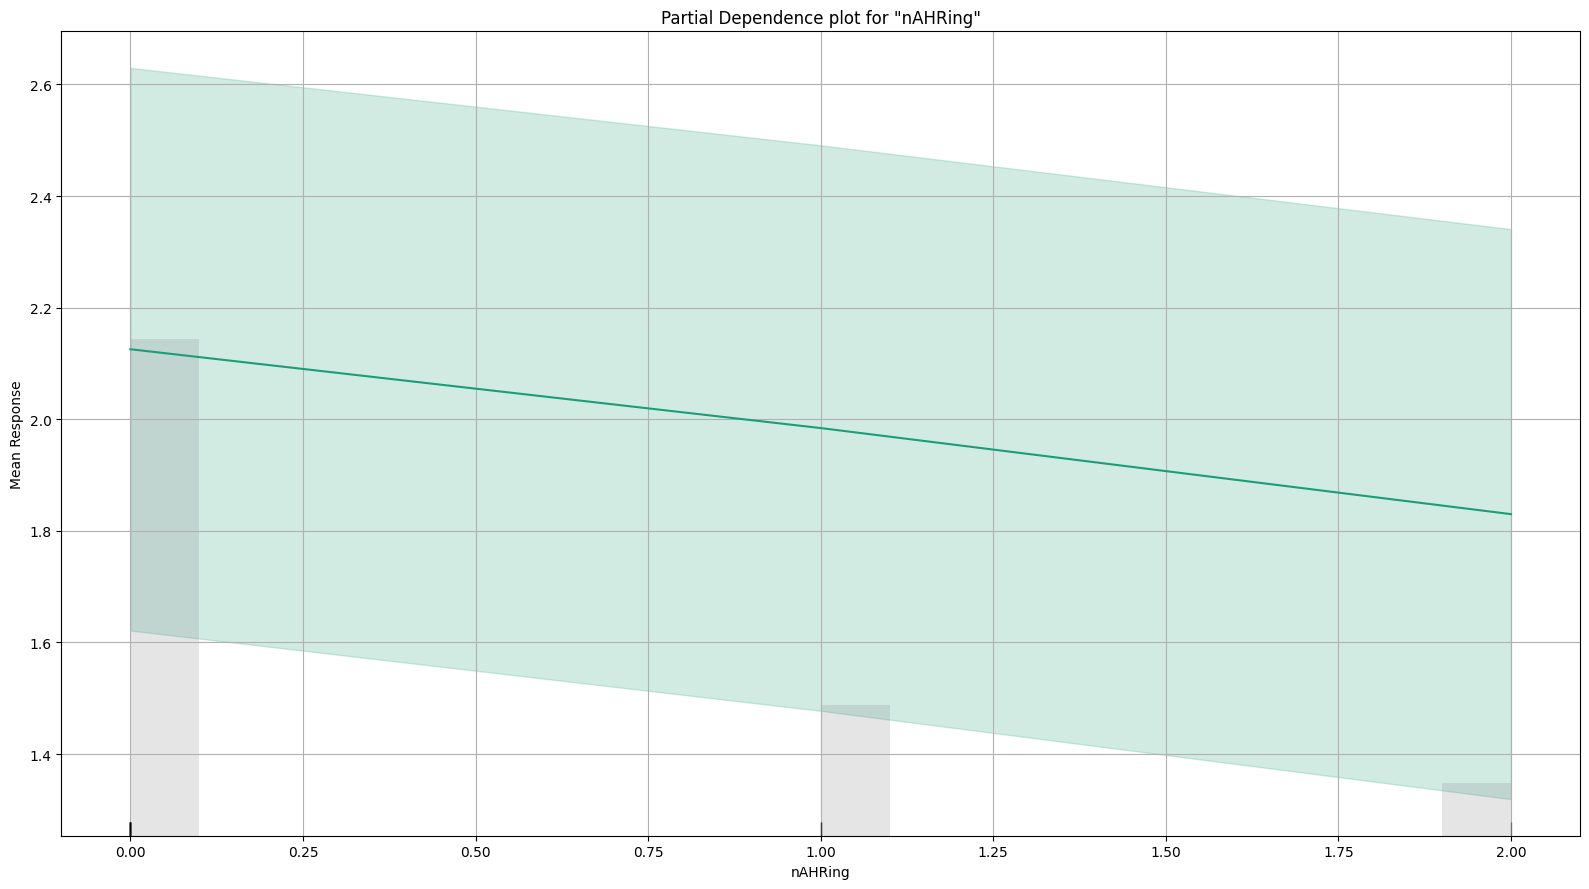

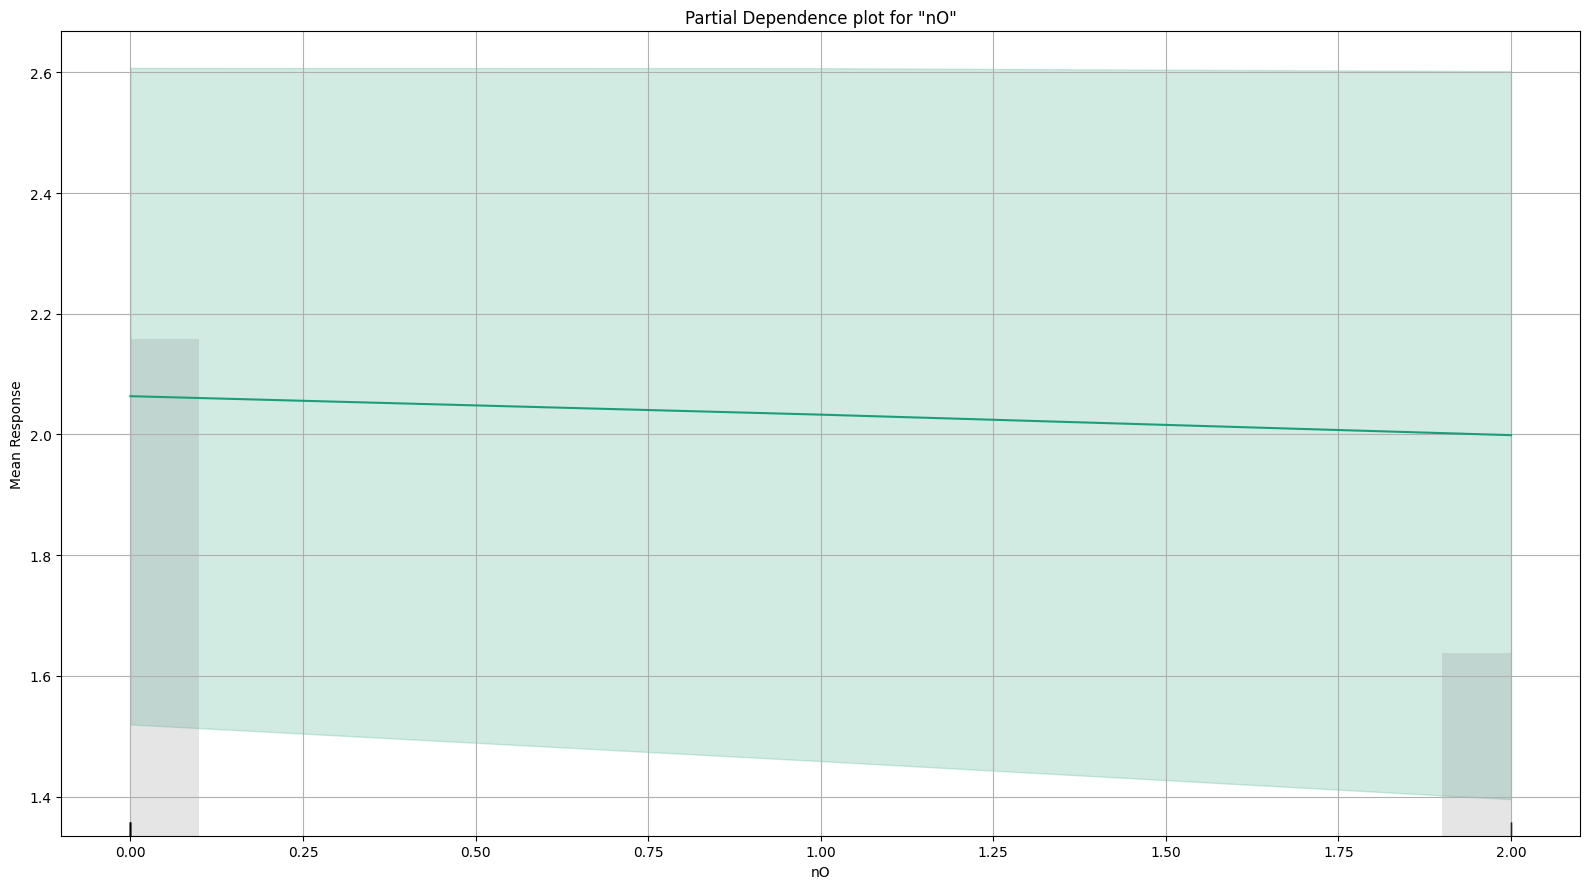

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

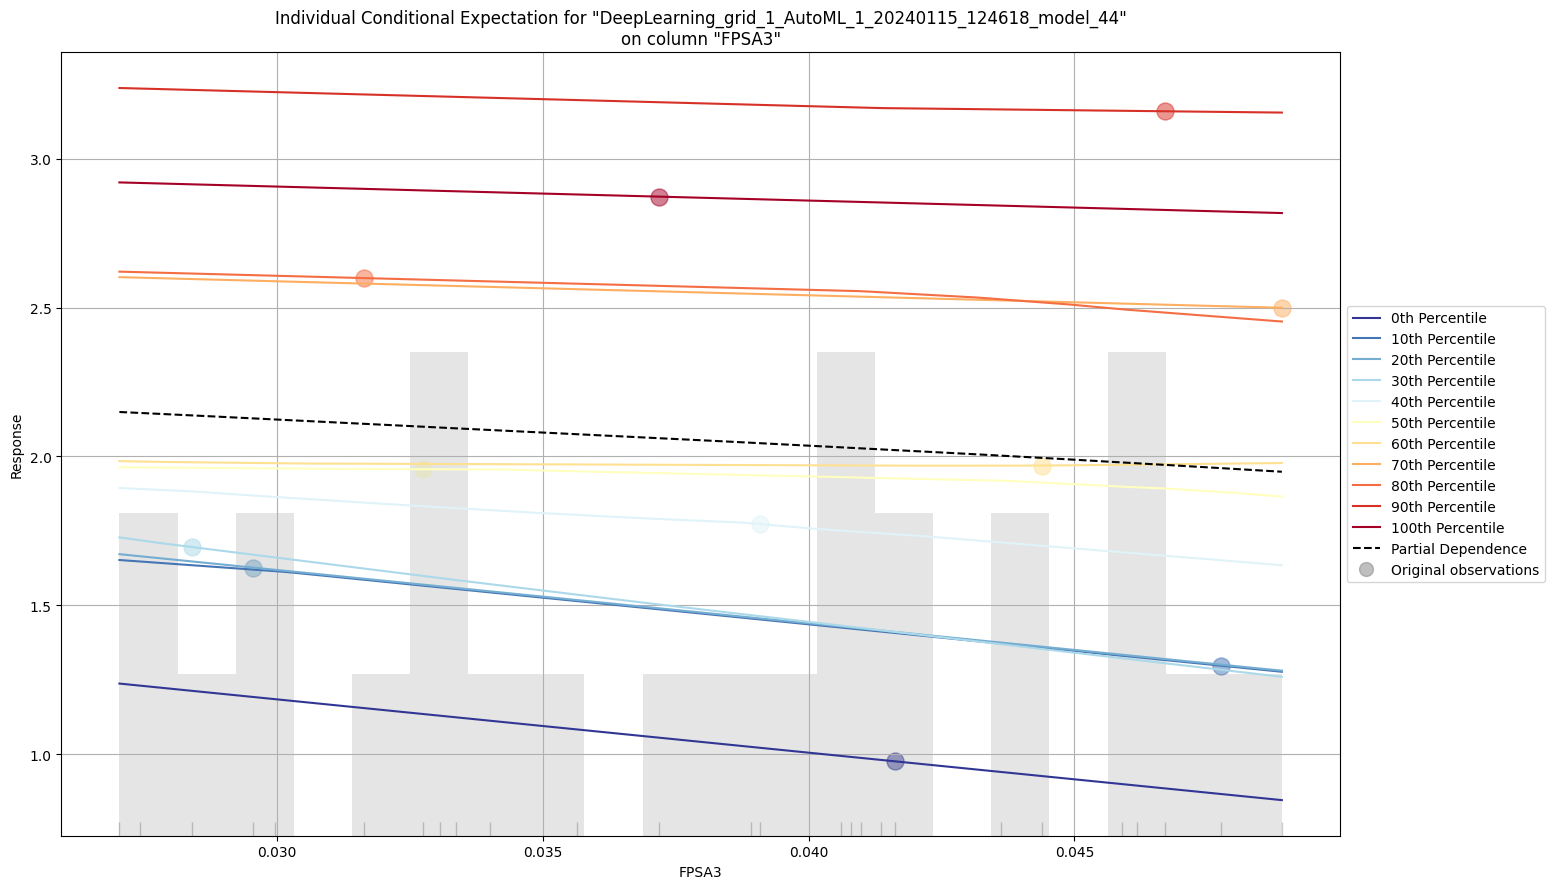

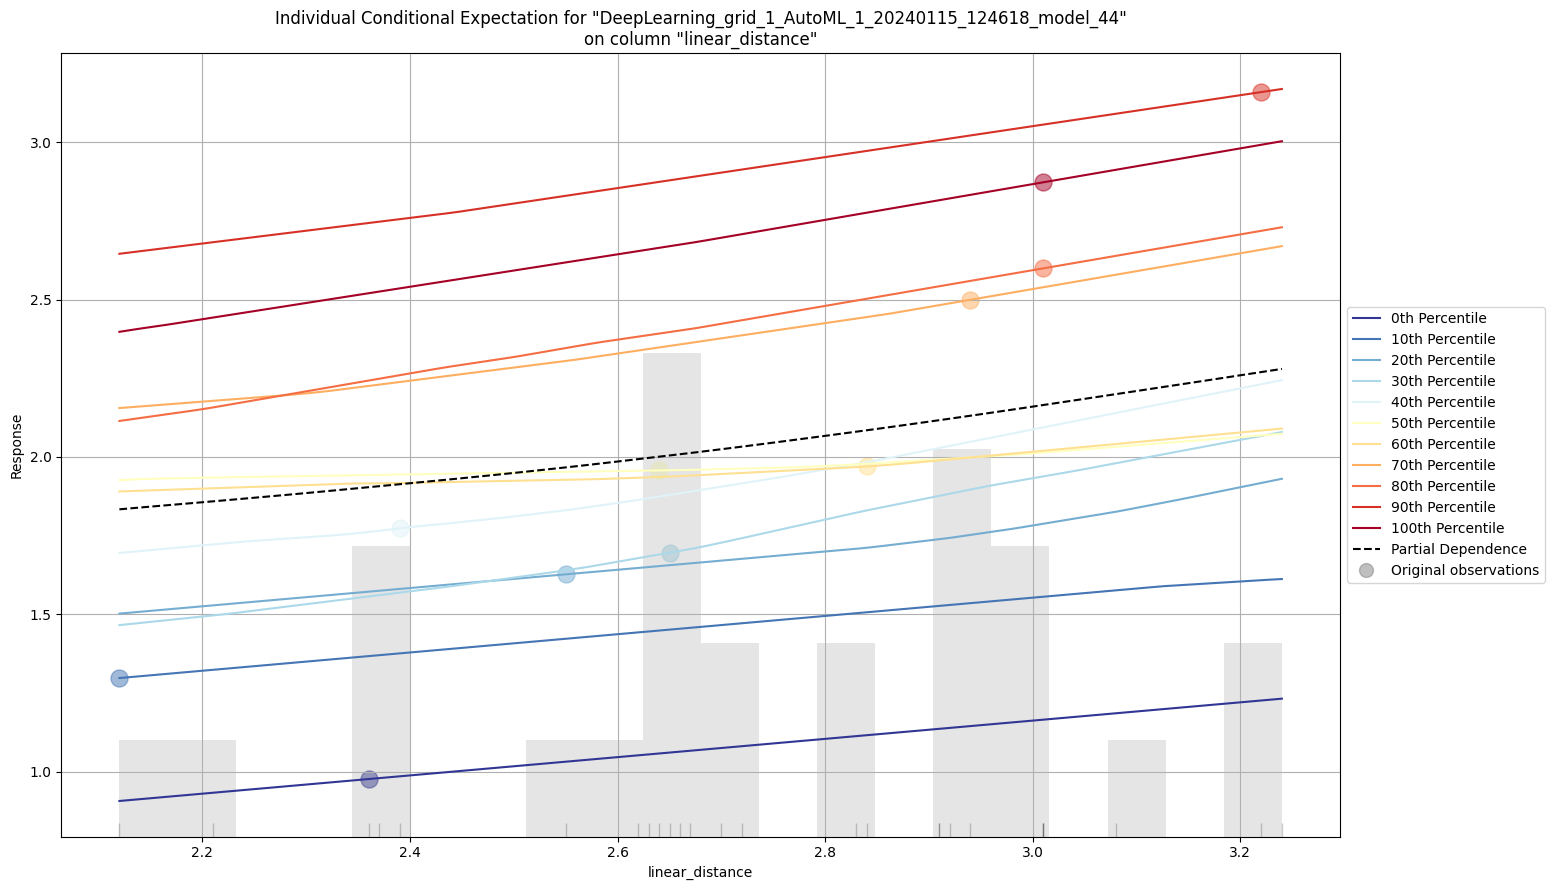

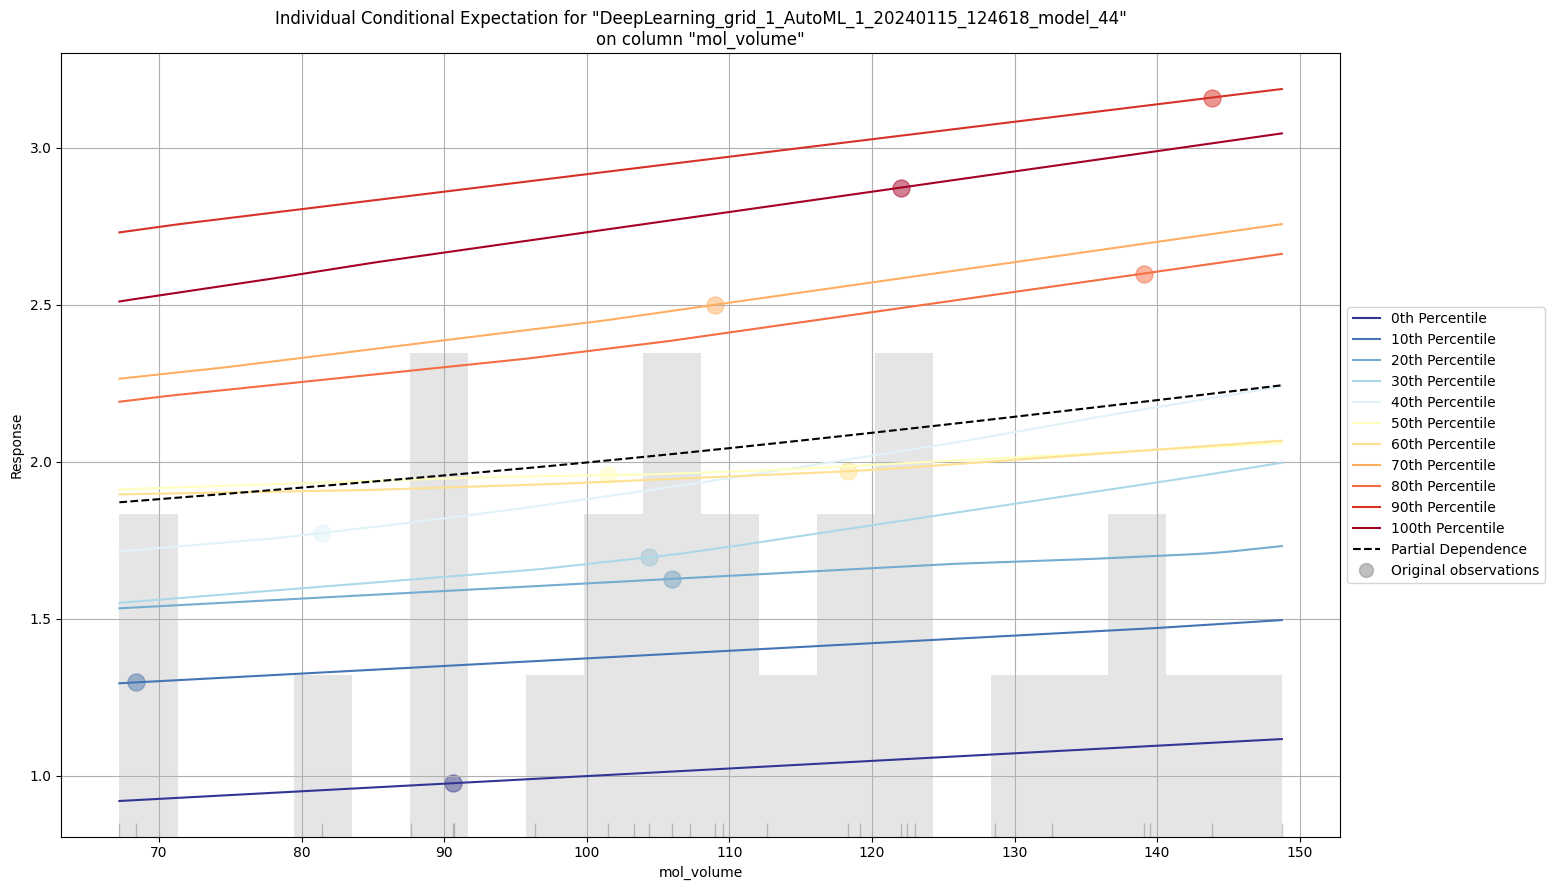

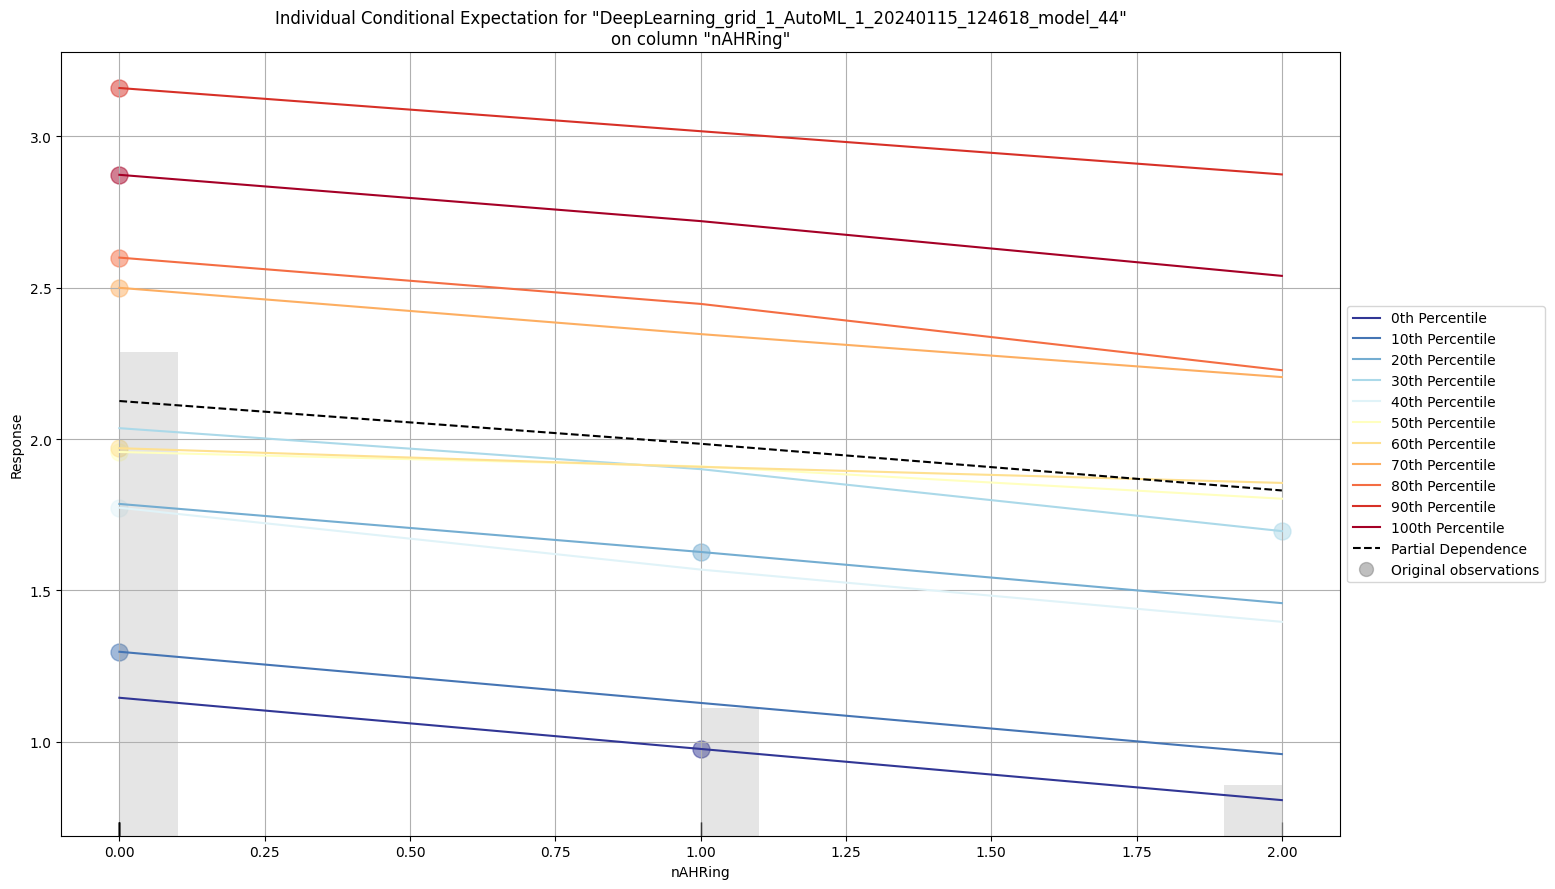

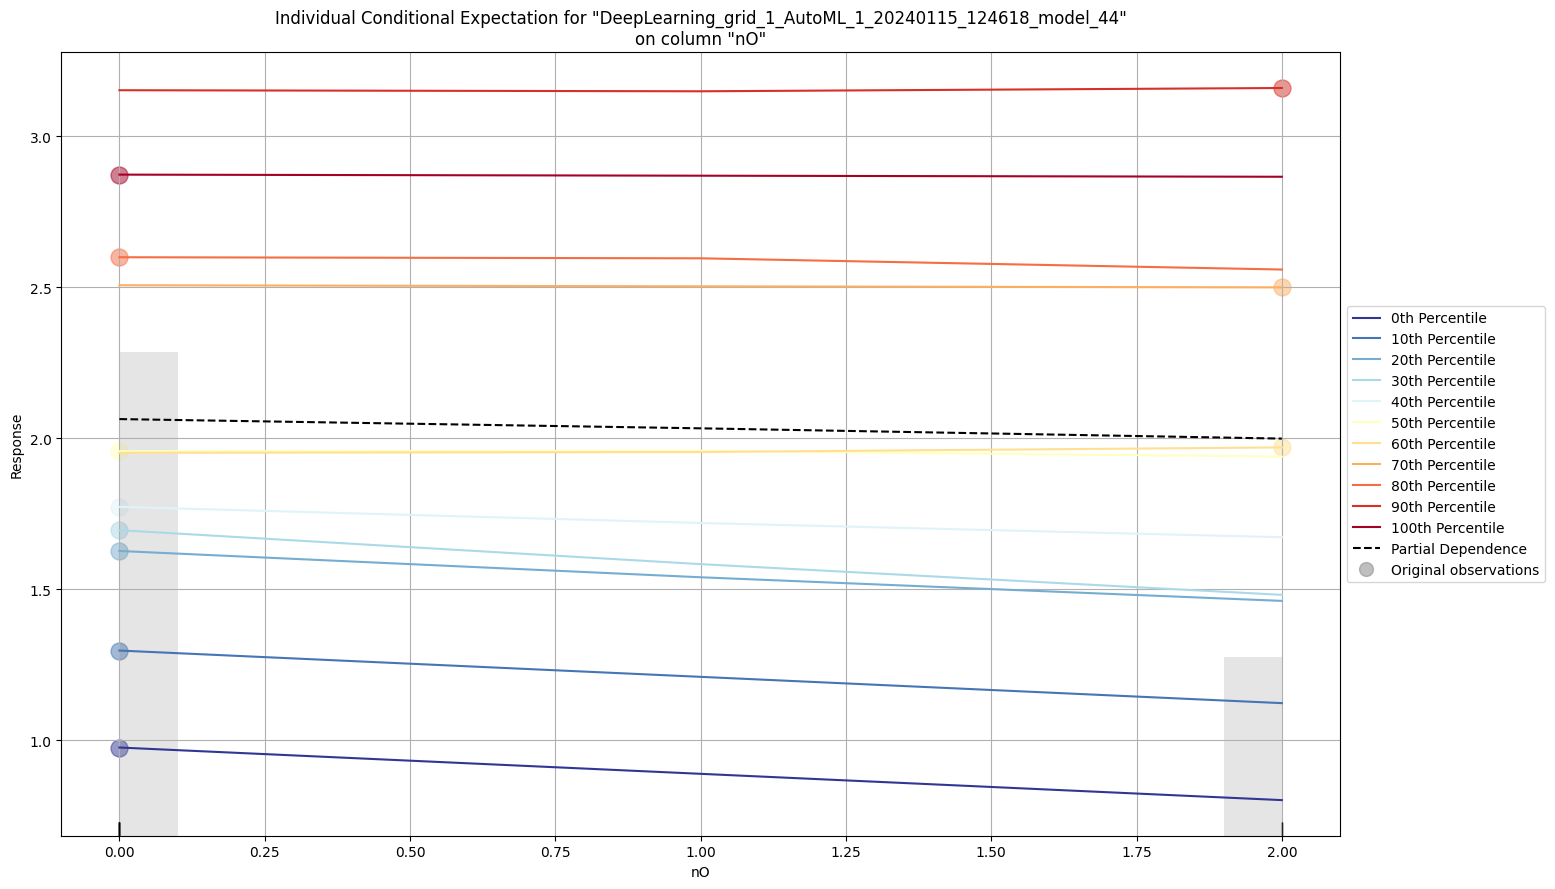

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

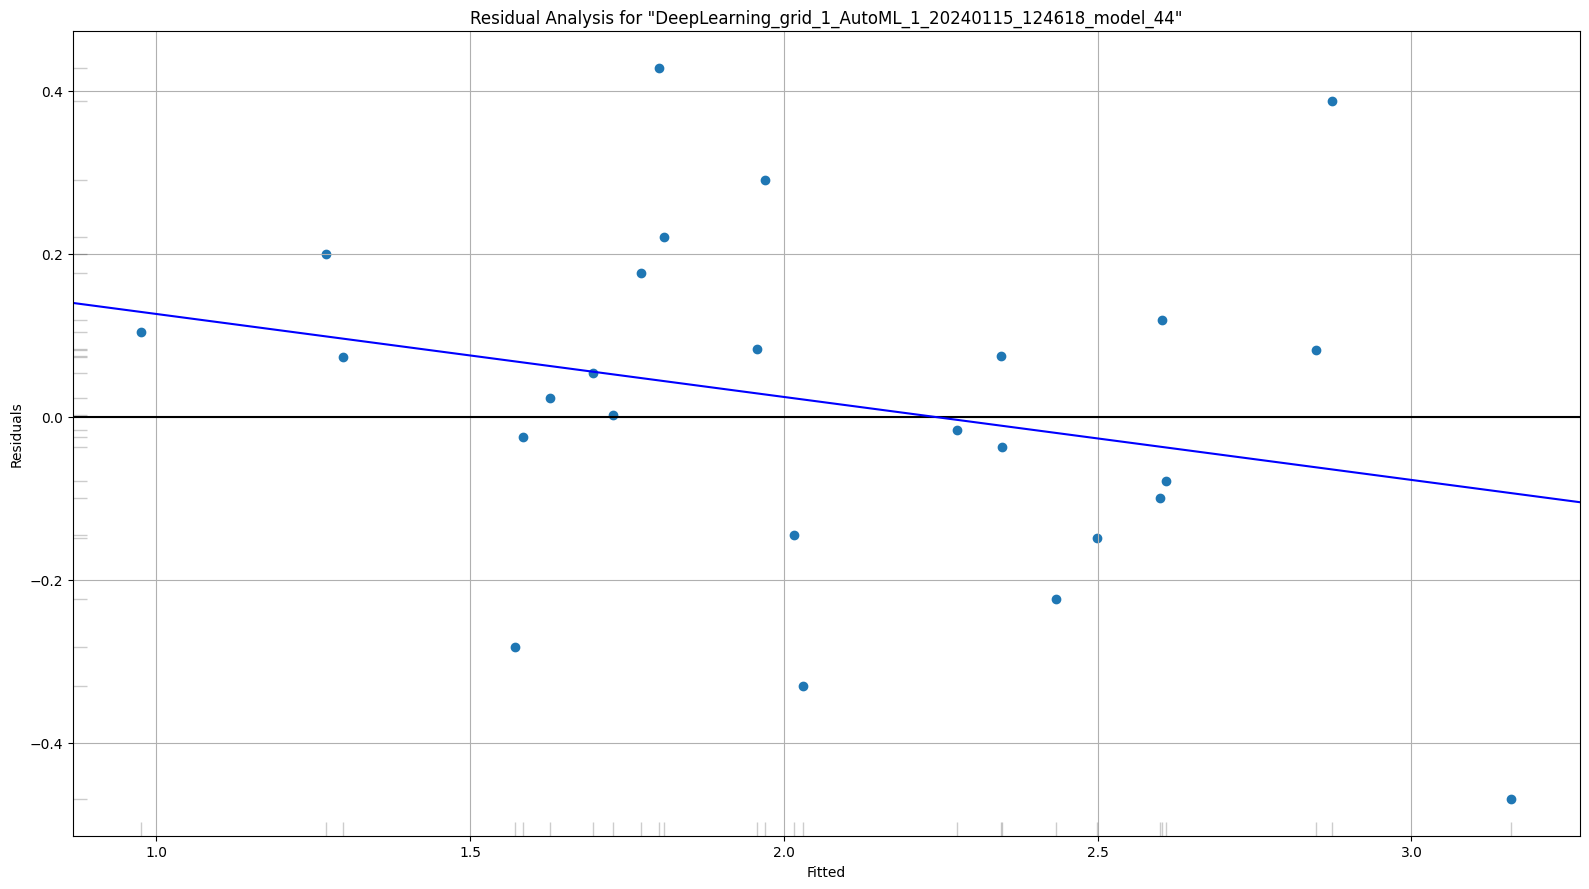

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

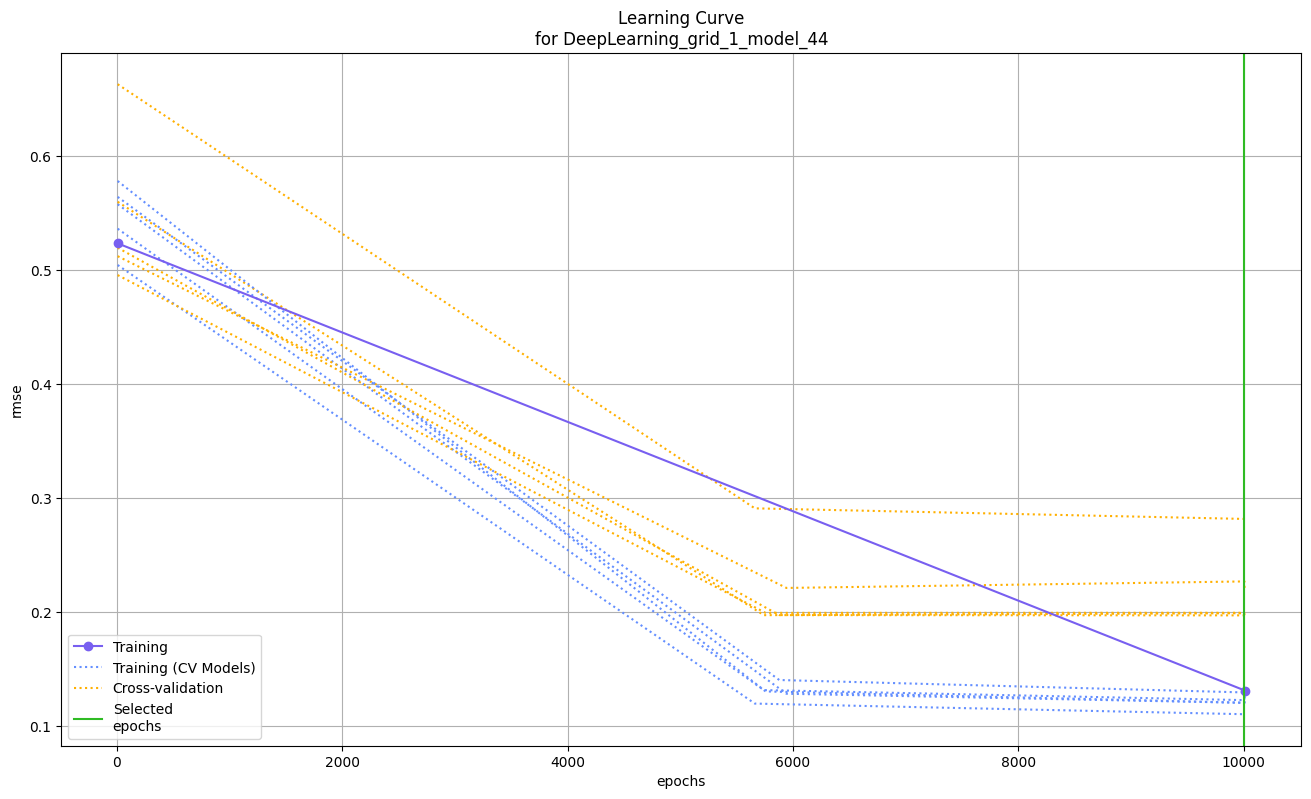

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

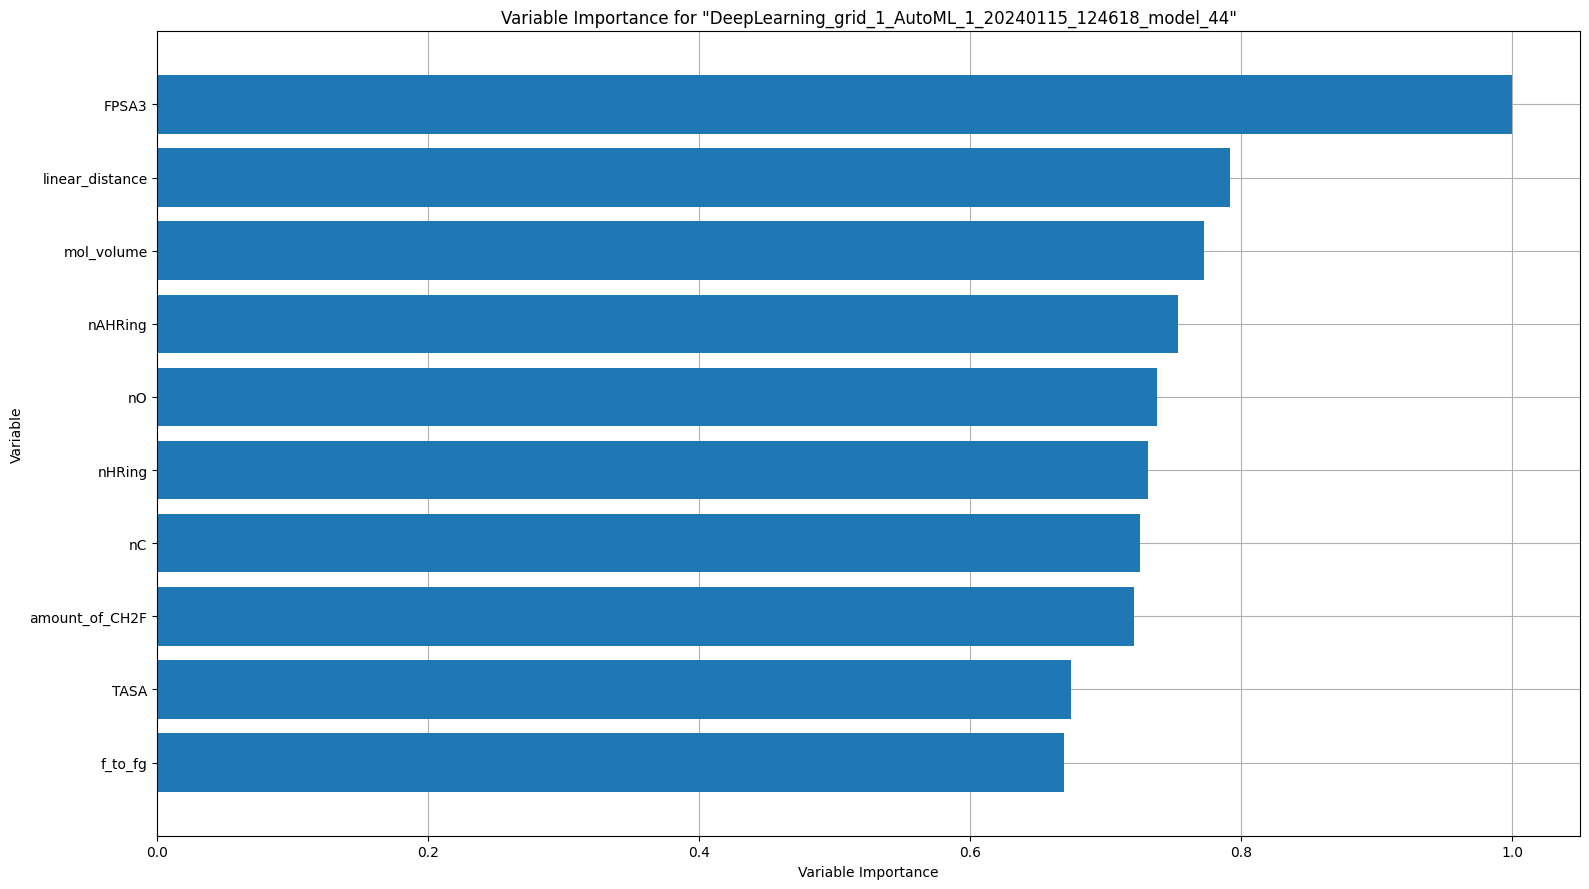

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

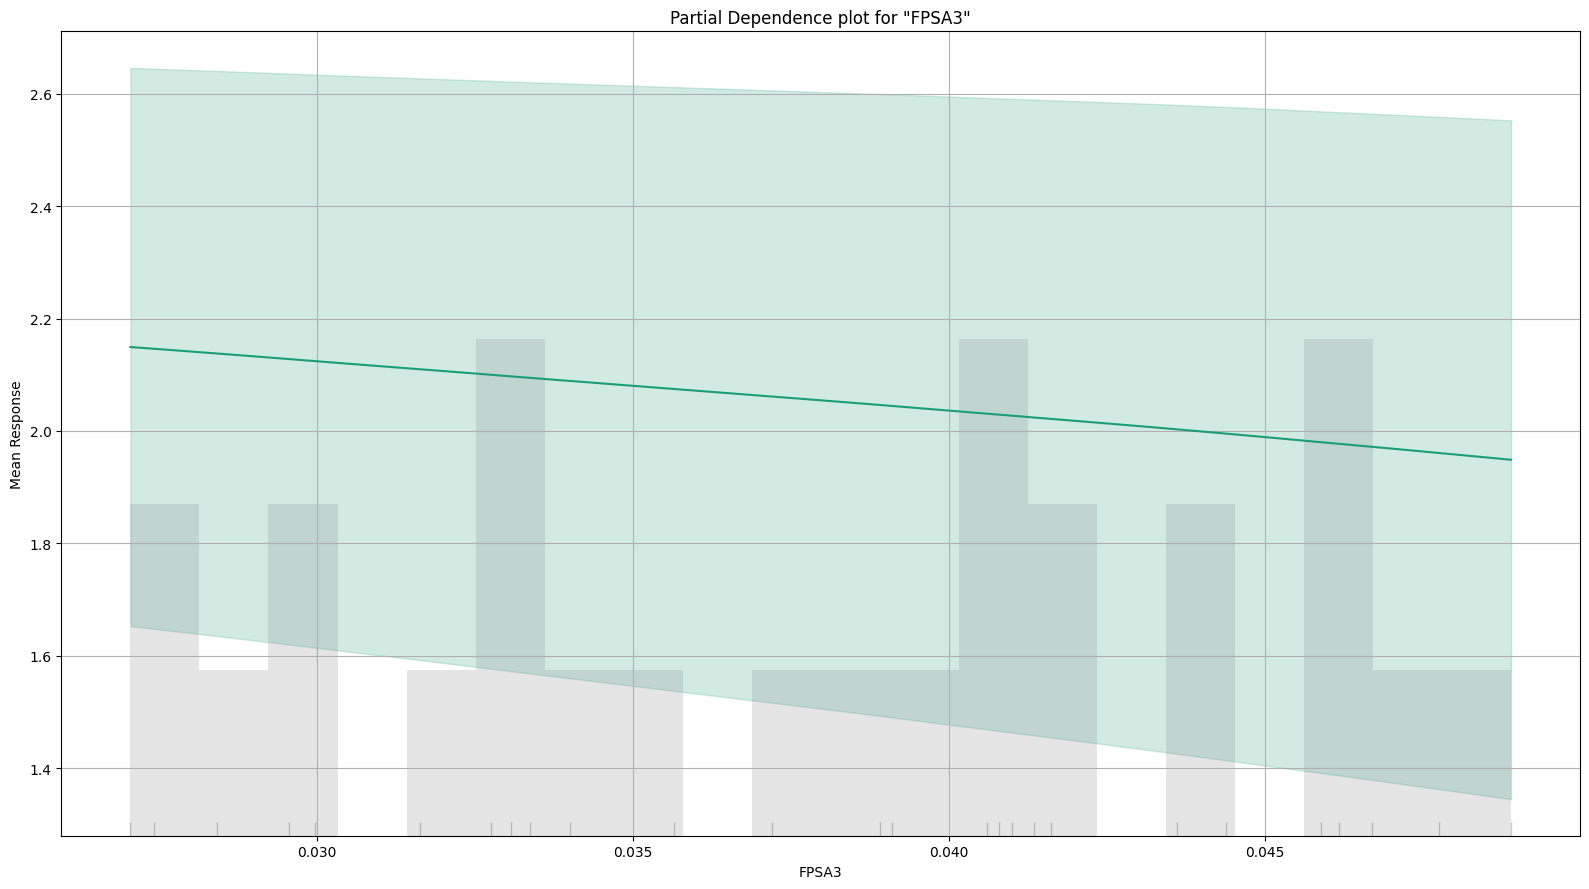

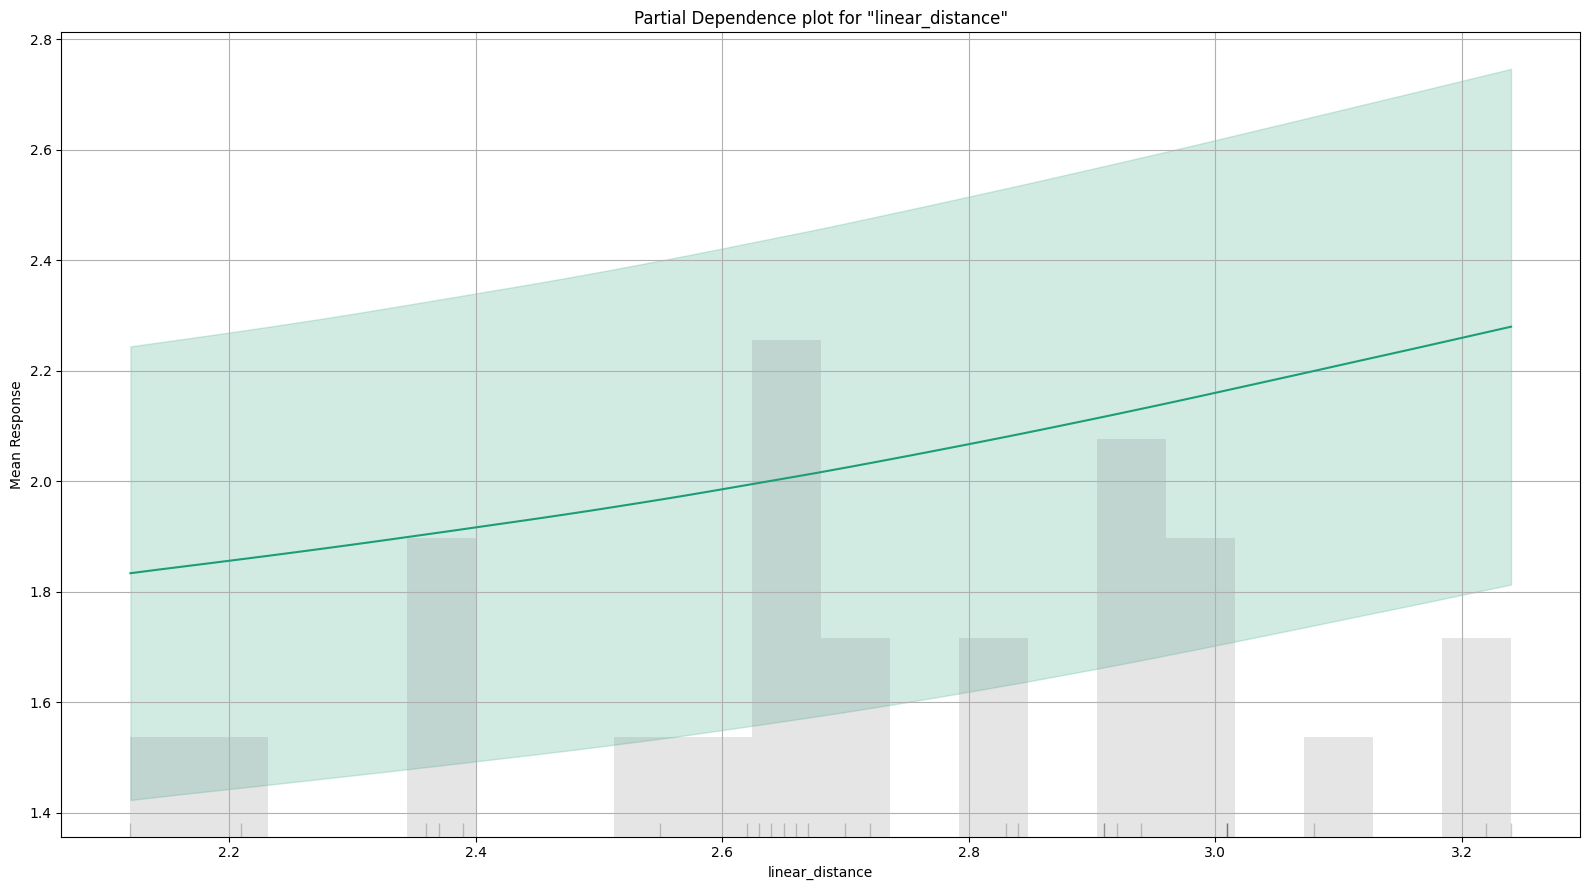

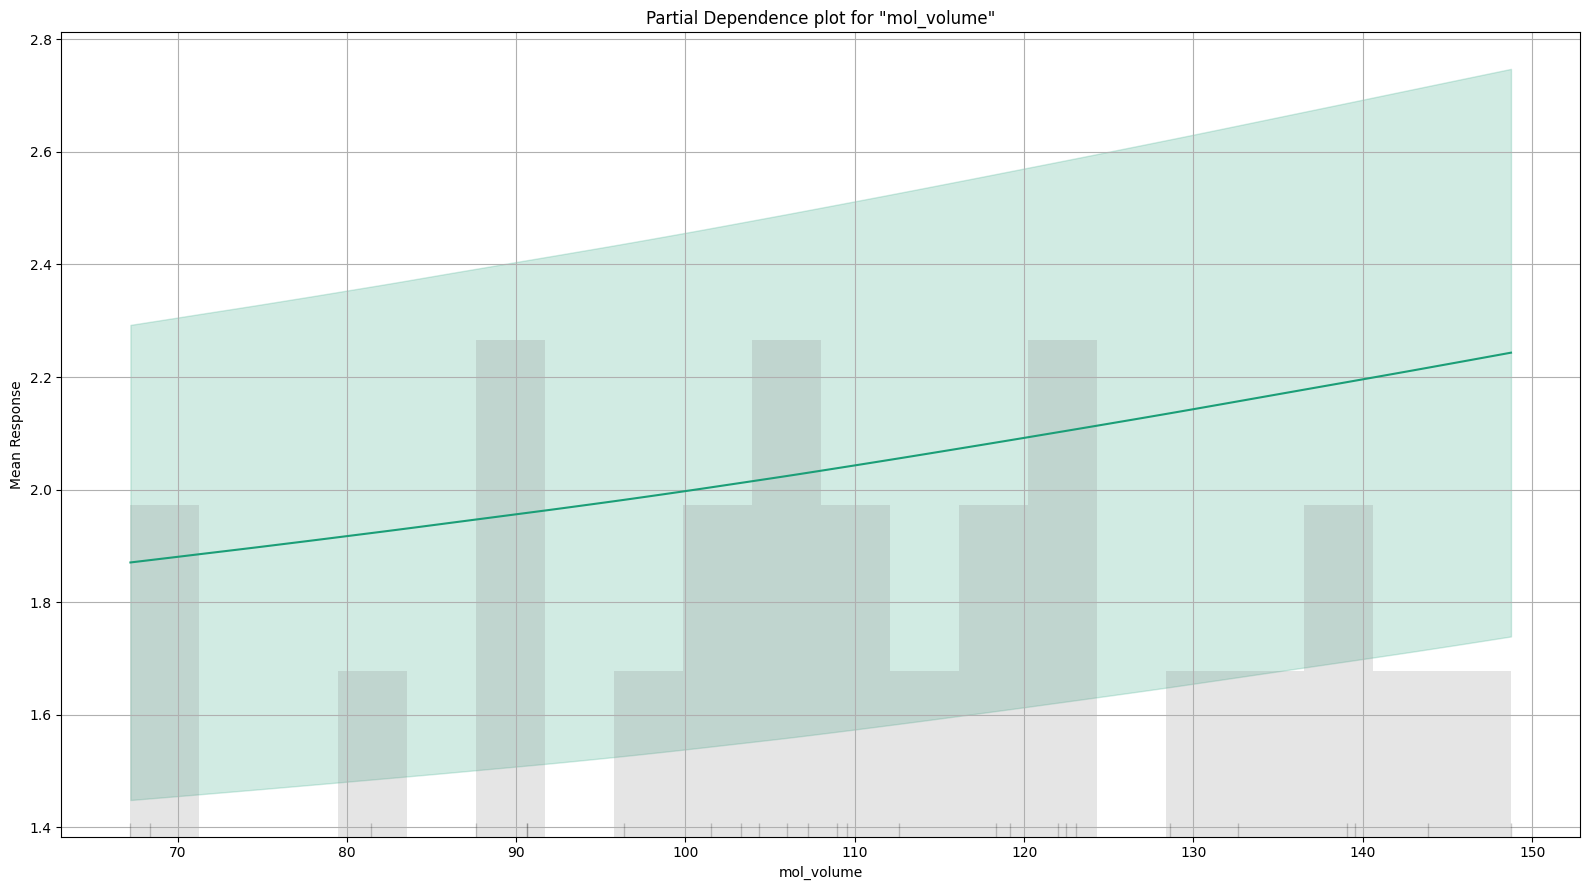

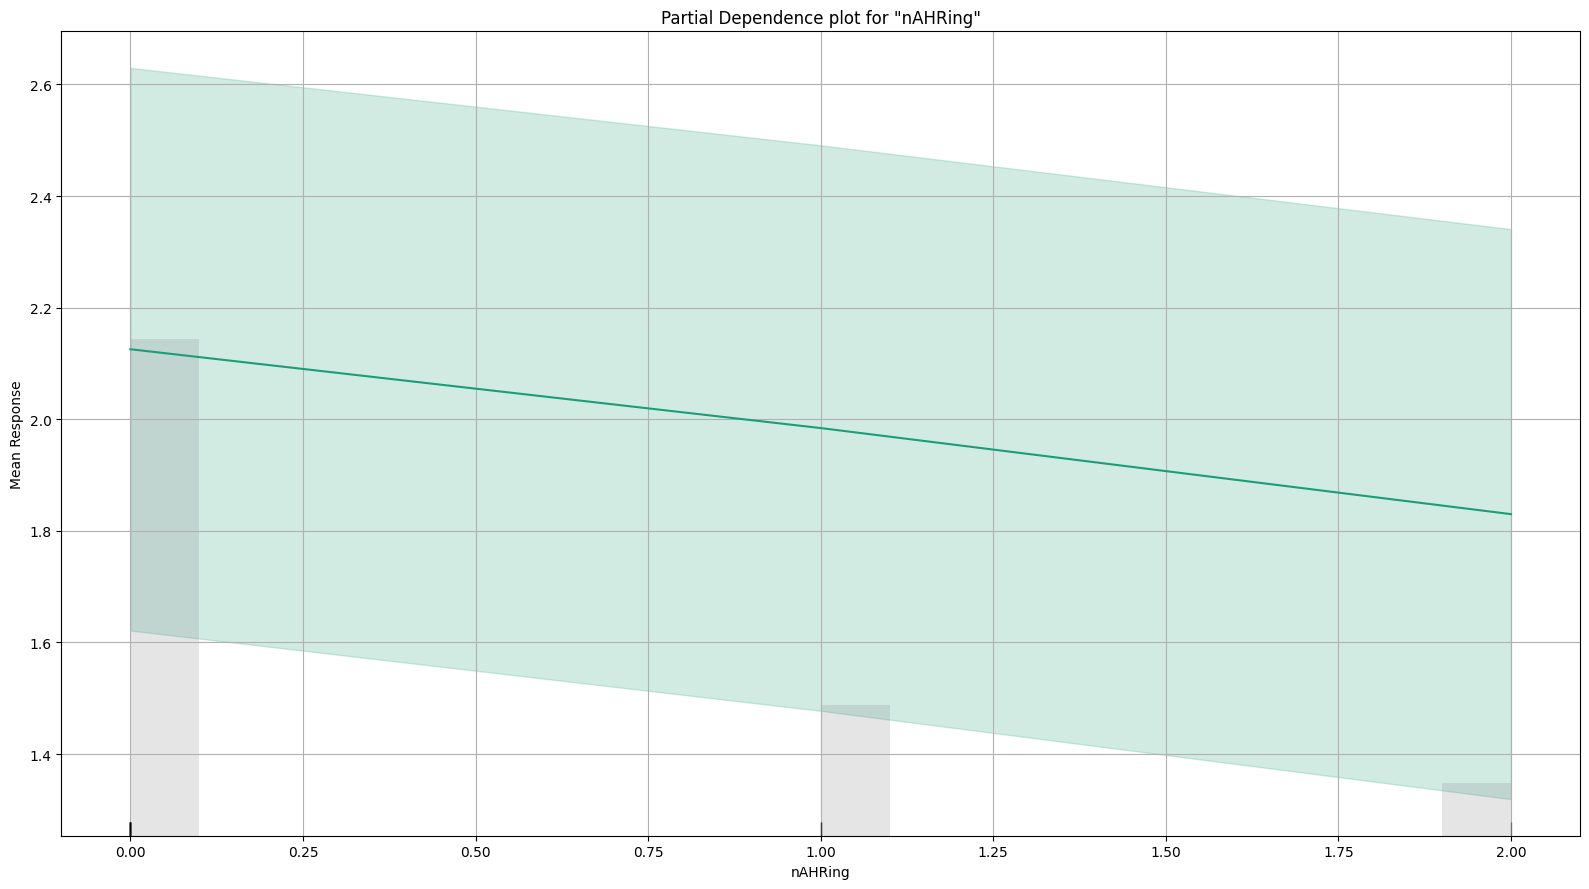

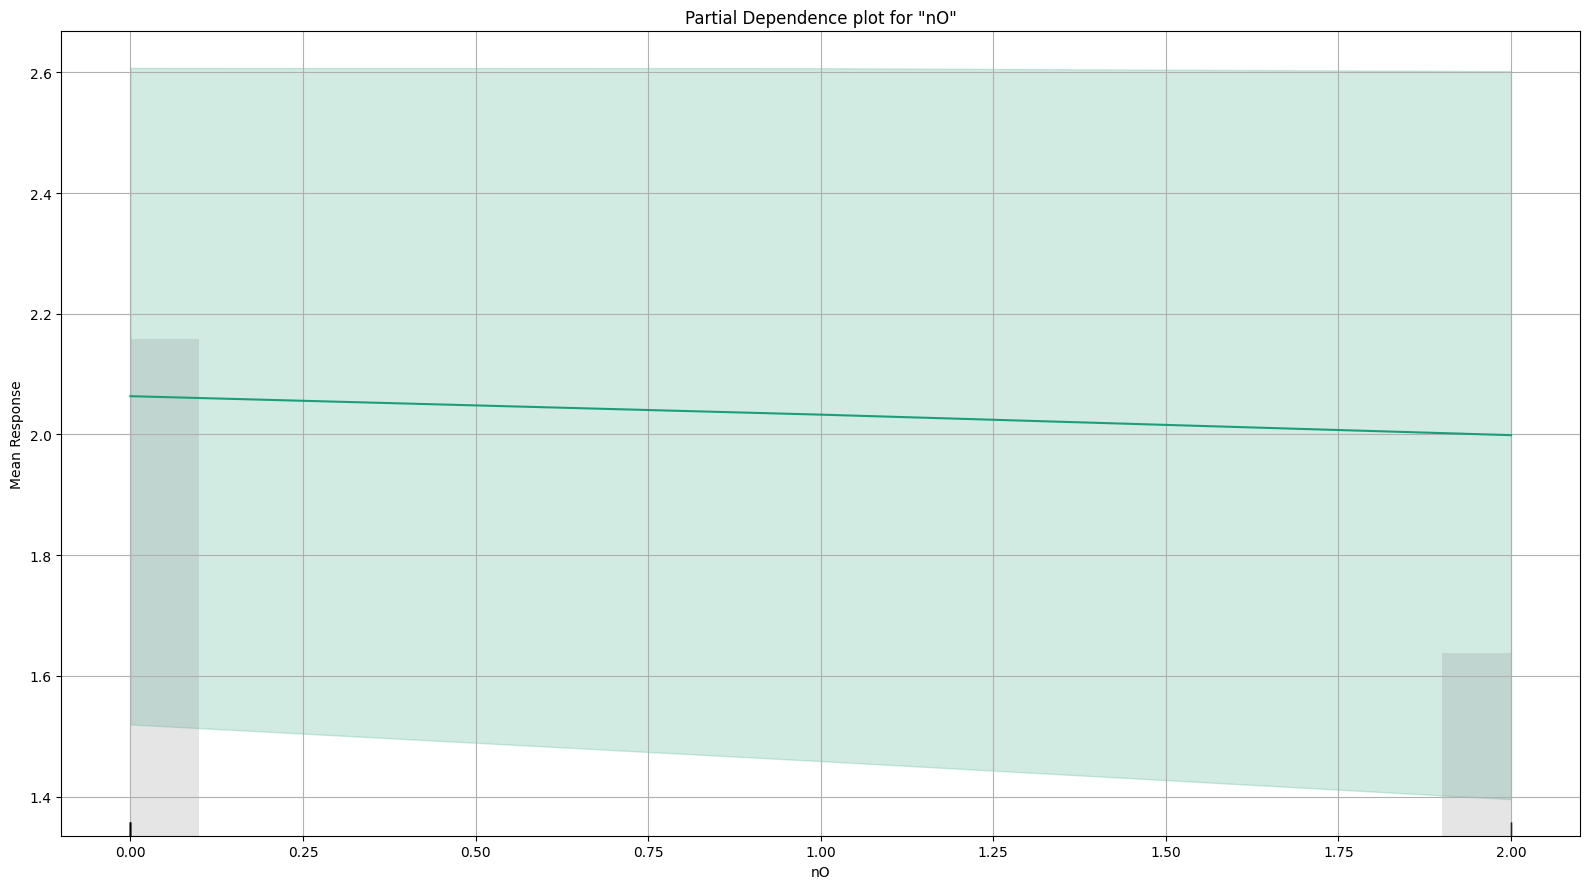

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

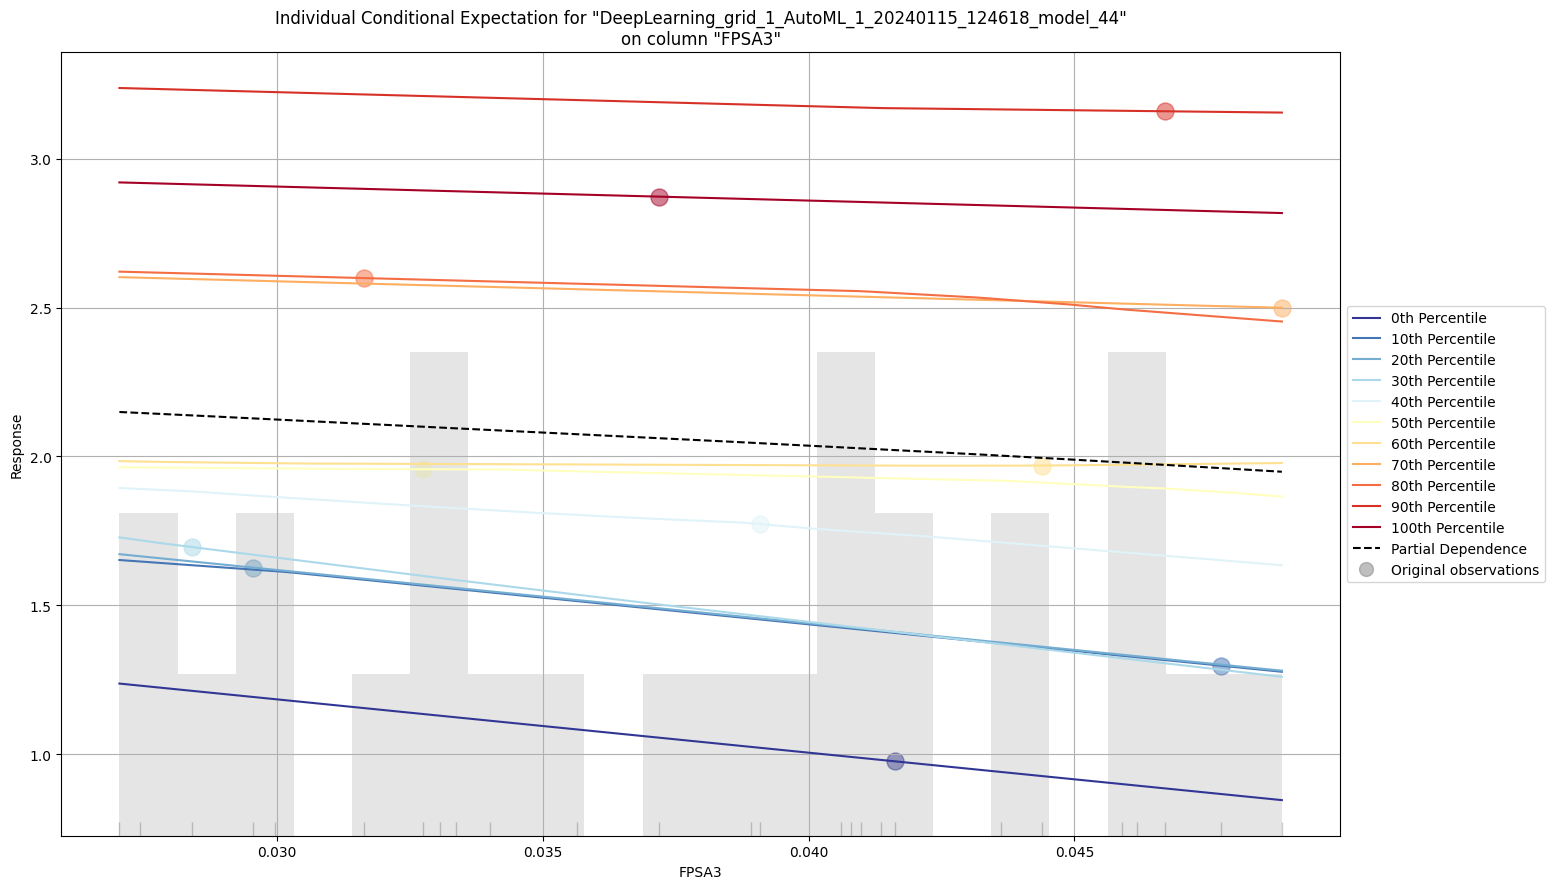

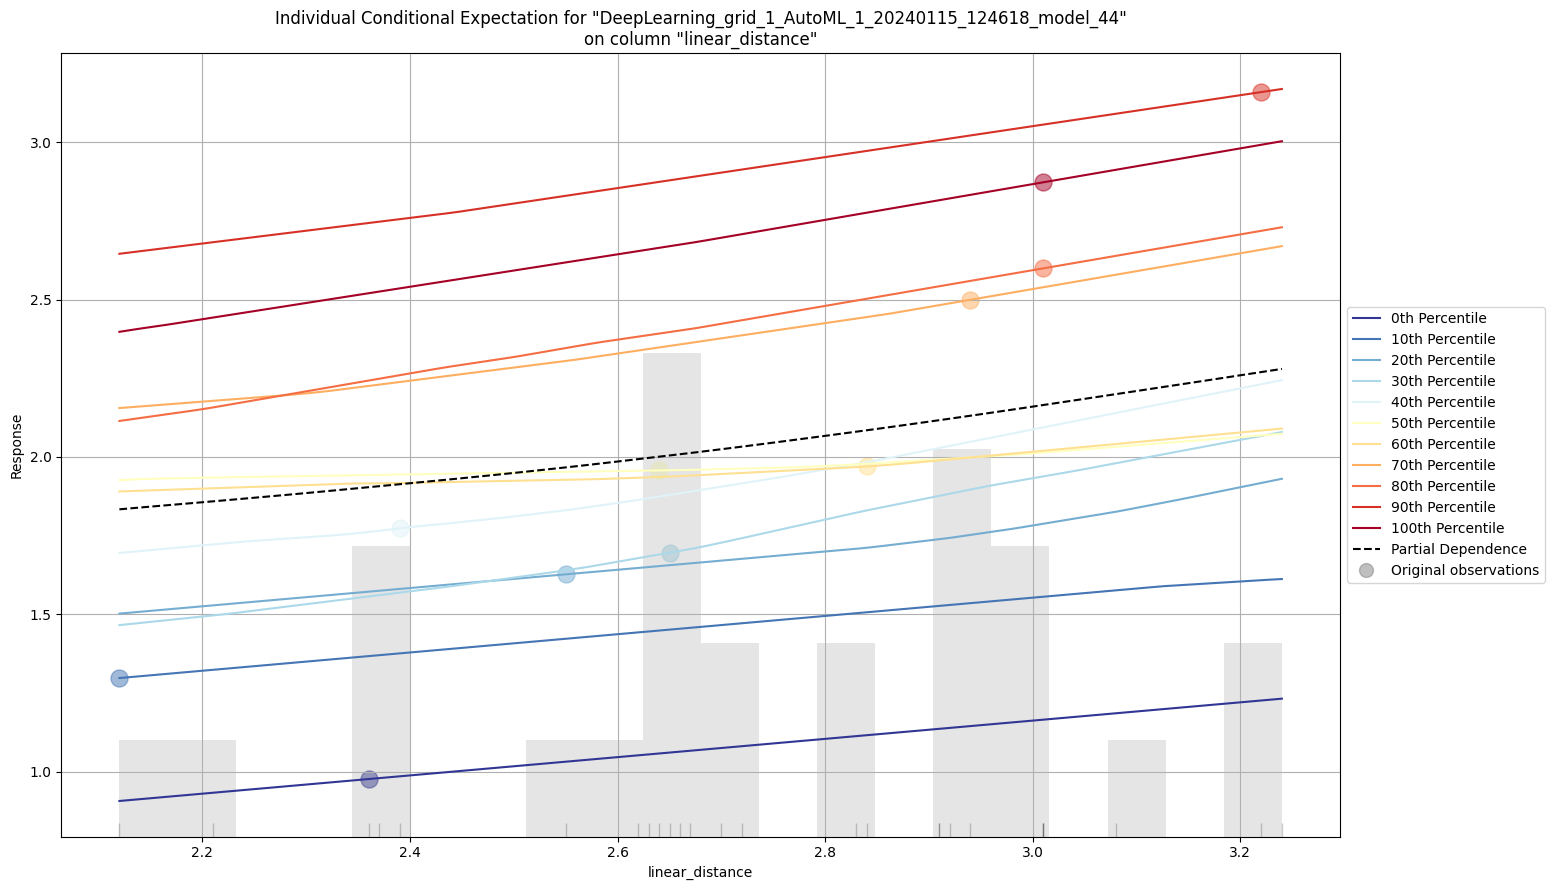

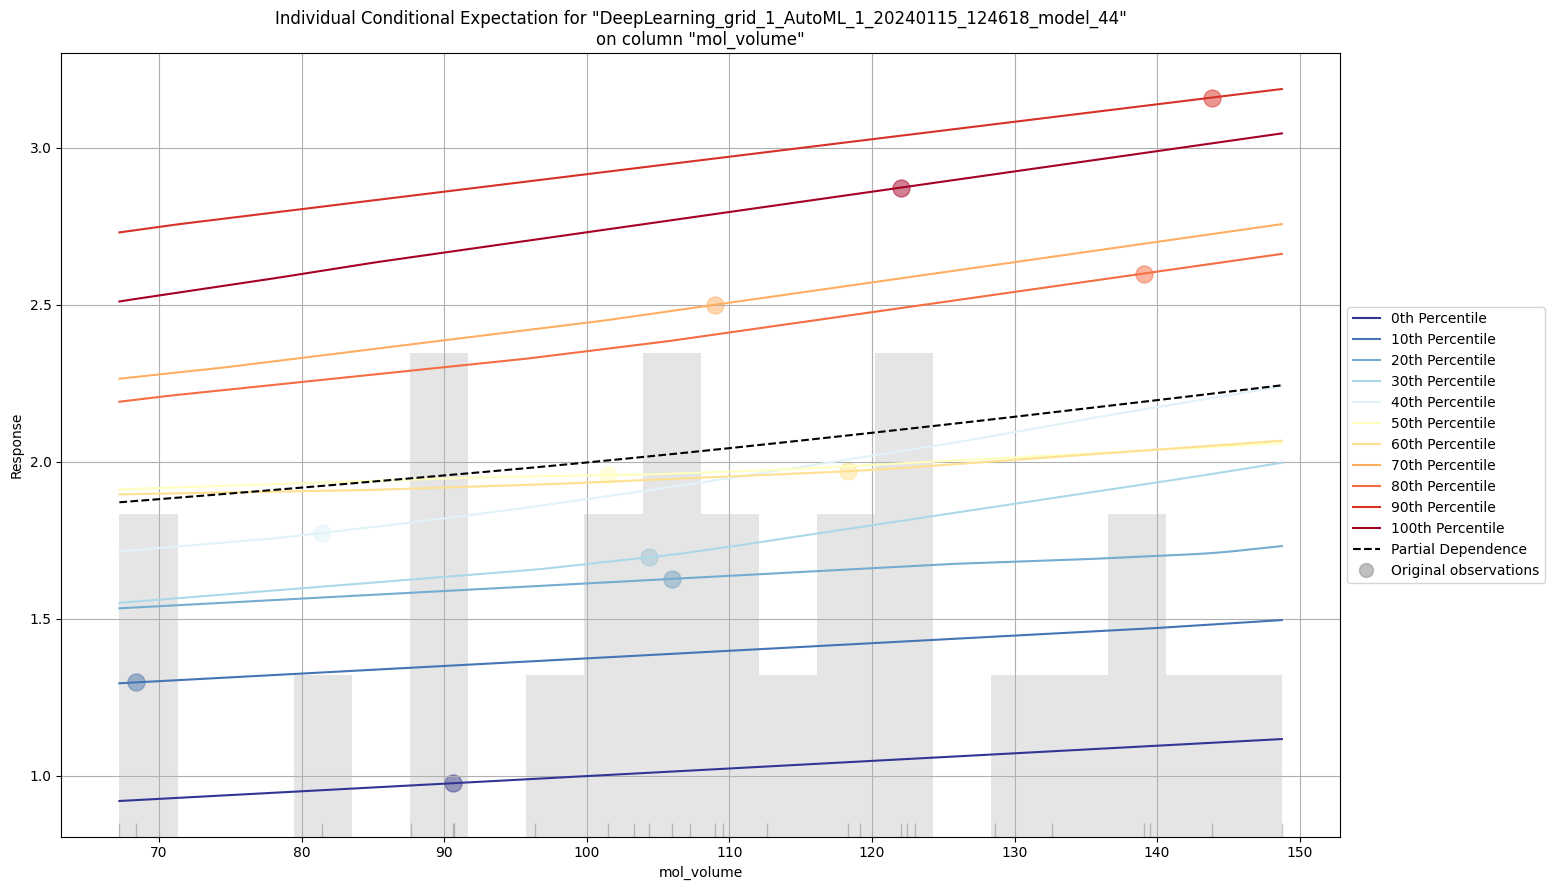

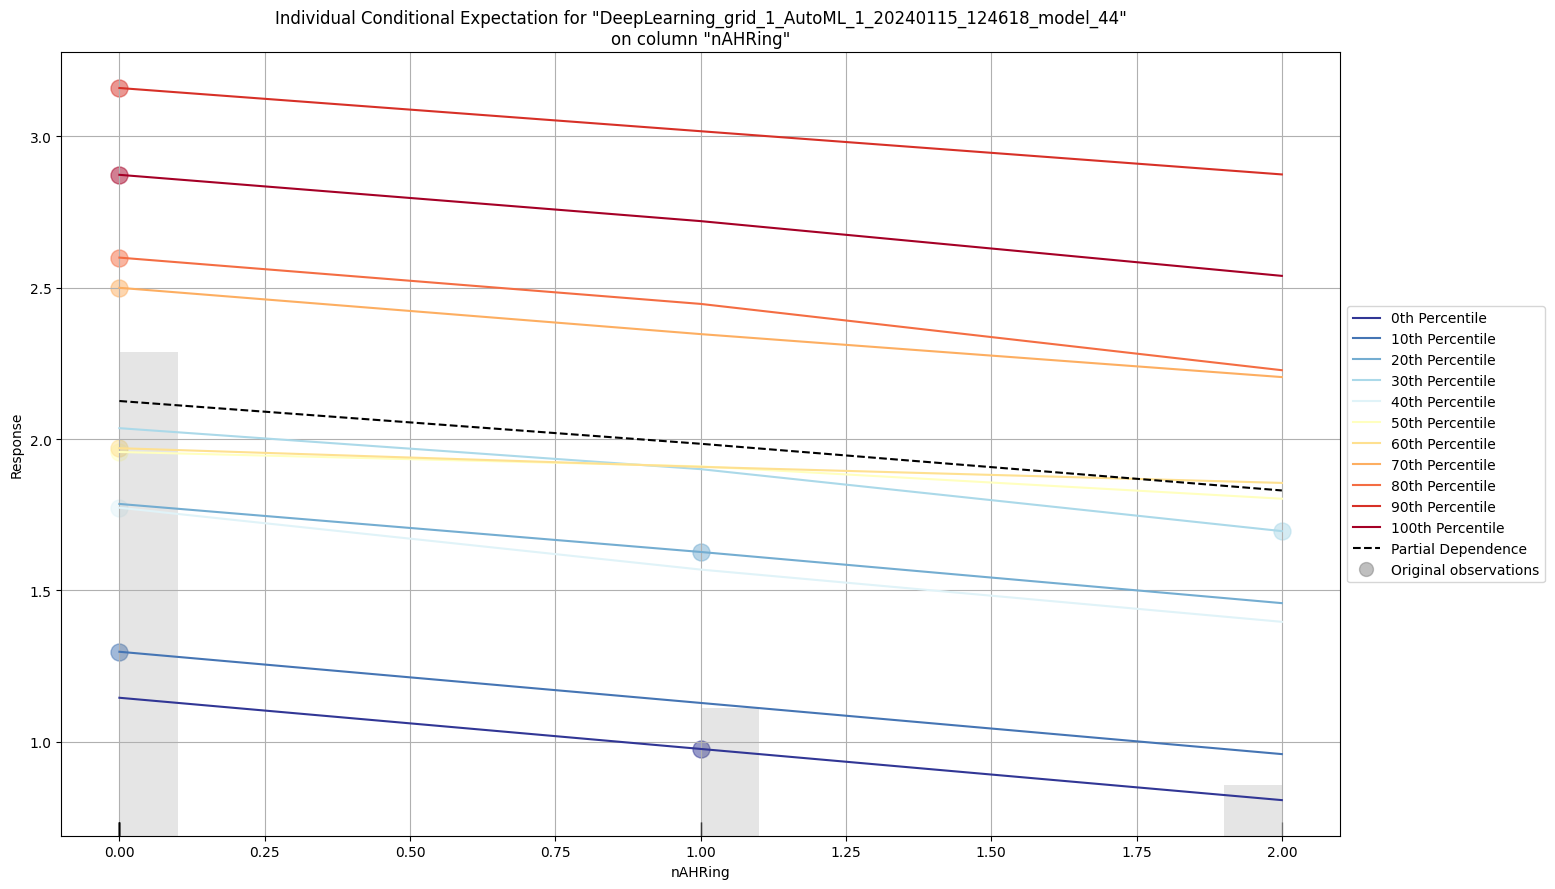

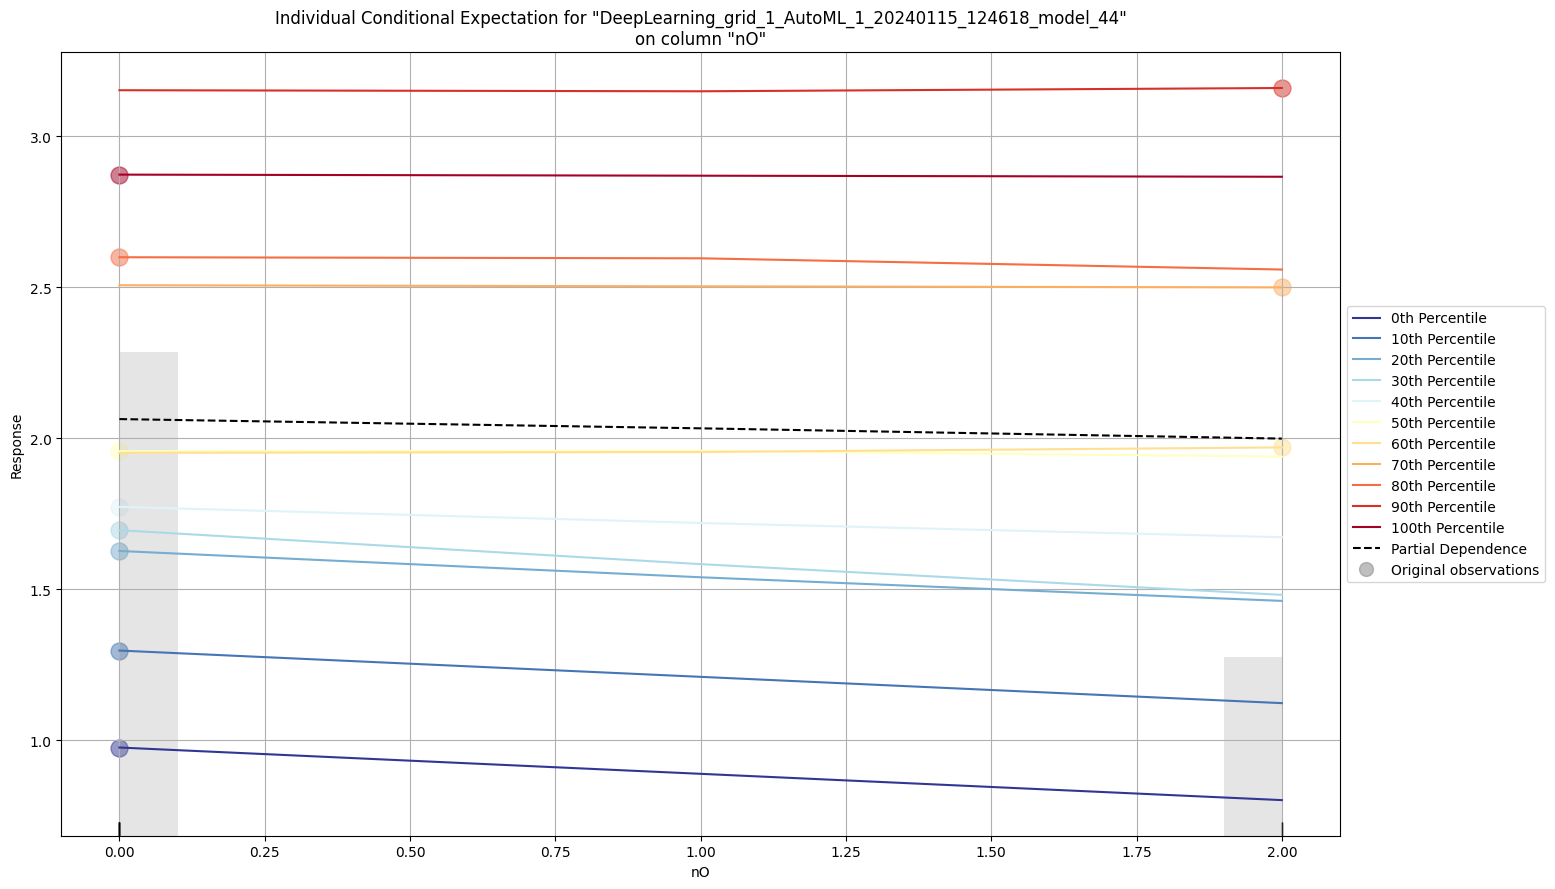

In [65]:
model_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\logP\best_model\DeepLearning_grid_1_AutoML_1_20240115_124618_model_44'

model = h2o.load_model(model_path)

model.explain(test)

In [73]:
test = h2o.import_file(r"C:\work\DrugDiscovery\main_git\XAI_Chem\data\H2O_Auto_ML\test_logP_data.csv")
test

Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%


C1    dihedral_angle_-C(=O)O    nN    dihedral_angle_CHF2    nO    nAHRing    dihedral_angle_-N    avg_atoms_in_cycle    nFRing    tpsa+f    amount_of_-O    amount_of_CH2F    naRing      PNSA5    nC      RPCS    mol_num_cycles    dihedral_angle_CF3       PBF    nHRing    amount_of_-C(=O)O    nFaRing    dihedral_angle_-O    dihedral_angle_gem-CF2      FPSA3    dihedral_angle_CH2F    amount_of_CHF    mol_volume    amount_of_=O    dihedral_angle_CHF     PPSA5    f_freedom    dihedral_angle_=O    nFAHRing    amount_of_CF3      TASA    nFaHRing    naHRing    chirality    nFHRing    amount_of_-N    nARing    amount_of_CHF2    nFARing    f_atom_fraction    dihedral_angle_non-F    GeomShapeIndex    f_to_fg    dipole_moment    linear_distance    amount_of_gem-CF2    cis/trans    logP
----  ------------------------  ----  ---------------------  ----  ---------  -------------------  --------------------  --------  --------  --------------  ----------------  --------  ---------  ----  --------  ----------------  --------------------  --------  --------  -------------------  ---------  -------------------  ------------------------  ---------  ---------------------  ---------------  ------------  --------------  --------------------  --------  -----------  -------------------  ----------  ---------------  --------  ----------  ---------  -----------  ---------  --------------  --------  ----------------  ---------  -----------------  ----------------------  ----------------  ---------  ---------------  -----------------  -------------------  -----------  ------
  26                  2.27083      0                      0     2          0              0                         0           0     39.3                1                 0         0  -34.1206      5  16.5902                  0                     0  0.609605         0                    1          0             2.73237                  -1.04786   0.0443885                      0                0        118.34               1               0        14.6584             0                    0           0                0  129.25             0          0            0          0               0         0                 0          0           0.4                            0          0.459796          1                0               2.84                    2            0    2.26
  53                 -0.501361     0                      0     2          0              0                         2.5         0     39.3                1                 0         0  -33.2157      6  27.4174                  2                     0  0.753232         0                    1          0             2.68442                  -2.00622   0.0458871                      0                0        119.14               1               0        16.455              0                    0           0                0  125.163            0          0            0          0               0         2                 0          0           0.333333                       0          0.74268           2               -1               2.91                    2            0    2.42
  18                 -1.04716      0                      0     2          0              0                         4           0     39.3                1                 0         0  -43.7628      5  21.3066                  1                     0  0.590383         0                    1          0            -2.46558                  -1.51239   0.0461761                      0                0        109.54               1               0        13.4768             0                    0           0                0   96.5222           0          0            0          0               0         1                 0          0           0.4                            0          0.88325           1               -1               2.72                    2            0    2.26
  35                 -2.09421      0                      0   

In [3]:
import h2o
from h2o.automl import H2OAutoML

model_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\logP\best_model\DeepLearning_grid_1_AutoML_1_20240115_124618_model_44'
model = h2o.load_model(model_path)

train = h2o.import_file(r"C:\work\DrugDiscovery\main_git\XAI_Chem\data\H2O_Auto_ML\train_logP_data.csv")
test = h2o.import_file(r"C:\work\DrugDiscovery\main_git\XAI_Chem\data\H2O_Auto_ML\test_logP_data.csv")

preds = model.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

H2OConnectionError: Not connected to a cluster. Did you run `h2o.init()` or `h2o.connect()`?

stacked explanations

In [8]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb = lb.as_data_frame()

c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [9]:
best_model = h2o.get_model('DeepLearning_grid_1_AutoML_3_20240118_110011_model_45')

models_amount = 10
models_left, model_index = 10, 0
total_ranks = {var_name:0 for var_name in best_model.varimp(test)['variable']}
total_importance = {var_name:0 for var_name in best_model.varimp(test)['variable']}
while models_left > 0:
    
    model_name = lb['model_id'][model_index]
    model_index += 1

    print(model_name.lower())
    if 'ensemble' in model_name.lower():
        continue
    model = h2o.get_model(model_name)

    importance_df = model.varimp(test)
    for rank, row in importance_df.iterrows():
        if rank == 0:
            print(f"The most important feature: {row['variable']}, percentage: {row['percentage']}")
        total_ranks[row['variable']] += (rank + 1) / models_amount
        total_importance[row['variable']] += row['percentage'] / models_amount

    models_left -= 1
    # break

stackedensemble_bestoffamily_6_automl_3_20240118_110011
stackedensemble_bestoffamily_3_automl_3_20240118_110011
stackedensemble_bestoffamily_5_automl_3_20240118_110011
deeplearning_grid_1_automl_3_20240118_110011_model_45
The most important feature: FPSA3, percentage: 0.05604082260655474
glm_1_automl_3_20240118_110011
The most important feature: nC, percentage: 0.06739656946483162
stackedensemble_allmodels_1_automl_3_20240118_110011
stackedensemble_bestoffamily_2_automl_3_20240118_110011
stackedensemble_bestoffamily_1_automl_3_20240118_110011
deeplearning_grid_1_automl_3_20240118_110011_model_15
The most important feature: FPSA3, percentage: 0.0629428852228239
deeplearning_grid_1_automl_3_20240118_110011_model_49
The most important feature: FPSA3, percentage: 0.03595360386987206
deeplearning_grid_1_automl_3_20240118_110011_model_57
The most important feature: PPSA5, percentage: 0.02627373055834548
deeplearning_grid_1_automl_3_20240118_110011_model_42
The most important feature: FPSA3, 

In [10]:
sum(total_ranks.values())

1035.0

Text(0.5, 1.0, 'Percentage importance')

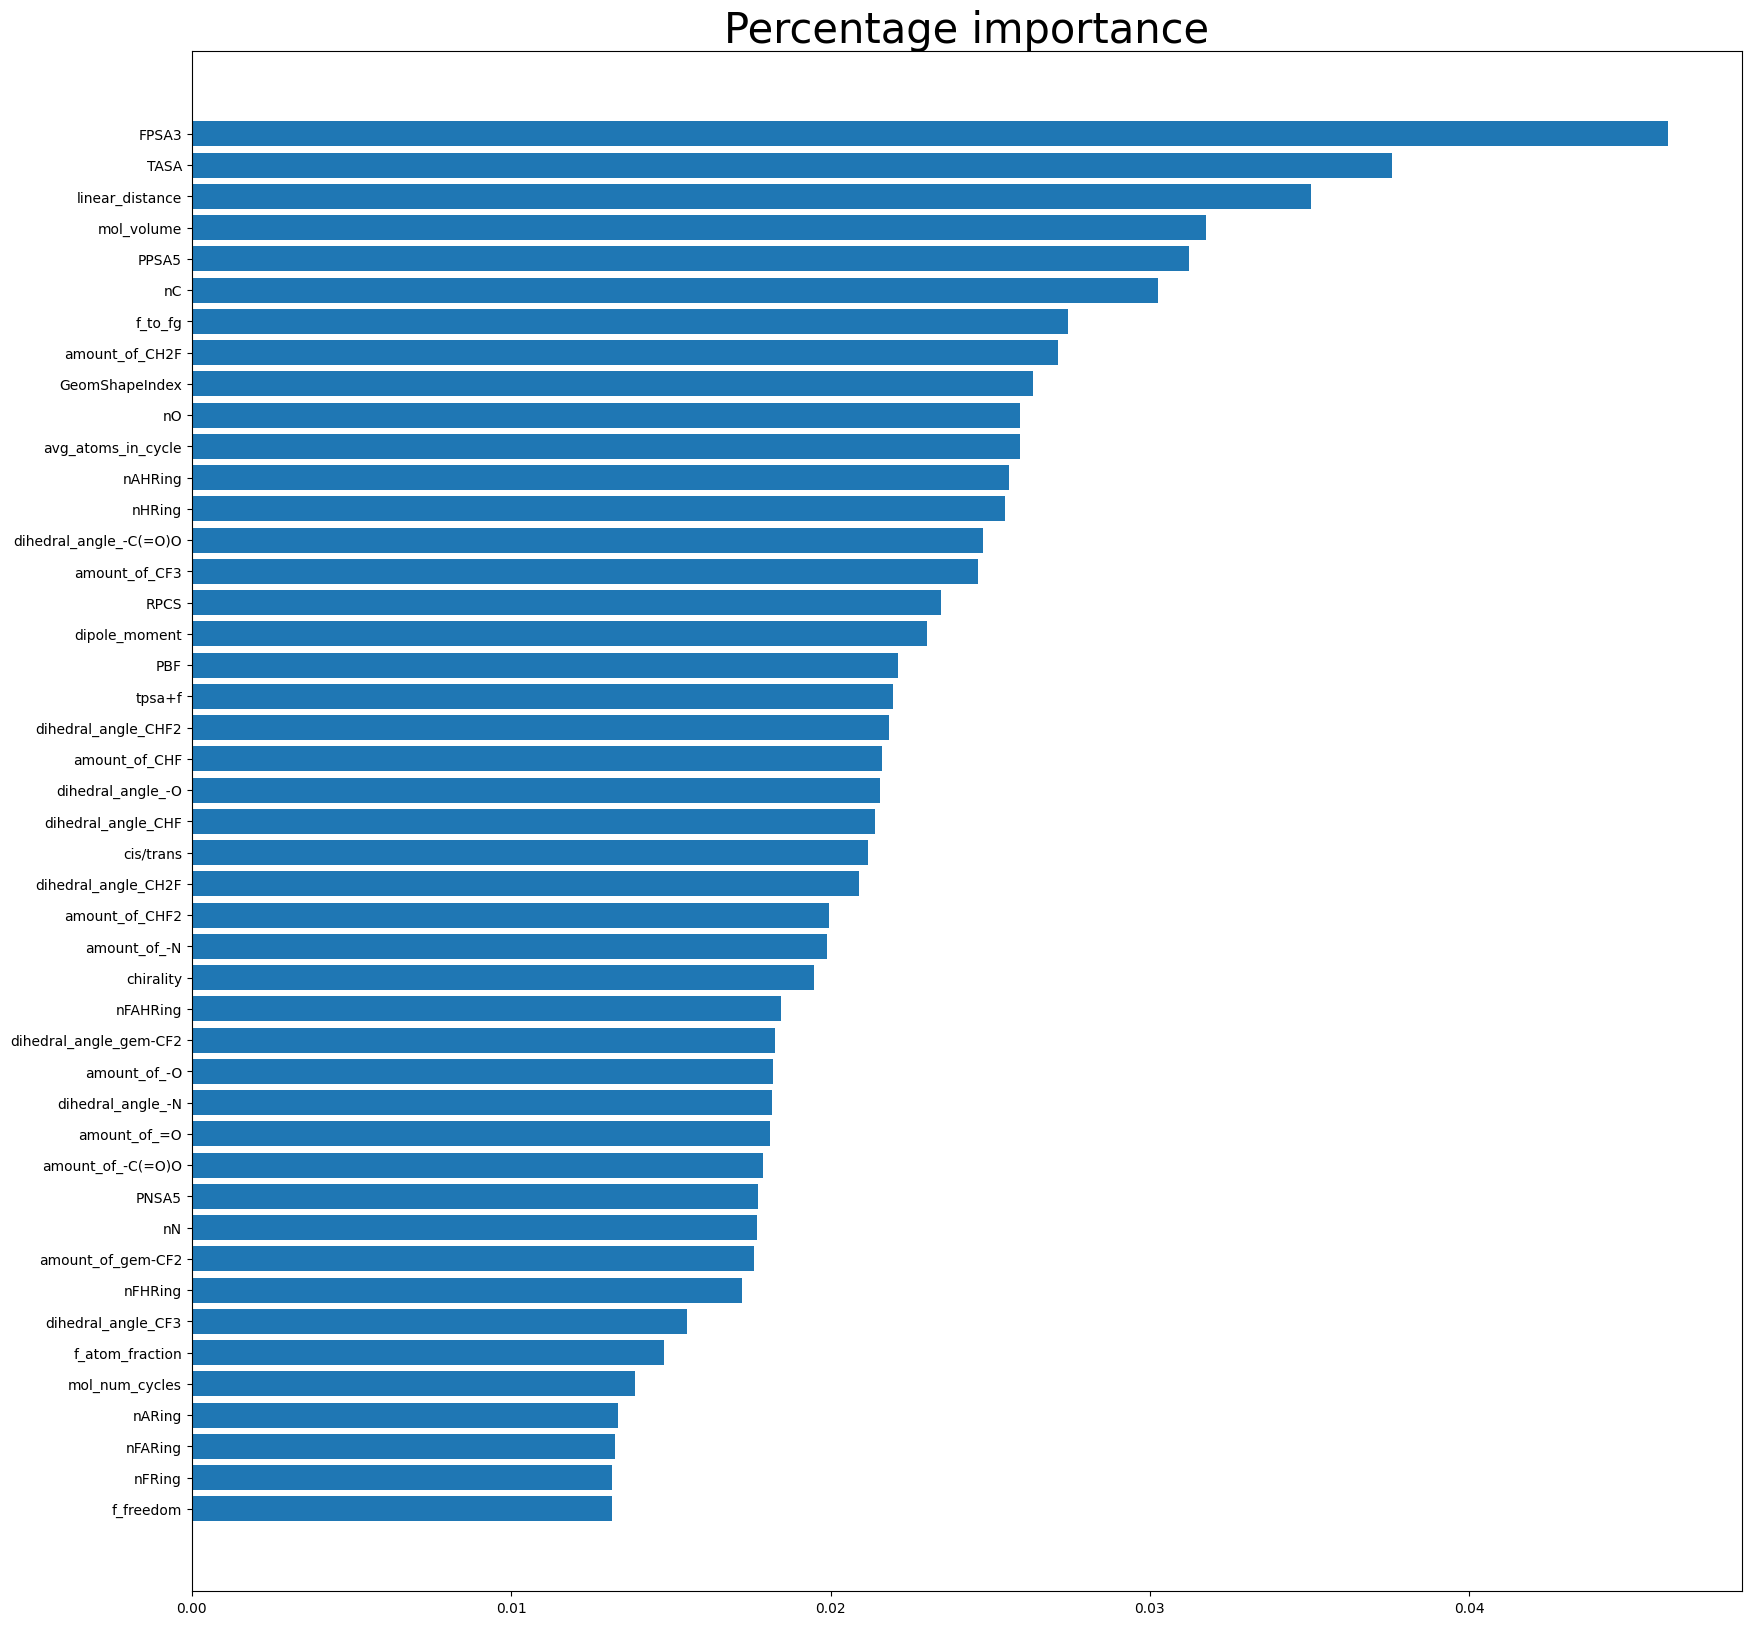

In [11]:
import matplotlib.pyplot as plt
import operator

total_importance = dict(sorted(total_importance.items(), key=operator.itemgetter(1)))

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(list(total_importance.keys()), total_importance.values())
ax.set_title("Percentage importance", fontsize=30)

Text(0.5, 1.0, 'Avg rank')

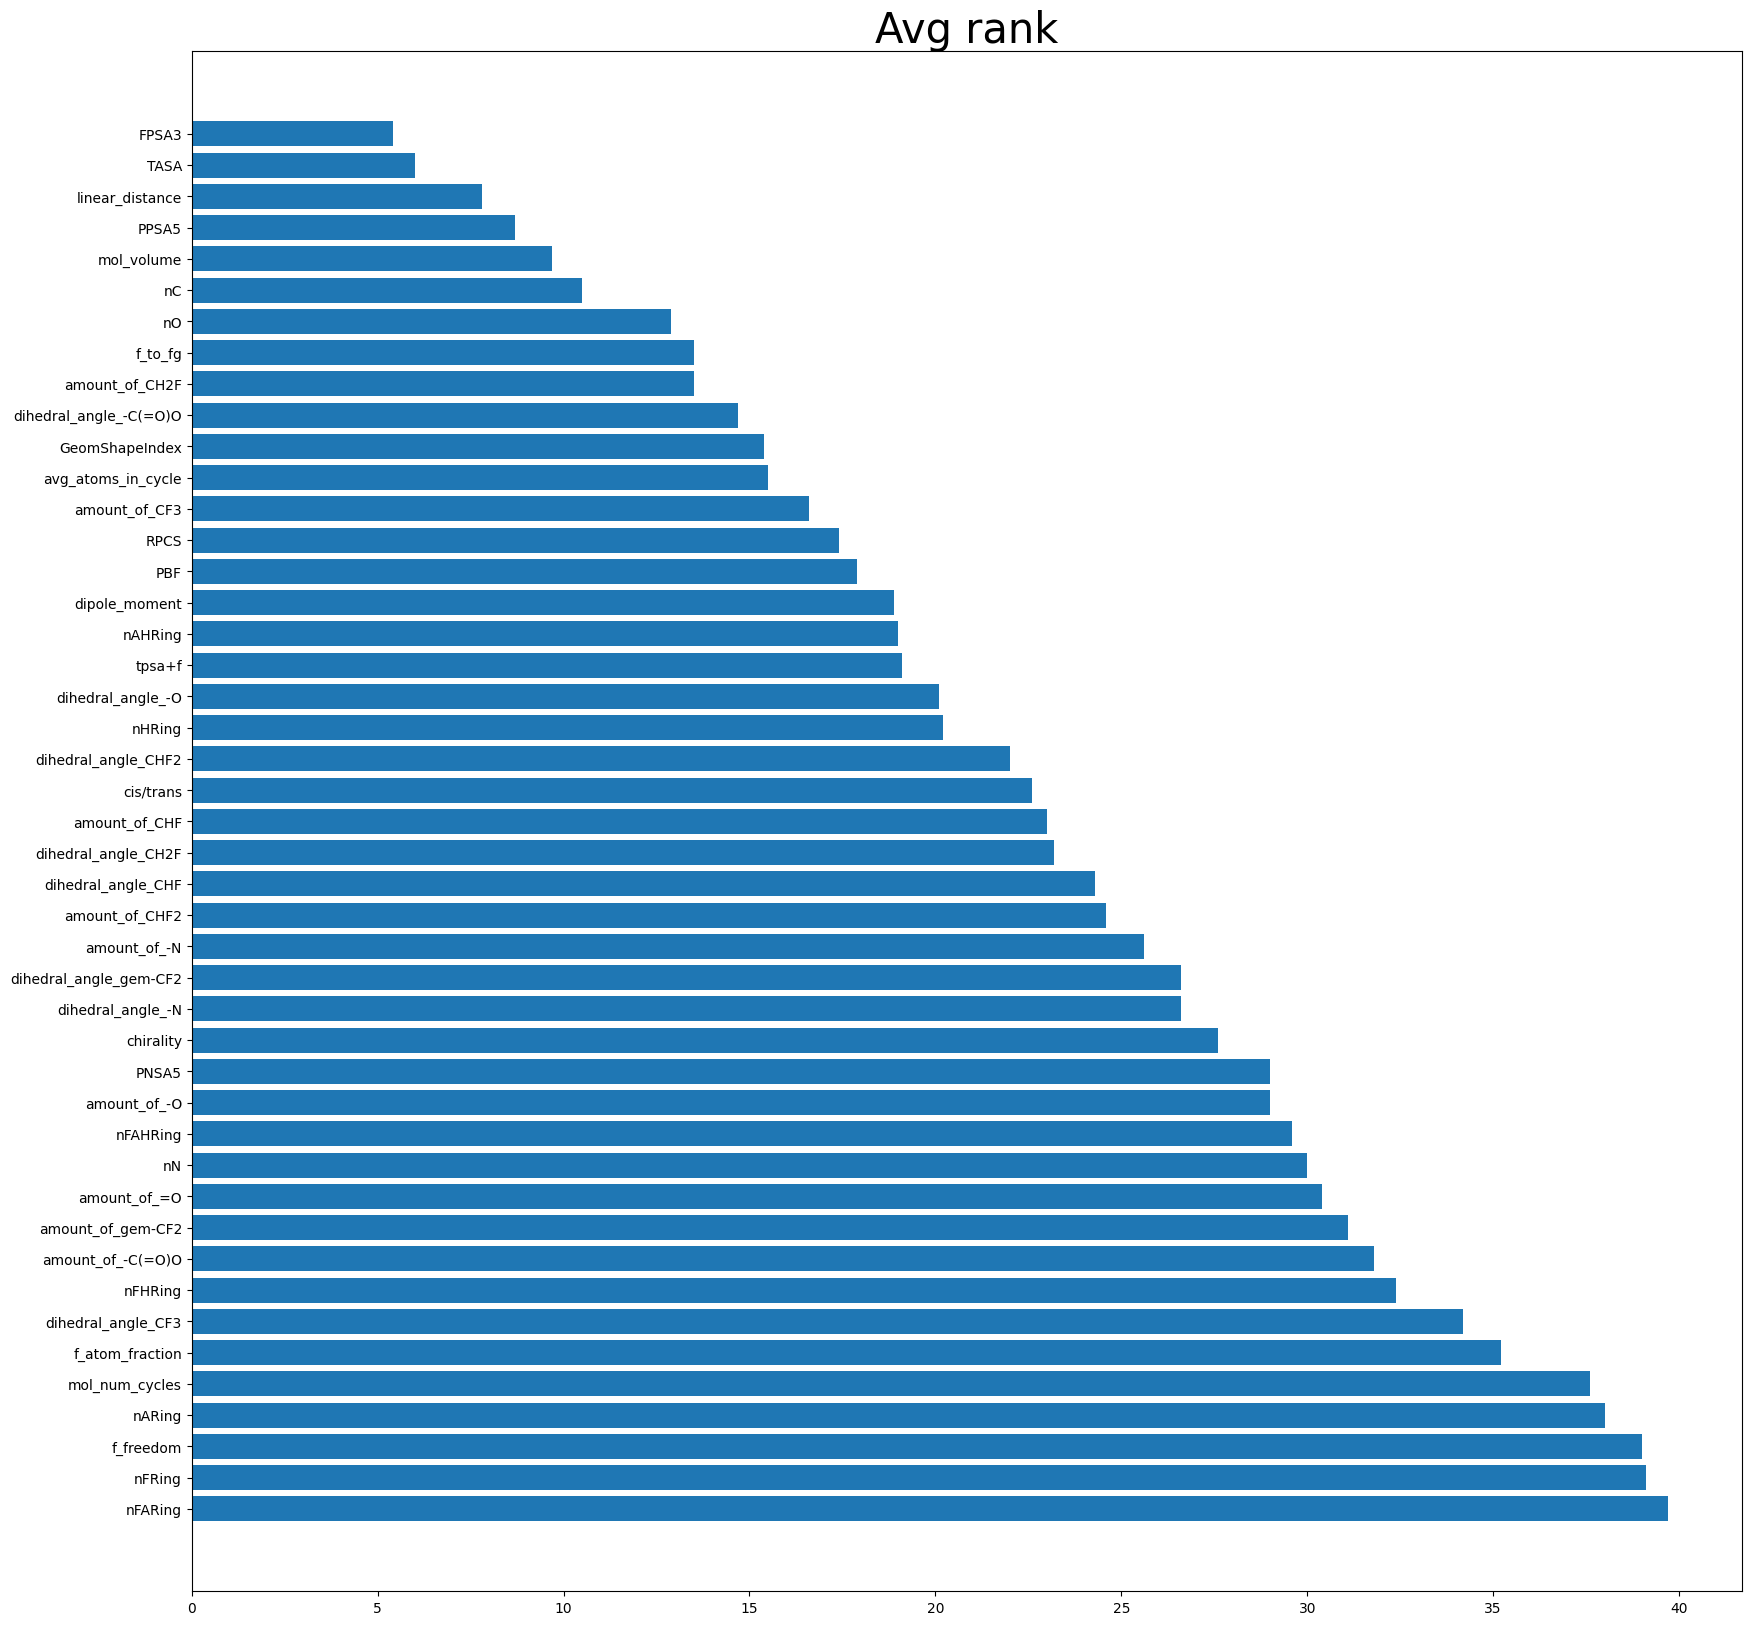

In [12]:
import matplotlib.pyplot as plt
import operator

total_ranks = dict(sorted(total_ranks.items(), key=operator.itemgetter(1)))

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(list(total_ranks.keys())[::-1], list(total_ranks.values())[::-1])
ax.set_title("Avg rank", fontsize=30)

**MOLECULE EXPLANATION**

In [55]:
aml.leader.explain_row(test, row_index=0)

H2OResponseError: Server error water.exceptions.H2OKeyNotFoundArgumentException:
  Error: Object 'DeepLearning_grid_1_AutoML_1_20240117_133150_model_56' not found for argument: key
  Request: GET /3/Models/DeepLearning_grid_1_AutoML_1_20240117_133150_model_56


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Text(0.5, 0, 'Percent')

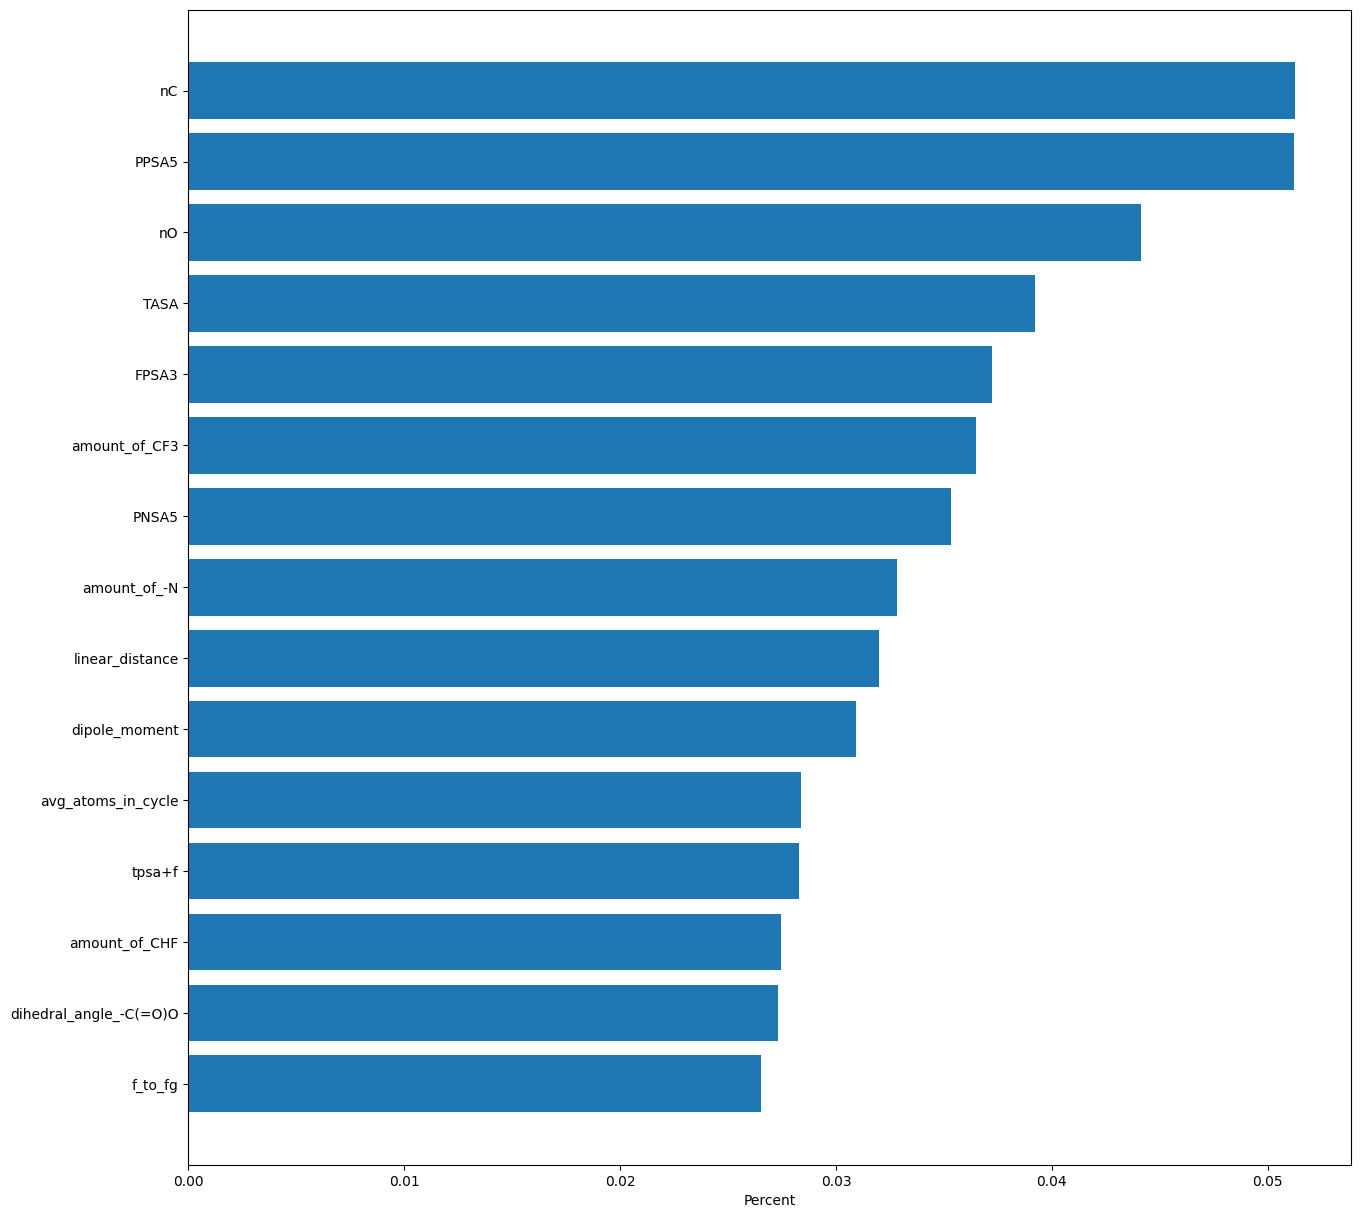

In [22]:
import matplotlib.pyplot as plt

MODEL_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\h2o_model\models\logP\best_model\DeepLearning_grid_1_AutoML_1_20240117_133150_model_56'
logP_model = h2o.load_model(MODEL_PATH)

preds = logP_model.predict(test)
true = test.as_data_frame()['logP']
predicted_values = preds.as_data_frame()['predict']

calculate_metrics(true, predicted_values)

importance = logP_model.varimp(test)

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(importance['variable'][:15][::-1], importance['percentage'][:15][::-1])
ax.set_xlabel('Percent')
